<center><h1>What's my data job?!</h1>
    <h2>Predicting your data job using Tensorflow</h2></center>

In [3]:
import requests
from bs4 import BeautifulSoup
import re
import os
import time

import pandas as pd
import numpy as np


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

2.1.0


[nltk_data] Downloading package stopwords to /home/robin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<img src="https://miro.medium.com/max/600/0*a6XSwHsfvz_oWSSJ.jpg">

## Get the data

Below is a function that scrapes text from Indeed. It's currently set to scrape 2000 job texts per category.

In [48]:
def scraper(job_titles):

    job_openings = [] # list with job opening text
    labels = [] # list with job opening labels
    urls = [] # list with all the job urls

    main = "https://www.indeed.com" # main indeed url

    for item in job_titles:

        job = '"' + item.replace(" ", "+") + '"' # replace space in job title with dash

        print(job)

        for number in range(0, 15000, 10): # will scrape 15.000 job openings per job, in increments of 10

            print(f"starting first {number} of {item}")

            url = f"{main}/jobs?q={job}&start={number}" # compile job specific url

            print(url)
            
            try: # in case we get an error when requesting te page.
                page = requests.get(url) # request url
            except:
                break
                print("An error occured")
            
            time.sleep(2)

            soup = BeautifulSoup(page.content, "html.parser") # parse the page with beautifulsoup

            links = [a['href'] for a in soup.find_all('a', href=True)] # find all the urls on the page

            match_links = [main+s for s in links if "rc/clk?jk=" in s] # find all the urls that link to job page
            
            print(len(match_links))

            for link in match_links: # loop through the 10 job ad urls on the page
                
                print(link)
                
                try: # in case we get an error requesting the page
                    job_page = requests.get(link) # request the job ad url
                except:
                    break
                    print("An error occured")
                    
                time.sleep(3) # wait a few seconds to not overlad server
                job_soup = BeautifulSoup(job_page.content, "html.parser") # parse the page

                for element in job_soup.find_all('div', attrs={"class":"jobsearch-jobDescriptionText"}): # loop through the job text
                    text = element.get_text(separator = " ").replace("\n","") # remove all tags from job text
                    
                    job_openings.append(text) # append job text tot job_openings
                    labels.append(item) # append job title
                    urls.append(link) # append link
            
            

            if len(match_links) < 2: # breaks the loop if we are at the end of the # of jobs
                break                    
    
    return job_openings, labels, urls

The scraper can take a list with any number of job titles and will take the first 2.000 job openings.

In [49]:
job_openings = ["data analyst",
                "sales manager",
                "marketing manager",
                "event manager"] # list of jobs I want to scrape

jobs, labels, links = scraper(job_openings)

"data+analyst"
starting first 0 of data analyst
https://www.indeed.com/jobs?q="data+analyst"&start=0
10
https://www.indeed.com/rc/clk?jk=a950b3f51924cd74&fccid=6dd06532bd046487&vjs=3
https://www.indeed.com/rc/clk?jk=b8a7cc9945c9ce2d&fccid=5cd649df8329d3dc&vjs=3
https://www.indeed.com/rc/clk?jk=8c84a472e611905d&fccid=6dd06532bd046487&vjs=3
https://www.indeed.com/rc/clk?jk=d99449e57b14d0a8&fccid=6dd06532bd046487&vjs=3
https://www.indeed.com/rc/clk?jk=64e03c1469e85a4c&fccid=a2e193e7a6dec7dc&vjs=3
https://www.indeed.com/rc/clk?jk=058a5d8b147b3117&fccid=d5998a961671e818&vjs=3
https://www.indeed.com/rc/clk?jk=ee09da32e8432a45&fccid=d3d3520998346837&vjs=3
https://www.indeed.com/rc/clk?jk=2532431132ffbda1&fccid=30c994b6c2f39768&vjs=3
https://www.indeed.com/rc/clk?jk=56b25bcbe71d6802&fccid=2a341562d64c7cdb&vjs=3
https://www.indeed.com/rc/clk?jk=db25899f9f18ac78&fccid=63dc47ddbc3a4e7d&vjs=3
starting first 10 of data analyst
https://www.indeed.com/jobs?q="data+analyst"&start=10
10
https://www.ind

https://www.indeed.com/rc/clk?jk=104ffae70c201288&fccid=4a81176103921fe0&vjs=3
https://www.indeed.com/rc/clk?jk=5d3129f9c65cdae9&fccid=11619ce0d3c2c733&vjs=3
https://www.indeed.com/rc/clk?jk=c64f51c74d1b2b17&fccid=3b8f2b652d56dd70&vjs=3
https://www.indeed.com/rc/clk?jk=4fa16bd136dcfe6a&fccid=3720d878ea31de0f&vjs=3
https://www.indeed.com/rc/clk?jk=b33aca675093ed07&fccid=fde13750b6d11290&vjs=3
https://www.indeed.com/rc/clk?jk=166f664df84098d1&fccid=6fca89bc0fd6cccf&vjs=3
starting first 100 of data analyst
https://www.indeed.com/jobs?q="data+analyst"&start=100
10
https://www.indeed.com/rc/clk?jk=ed34906f0478d226&fccid=def5ff75b102229a&vjs=3
https://www.indeed.com/rc/clk?jk=5f2008986b0bc356&fccid=42f139d35fc5ecb9&vjs=3
https://www.indeed.com/rc/clk?jk=9b5bb8ea9607bb3c&fccid=2ae98fa5cb3d52c1&vjs=3
https://www.indeed.com/rc/clk?jk=4b9f09ea2d3a9389&fccid=c5e82b682b93e4db&vjs=3
https://www.indeed.com/rc/clk?jk=df35cb9d2519eb78&fccid=1ba7f338730ce720&vjs=3
https://www.indeed.com/rc/clk?jk=f46c7

https://www.indeed.com/rc/clk?jk=bb13703bb2304022&fccid=5ece327da33e0274&vjs=3
https://www.indeed.com/rc/clk?jk=cb599878b474b72f&fccid=3f6d5986f9b7f090&vjs=3
starting first 190 of data analyst
https://www.indeed.com/jobs?q="data+analyst"&start=190
10
https://www.indeed.com/rc/clk?jk=aae8dacf90f516fe&fccid=126e3afd205caa95&vjs=3
https://www.indeed.com/rc/clk?jk=6537081f1aff260c&fccid=da3c7fed78dd1607&vjs=3
https://www.indeed.com/rc/clk?jk=e8229fa32400bb4b&fccid=d7c744248a9e6859&vjs=3
https://www.indeed.com/rc/clk?jk=cd4fa265cfd31ab4&fccid=048af9a6ad3d8652&vjs=3
https://www.indeed.com/rc/clk?jk=d6ce7d2fd2f82262&fccid=720de09538df2ec5&vjs=3
https://www.indeed.com/rc/clk?jk=471ccb695af55b18&fccid=2aa42c06718c85f9&vjs=3
https://www.indeed.com/rc/clk?jk=e6826ad45a50ad63&fccid=1d300841a95e6260&vjs=3
https://www.indeed.com/rc/clk?jk=49a226a59d382e8d&fccid=d25525f95db539b9&vjs=3
https://www.indeed.com/rc/clk?jk=21ddc63d814220e6&fccid=6798f86772dfad3f&vjs=3
https://www.indeed.com/rc/clk?jk=2159a

9
https://www.indeed.com/rc/clk?jk=12b72e6b57464ae4&fccid=f269f726ef88eda2&vjs=3
https://www.indeed.com/rc/clk?jk=42a5e64bbb852b87&fccid=c5ea80037eec1b5c&vjs=3
https://www.indeed.com/rc/clk?jk=94a69c5b74fb792b&fccid=6bd2cd01467d105d&vjs=3
https://www.indeed.com/rc/clk?jk=4bdce35a98a997df&fccid=5fd9c97c9854273b&vjs=3
https://www.indeed.com/rc/clk?jk=8e9db9af24d7fe31&fccid=aa5d1a67c9fe8ae2&vjs=3
https://www.indeed.com/rc/clk?jk=7fa5254f57ae8198&fccid=d05bbdf9684ef5b5&vjs=3
https://www.indeed.com/rc/clk?jk=0152aac5f6d668d6&fccid=7491761671debb04&vjs=3
https://www.indeed.com/rc/clk?jk=faa6f38ad6d8682e&fccid=4ef4114051d6c0a3&vjs=3
https://www.indeed.com/rc/clk?jk=d51dce874661e5e2&fccid=3fa37343f56452cd&vjs=3
starting first 60 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=60
10
https://www.indeed.com/rc/clk?jk=21c4c0591b5956f6&fccid=7e465a3d521b3ac3&vjs=3
https://www.indeed.com/rc/clk?jk=d42b320eb2f8bf0a&fccid=8ea54e852901f8b5&vjs=3
https://www.indeed.com/rc/clk?jk=d16

https://www.indeed.com/rc/clk?jk=6f781d554d2f1000&fccid=bba15db4d8763697&vjs=3
https://www.indeed.com/rc/clk?jk=4641d5f0d78f890c&fccid=ca333275e8fc6b54&vjs=3
https://www.indeed.com/rc/clk?jk=15f818faa57fb0fa&fccid=6882758cd357a3cf&vjs=3
https://www.indeed.com/rc/clk?jk=6d43d493bf2d83cd&fccid=e4a5e7f93e374233&vjs=3
https://www.indeed.com/rc/clk?jk=afc764ae50e87a9e&fccid=e022c9c6bcabdfc8&vjs=3
https://www.indeed.com/rc/clk?jk=01af4cbbfac8501d&fccid=8d8f8baabcd9963a&vjs=3
starting first 150 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=150
10
https://www.indeed.com/rc/clk?jk=01af4cbbfac8501d&fccid=8d8f8baabcd9963a&vjs=3
https://www.indeed.com/rc/clk?jk=7b2b300de56efe1d&fccid=60eb11476904a56f&vjs=3
https://www.indeed.com/rc/clk?jk=efd756aba44e63a3&fccid=e469004ebee0cc0e&vjs=3
https://www.indeed.com/rc/clk?jk=f7d77f2676184ed0&fccid=50009fd225a77d03&vjs=3
https://www.indeed.com/rc/clk?jk=8297c38a7441a66c&fccid=8ba5759a04b37d93&vjs=3
https://www.indeed.com/rc/clk?jk=28d

https://www.indeed.com/rc/clk?jk=3d0bda114b71811c&fccid=cdb2d90e8165223d&vjs=3
https://www.indeed.com/rc/clk?jk=efd360cfd1591a4a&fccid=ac73c4dd233ce6d5&vjs=3
https://www.indeed.com/rc/clk?jk=95babfad278d2444&fccid=e3de84e502d45213&vjs=3
https://www.indeed.com/rc/clk?jk=5d6c95a3bff55b3b&fccid=a699f1b7213ab8fb&vjs=3
https://www.indeed.com/rc/clk?jk=2abba86b9e36af5d&fccid=ce9f86a0b3caac59&vjs=3
https://www.indeed.com/rc/clk?jk=ae288a4cf429a02b&fccid=f99bbe4ba60779fe&vjs=3
https://www.indeed.com/rc/clk?jk=012bdd5f98967038&fccid=d33cc1a3b6b86c4e&vjs=3
https://www.indeed.com/rc/clk?jk=477f993bbeddfd54&fccid=2da0dedf6df97194&vjs=3
starting first 240 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=240
10
https://www.indeed.com/rc/clk?jk=65065aa6a76f4523&fccid=1ba7e95720fbe58c&vjs=3
https://www.indeed.com/rc/clk?jk=d5a69e5386eb36ae&fccid=64d1b358f65a154a&vjs=3
https://www.indeed.com/rc/clk?jk=8297c38a7441a66c&fccid=8ba5759a04b37d93&vjs=3
https://www.indeed.com/rc/clk?jk=36a

https://www.indeed.com/rc/clk?jk=739447f69868bf5e&fccid=2da0dedf6df97194&vjs=3
https://www.indeed.com/rc/clk?jk=b13b124587483c53&fccid=a5b4499d9e91a5c6&vjs=3
https://www.indeed.com/rc/clk?jk=53d14993b4ed644d&fccid=973a5aa2cce9622a&vjs=3
https://www.indeed.com/rc/clk?jk=066d3e5f50e8c276&fccid=b06a144fec48ade6&vjs=3
https://www.indeed.com/rc/clk?jk=82a6e6ef67d3eb4b&fccid=cc403dae4dd6fad7&vjs=3
starting first 330 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=330
10
https://www.indeed.com/rc/clk?jk=c7a315d1bd82bba3&fccid=d124dbfd3785b597&vjs=3
https://www.indeed.com/rc/clk?jk=751ba7827df1a2d8&fccid=b95e968fd1ecfb3a&vjs=3
https://www.indeed.com/rc/clk?jk=dcf89ef7c5724f49&fccid=3d4e8118007f9055&vjs=3
https://www.indeed.com/rc/clk?jk=8bb2bab85b6867c6&fccid=0b1c74c58019cbbb&vjs=3
https://www.indeed.com/rc/clk?jk=fb2711c980fd9958&fccid=c9f06a9fafacd76a&vjs=3
https://www.indeed.com/rc/clk?jk=b28afeefc094bd0f&fccid=8e6be1587a5172f2&vjs=3
https://www.indeed.com/rc/clk?jk=d6b

starting first 410 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=410
15
https://www.indeed.com/rc/clk?jk=3f8ffe0ad20d4fba&fccid=f15658c074241aa1&vjs=3
https://www.indeed.com/rc/clk?jk=c7156ad943f00be7&fccid=4db09b149ee6c112&vjs=3
https://www.indeed.com/rc/clk?jk=d00c969d992f8063&fccid=4c1c4746f6052aaf&vjs=3
https://www.indeed.com/rc/clk?jk=11ddbcaa8ae0255d&fccid=7b36c9c36fd9d6be&vjs=3
https://www.indeed.com/rc/clk?jk=6adc3d184cedeb51&fccid=7748870ccc798d6d&vjs=3
https://www.indeed.com/rc/clk?jk=4c2805145b0caa0e&fccid=9dd30dd046d9ac7a&vjs=3
https://www.indeed.com/rc/clk?jk=b11ee799bd69b855&fccid=135e101ae1305d99&vjs=3
https://www.indeed.com/rc/clk?jk=54f069aa9a5ee1c6&fccid=396559778e8b6118&vjs=3
https://www.indeed.com/rc/clk?jk=030beb5c205c8f38&fccid=04bc6ad1ea5125ab&vjs=3
https://www.indeed.com/rc/clk?jk=49179e814ece6c14&fccid=3cfea5865844c955&vjs=3
https://www.indeed.com/rc/clk?jk=56164b5f78487977&fccid=421d6d3e024f157d&vjs=3
https://www.indeed.com/rc/clk?jk=a57

https://www.indeed.com/rc/clk?jk=f928a7ce370463a5&fccid=edea433e3dbf5057&vjs=3
https://www.indeed.com/rc/clk?jk=d1d4f34a807d7323&fccid=dc0160f3b8ed3bc0&vjs=3
https://www.indeed.com/rc/clk?jk=8d79f930987887ae&fccid=dfc44f3b8c44a6db&vjs=3
https://www.indeed.com/rc/clk?jk=010c78cdd2e4c147&fccid=9bd40fe157a82339&vjs=3
https://www.indeed.com/rc/clk?jk=12945b8effd2c1cf&fccid=54f5027db926743d&vjs=3
https://www.indeed.com/rc/clk?jk=359e444f5aefd251&fccid=afb2fe75a6842480&vjs=3
https://www.indeed.com/rc/clk?jk=b4d0e6a837b6dcce&fccid=bba15db4d8763697&vjs=3
starting first 500 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=500
10
https://www.indeed.com/rc/clk?jk=d0755fb8dff43217&fccid=0c3999cd580eba78&vjs=3
https://www.indeed.com/rc/clk?jk=1fc319840a591fdb&fccid=2eb22b927a552a81&vjs=3
https://www.indeed.com/rc/clk?jk=92c71de2cad2a2ba&fccid=68bc43ebf2f50281&vjs=3
https://www.indeed.com/rc/clk?jk=9cc081cd126fc18e&fccid=423b6d7c47f96cce&vjs=3
https://www.indeed.com/rc/clk?jk=10c

https://www.indeed.com/rc/clk?jk=931c565a6586a280&fccid=6a7f2fa034a3fd36&vjs=3
https://www.indeed.com/rc/clk?jk=f2efbbde39ed5f25&fccid=ef90836d1e6eba42&vjs=3
https://www.indeed.com/rc/clk?jk=b4017f04f711cb18&fccid=38ee0d4d719341c1&vjs=3
https://www.indeed.com/rc/clk?jk=ea23b48cf715fe10&fccid=9bc3c047640fb100&vjs=3
starting first 590 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=590
10
https://www.indeed.com/rc/clk?jk=028b95a676214348&fccid=a24a53d9dfe79240&vjs=3
https://www.indeed.com/rc/clk?jk=bda4ffa9fa7c4718&fccid=af111566cc74ad91&vjs=3
https://www.indeed.com/rc/clk?jk=1842d52cad6e27b5&fccid=2fa4e6a83001f81c&vjs=3
https://www.indeed.com/rc/clk?jk=62eb0496918bec82&fccid=951650ca92cd7414&vjs=3
https://www.indeed.com/rc/clk?jk=61b00a5d743afec8&fccid=0a70806529de619f&vjs=3
https://www.indeed.com/rc/clk?jk=970ba170fc229265&fccid=6b9db9eca92347b6&vjs=3
https://www.indeed.com/rc/clk?jk=953d8b9adc1fcb71&fccid=11a38ef0cf676fd7&vjs=3
https://www.indeed.com/rc/clk?jk=591

https://www.indeed.com/rc/clk?jk=1c820de36e4ad052&fccid=77063471994be843&vjs=3
https://www.indeed.com/rc/clk?jk=23c7596c5aed2802&fccid=e4a5e7f93e374233&vjs=3
https://www.indeed.com/rc/clk?jk=7d985e10ca1b9e74&fccid=b29968a86fd0de8e&vjs=3
https://www.indeed.com/rc/clk?jk=8c86ed084cf06b36&fccid=ac2ee5578fa99fc9&vjs=3
https://www.indeed.com/rc/clk?jk=b11ee799bd69b855&fccid=135e101ae1305d99&vjs=3
https://www.indeed.com/rc/clk?jk=dadac702df0206cd&fccid=136231361ec56fcf&vjs=3
starting first 680 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=680
10
https://www.indeed.com/rc/clk?jk=152a86d87f2fb330&fccid=a47edc57631a215a&vjs=3
https://www.indeed.com/rc/clk?jk=8f5217d1a58660b7&fccid=9d6eaf674a00160a&vjs=3
https://www.indeed.com/rc/clk?jk=246859ae70a22502&fccid=dfdb86831c4d5775&vjs=3
https://www.indeed.com/rc/clk?jk=97b945e7d8f611c3&fccid=f92ee80263e1bfe9&vjs=3
https://www.indeed.com/rc/clk?jk=d7ba757c4bfb2e82&fccid=eb797a3e4b2fdaf7&vjs=3
https://www.indeed.com/rc/clk?jk=80b

https://www.indeed.com/rc/clk?jk=41270ef02d4e67a8&fccid=28772b21579c7b88&vjs=3
https://www.indeed.com/rc/clk?jk=f3769348c7d0079d&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=e03a51f137bf82ea&fccid=9d00507d8bb313b6&vjs=3
https://www.indeed.com/rc/clk?jk=2117301637ee814c&fccid=dcff26ce85aceaaa&vjs=3
https://www.indeed.com/rc/clk?jk=ee3a47e9fd3243ad&fccid=4b1b2d3d1eb15f19&vjs=3
https://www.indeed.com/rc/clk?jk=943983d5a25faecb&fccid=406ee6f83557e0d8&vjs=3
https://www.indeed.com/rc/clk?jk=6fc9e474bfdb12a2&fccid=396559778e8b6118&vjs=3
https://www.indeed.com/rc/clk?jk=996b037337096da9&fccid=6b8d562c9b12953c&vjs=3
https://www.indeed.com/rc/clk?jk=4c0b20a41ce44199&fccid=cd22d01053af7669&vjs=3
starting first 780 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=780
15
https://www.indeed.com/rc/clk?jk=254e1593d75b1f29&fccid=5c123b466eeccf41&vjs=3
https://www.indeed.com/rc/clk?jk=c4cd0476b26e559b&fccid=533635ae1b925e55&vjs=3
https://www.indeed.com/rc/clk?jk=fd2

10
https://www.indeed.com/rc/clk?jk=cac84bb55ef762f6&fccid=da1200b1ea75600d&vjs=3
starting first 870 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=870
10
https://www.indeed.com/rc/clk?jk=48b74d567487b64c&fccid=7970d664f38f8e9c&vjs=3
https://www.indeed.com/rc/clk?jk=0fa46db60ef89de0&fccid=0d1ec0a7a2d0e2d2&vjs=3
https://www.indeed.com/rc/clk?jk=cde5af5b3b0280bb&fccid=bbf306336832b831&vjs=3
https://www.indeed.com/rc/clk?jk=bfcc408c3126f254&fccid=7ca1385998532a85&vjs=3
https://www.indeed.com/rc/clk?jk=7ef4ba8b0cbbbe3c&fccid=78650ee2f7646684&vjs=3
https://www.indeed.com/rc/clk?jk=94ec02f97184ab1d&fccid=387493c6b0489ef1&vjs=3
https://www.indeed.com/rc/clk?jk=c9353c794d06caab&fccid=47148e4eb4f2966b&vjs=3
https://www.indeed.com/rc/clk?jk=8a11a5a1a8065326&fccid=f39421d8b2b56265&vjs=3
https://www.indeed.com/rc/clk?jk=10934f2dd68a9ce8&fccid=138588eb6cb98a02&vjs=3
https://www.indeed.com/rc/clk?jk=933a0403ccc28982&fccid=e9e15932789966e0&vjs=3
starting first 880 of sales manag

https://www.indeed.com/rc/clk?jk=cae0d80980817245&fccid=c34c71aea0988776&vjs=3
https://www.indeed.com/rc/clk?jk=a0b1bb259511792b&fccid=8f6912ceb7fc962e&vjs=3
https://www.indeed.com/rc/clk?jk=3d8fb441e00a9681&fccid=2620636788e29587&vjs=3
https://www.indeed.com/rc/clk?jk=5a9302149079eb85&fccid=20b0d7df51b1c067&vjs=3
https://www.indeed.com/rc/clk?jk=ea487bcad6ba03aa&fccid=d7b3914c70ad2c00&vjs=3
https://www.indeed.com/rc/clk?jk=dbe4e35d2346709c&fccid=26f960259f86cb49&vjs=3
https://www.indeed.com/rc/clk?jk=52bea1abc08ace6c&fccid=74b926ff2abbb165&vjs=3
https://www.indeed.com/rc/clk?jk=7afbf955b879fa11&fccid=81f38bd0f06a253f&vjs=3
https://www.indeed.com/rc/clk?jk=46b5af2245cc354d&fccid=4b1b2d3d1eb15f19&vjs=3
starting first 970 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=970
10
https://www.indeed.com/rc/clk?jk=c4cd0476b26e559b&fccid=533635ae1b925e55&vjs=3
https://www.indeed.com/rc/clk?jk=a75304ad52dafe99&fccid=1341910f6f74919a&vjs=3
https://www.indeed.com/rc/clk?jk=cde

https://www.indeed.com/rc/clk?jk=e5c3b1152bb4c1dc&fccid=63d9e81b0bf9ce6f&vjs=3
https://www.indeed.com/rc/clk?jk=4004025dc5abcdfd&fccid=721030124be3382c&vjs=3
https://www.indeed.com/rc/clk?jk=d5ec4d6b444aa35e&fccid=55b314e2640ce4e8&vjs=3
https://www.indeed.com/rc/clk?jk=df73db7e93b49c92&fccid=e4af9ca5b6d3a604&vjs=3
https://www.indeed.com/rc/clk?jk=b333683472c6afc0&fccid=3956d698b35aacaa&vjs=3
https://www.indeed.com/rc/clk?jk=b3f839716c8d8cdb&fccid=556ce17fdd15f723&vjs=3
starting first 1060 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1060
10
https://www.indeed.com/rc/clk?jk=eafaed2bedc04e19&fccid=9dd30dd046d9ac7a&vjs=3
https://www.indeed.com/rc/clk?jk=108f6f1924470f82&fccid=eddbfe52f9721e37&vjs=3
https://www.indeed.com/rc/clk?jk=eee8b7a89d7f3c51&fccid=7cf620b1ef0018f8&vjs=3
https://www.indeed.com/rc/clk?jk=b2eca12ac107108c&fccid=777e00336a364a95&vjs=3
https://www.indeed.com/rc/clk?jk=e5c3b1152bb4c1dc&fccid=63d9e81b0bf9ce6f&vjs=3
https://www.indeed.com/rc/clk?jk=4

https://www.indeed.com/rc/clk?jk=099d4e6ecf80344a&fccid=9a12b2f52babd7fa&vjs=3
https://www.indeed.com/rc/clk?jk=cdd38c2096dddafb&fccid=a19e63c0dc2e301a&vjs=3
https://www.indeed.com/rc/clk?jk=bd120e700fd03db1&fccid=2579629f25cc4681&vjs=3
https://www.indeed.com/rc/clk?jk=c57ed47f6888a2c9&fccid=1a8eb932c09c9d14&vjs=3
https://www.indeed.com/rc/clk?jk=13b808d1d06e36c6&fccid=c7d9059e6c686ae5&vjs=3
https://www.indeed.com/rc/clk?jk=7f45dc0c3ae1d6d7&fccid=11c6659083060e99&vjs=3
https://www.indeed.com/rc/clk?jk=2e9fca0643fb338c&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=7881b301b1178eab&fccid=6ac0afc932aa3f1e&vjs=3
starting first 1150 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1150
10
https://www.indeed.com/rc/clk?jk=0d5d8da72dea8bca&fccid=a458498d652a8d7d&vjs=3
https://www.indeed.com/rc/clk?jk=099d4e6ecf80344a&fccid=9a12b2f52babd7fa&vjs=3
https://www.indeed.com/rc/clk?jk=cdd38c2096dddafb&fccid=a19e63c0dc2e301a&vjs=3
https://www.indeed.com/rc/clk?jk=b

https://www.indeed.com/rc/clk?jk=7881b301b1178eab&fccid=6ac0afc932aa3f1e&vjs=3
https://www.indeed.com/rc/clk?jk=e8f1fd7c4ec82316&fccid=685bede4f52ee313&vjs=3
https://www.indeed.com/rc/clk?jk=27b126958efc2f37&fccid=9ef8c0dc355e8022&vjs=3
https://www.indeed.com/rc/clk?jk=ac230e9fe806b34f&fccid=65361a67c65bb88a&vjs=3
https://www.indeed.com/rc/clk?jk=fc85533c81029ee8&fccid=3d30677097704d8f&vjs=3
starting first 1240 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1240
10
https://www.indeed.com/rc/clk?jk=5fdbf7cf30f29095&fccid=a311d3f78a9495c2&vjs=3
https://www.indeed.com/rc/clk?jk=e249ddd416a56f12&fccid=1aa351aa4d5fbf3a&vjs=3
https://www.indeed.com/rc/clk?jk=030beb5c205c8f38&fccid=04bc6ad1ea5125ab&vjs=3
https://www.indeed.com/rc/clk?jk=b0fecb284ad0d3ac&fccid=b95e968fd1ecfb3a&vjs=3
https://www.indeed.com/rc/clk?jk=0c22c977b52613f9&fccid=afbf8c270610a38a&vjs=3
https://www.indeed.com/rc/clk?jk=f537ab2d1c2f3dab&fccid=c1ee211a89cc3f56&vjs=3
https://www.indeed.com/rc/clk?jk=f

https://www.indeed.com/rc/clk?jk=5e177855c0214a38&fccid=a9d682d309ce2ba8&vjs=3
https://www.indeed.com/rc/clk?jk=b0fecb284ad0d3ac&fccid=b95e968fd1ecfb3a&vjs=3
starting first 1330 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1330
10
https://www.indeed.com/rc/clk?jk=f5db5a0838a1a6f4&fccid=5df2ced429dd9f32&vjs=3
https://www.indeed.com/rc/clk?jk=e6d6bfe9b46f63d7&fccid=9b8489e7cc24768e&vjs=3
https://www.indeed.com/rc/clk?jk=172d8b99ccad0dc7&fccid=c762a27145bd166e&vjs=3
https://www.indeed.com/rc/clk?jk=b85122f3a26492c8&fccid=9364b6a9cf775ff6&vjs=3
https://www.indeed.com/rc/clk?jk=a1ede8d27fd37ff5&fccid=39cdc80b98113925&vjs=3
https://www.indeed.com/rc/clk?jk=32937656ea3af821&fccid=1c4d35a95c278ab6&vjs=3
https://www.indeed.com/rc/clk?jk=b0357d485009d17c&fccid=9e5cd1e69eb88a87&vjs=3
https://www.indeed.com/rc/clk?jk=d5caa62647cacd29&fccid=f92ee80263e1bfe9&vjs=3
https://www.indeed.com/rc/clk?jk=4f04b07c48d8c2ed&fccid=6e5fa6bce1626cc3&vjs=3
https://www.indeed.com/rc/clk?jk=9

https://www.indeed.com/rc/clk?jk=6b7935db477caade&fccid=5b8d10630cb111eb&vjs=3
https://www.indeed.com/rc/clk?jk=5cfa1b416b389ef9&fccid=a21694cd29ba9002&vjs=3
https://www.indeed.com/rc/clk?jk=a57ee6902d1f795c&fccid=c762a27145bd166e&vjs=3
https://www.indeed.com/rc/clk?jk=a2216502e95461a6&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=6fa38c8ef5fb1b49&fccid=a798490a06c51a72&vjs=3
https://www.indeed.com/rc/clk?jk=5c906ffc99265fb4&fccid=d5dfcb1c31e0c244&vjs=3
https://www.indeed.com/rc/clk?jk=d73898c254b0f617&fccid=b302a46efbd14012&vjs=3
https://www.indeed.com/rc/clk?jk=87ccc8e7dca90043&fccid=43dca30bf26a0f7e&vjs=3
https://www.indeed.com/rc/clk?jk=c54e49a6cf7fa43c&fccid=2a2ab41376fc3660&vjs=3
starting first 1420 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1420
10
https://www.indeed.com/rc/clk?jk=5cfa1b416b389ef9&fccid=a21694cd29ba9002&vjs=3
https://www.indeed.com/rc/clk?jk=a57ee6902d1f795c&fccid=c762a27145bd166e&vjs=3
https://www.indeed.com/rc/clk?jk=a

https://www.indeed.com/rc/clk?jk=25b75321508964ec&fccid=95485c6456ed2114&vjs=3
https://www.indeed.com/rc/clk?jk=e5c3b1152bb4c1dc&fccid=63d9e81b0bf9ce6f&vjs=3
https://www.indeed.com/rc/clk?jk=3f37825420f88216&fccid=d9129e6ccf6d0916&vjs=3
https://www.indeed.com/rc/clk?jk=800f8b3ea3f48683&fccid=4ee93ba8d1f947ce&vjs=3
https://www.indeed.com/rc/clk?jk=21939f0b92d8a9e6&fccid=be3b11aa573faee7&vjs=3
https://www.indeed.com/rc/clk?jk=23fdb3206de47122&fccid=8e2790db4e6d0e3e&vjs=3
starting first 1510 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1510
10
https://www.indeed.com/rc/clk?jk=3d8fb441e00a9681&fccid=2620636788e29587&vjs=3
https://www.indeed.com/rc/clk?jk=b78d2c0bc11a0f97&fccid=f35b484a4d02056a&vjs=3
https://www.indeed.com/rc/clk?jk=27949ae8cc234fdd&fccid=f0345de219ca6990&vjs=3
https://www.indeed.com/rc/clk?jk=25b75321508964ec&fccid=95485c6456ed2114&vjs=3
https://www.indeed.com/rc/clk?jk=e5c3b1152bb4c1dc&fccid=63d9e81b0bf9ce6f&vjs=3
https://www.indeed.com/rc/clk?jk=3

https://www.indeed.com/rc/clk?jk=df6b100538a496db&fccid=7e465a3d521b3ac3&vjs=3
https://www.indeed.com/rc/clk?jk=21e39a23c4e90215&fccid=3fed02a1be8846ab&vjs=3
https://www.indeed.com/rc/clk?jk=f02906b8658300a1&fccid=640d24a536f42c56&vjs=3
https://www.indeed.com/rc/clk?jk=168902ae232ebdd7&fccid=be83aa4f3997fdf3&vjs=3
https://www.indeed.com/rc/clk?jk=ba0af5cd7c535074&fccid=1122eb630edbf1d4&vjs=3
https://www.indeed.com/rc/clk?jk=fb90750672dd2e35&fccid=c3b8389ba1f05d96&vjs=3
https://www.indeed.com/rc/clk?jk=80069772f0bd6559&fccid=6001afe343d50c7d&vjs=3
https://www.indeed.com/rc/clk?jk=7881b301b1178eab&fccid=6ac0afc932aa3f1e&vjs=3
starting first 1600 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1600
10
https://www.indeed.com/rc/clk?jk=c93aa101d07d2753&fccid=2a5783405eb3b48a&vjs=3
https://www.indeed.com/rc/clk?jk=912d67564e88bb9a&fccid=40c7a4155b006551&vjs=3
https://www.indeed.com/rc/clk?jk=2eafdc5fd86f1622&fccid=b6c00f3d4ccd2655&vjs=3
https://www.indeed.com/rc/clk?jk=5

10
https://www.indeed.com/rc/clk?jk=2c7b6221e453d560&fccid=34938366d45106af&vjs=3
https://www.indeed.com/rc/clk?jk=666e1974c0f20edd&fccid=a4c796429bf9f8fa&vjs=3
https://www.indeed.com/rc/clk?jk=6fb5106324988825&fccid=5434780ac3971e0d&vjs=3
https://www.indeed.com/rc/clk?jk=360b7542f6b954bf&fccid=7d42873d027c508f&vjs=3
https://www.indeed.com/rc/clk?jk=c9a1f3a2b536a67a&fccid=e2b2a9276bd605d5&vjs=3
https://www.indeed.com/rc/clk?jk=f8cdf8162fc7eedb&fccid=8ee7a0e69adb9e08&vjs=3
https://www.indeed.com/rc/clk?jk=c93b06602ca408f1&fccid=b9db502f77da4322&vjs=3
https://www.indeed.com/rc/clk?jk=05753c78c9e34ae9&fccid=b79d8bf6ab1319d6&vjs=3
https://www.indeed.com/rc/clk?jk=a6dcf080687bd80e&fccid=19df13761f34bbbf&vjs=3
https://www.indeed.com/rc/clk?jk=f334663b177e7e43&fccid=a8fad66498cb99a7&vjs=3
starting first 1690 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1690
10
https://www.indeed.com/rc/clk?jk=0251e7b0439509eb&fccid=99c6581894ffc011&vjs=3
https://www.indeed.com/rc/clk?j

https://www.indeed.com/rc/clk?jk=dcb5fc109979b8b6&fccid=8a6be83704a2a6bc&vjs=3
https://www.indeed.com/rc/clk?jk=c9a1f3a2b536a67a&fccid=e2b2a9276bd605d5&vjs=3
https://www.indeed.com/rc/clk?jk=e9a2bdce1145e581&fccid=cd22d01053af7669&vjs=3
https://www.indeed.com/rc/clk?jk=05753c78c9e34ae9&fccid=b79d8bf6ab1319d6&vjs=3
https://www.indeed.com/rc/clk?jk=c93b06602ca408f1&fccid=b9db502f77da4322&vjs=3
https://www.indeed.com/rc/clk?jk=6fb5106324988825&fccid=5434780ac3971e0d&vjs=3
https://www.indeed.com/rc/clk?jk=254e1593d75b1f29&fccid=5c123b466eeccf41&vjs=3
starting first 1780 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1780
10
https://www.indeed.com/rc/clk?jk=bcfc38a35342e2c5&fccid=518acc75d1476dc2&vjs=3
https://www.indeed.com/rc/clk?jk=360b7542f6b954bf&fccid=7d42873d027c508f&vjs=3
https://www.indeed.com/rc/clk?jk=00b8a363467fb5ac&fccid=cf79f96fb3ec99fe&vjs=3
https://www.indeed.com/rc/clk?jk=dcb5fc109979b8b6&fccid=8a6be83704a2a6bc&vjs=3
https://www.indeed.com/rc/clk?jk=c

https://www.indeed.com/rc/clk?jk=5fdbf7cf30f29095&fccid=a311d3f78a9495c2&vjs=3
https://www.indeed.com/rc/clk?jk=b83481efd993b4e8&fccid=77cec2f25f9bd7ed&vjs=3
https://www.indeed.com/rc/clk?jk=52bea1abc08ace6c&fccid=74b926ff2abbb165&vjs=3
https://www.indeed.com/rc/clk?jk=8497cc50c8ce6bc6&fccid=547a605f9cce5211&vjs=3
https://www.indeed.com/rc/clk?jk=80b6927760ef344a&fccid=ef670f88bdb8a879&vjs=3
https://www.indeed.com/rc/clk?jk=05ff8b089331cc45&fccid=148acd9d117d5272&vjs=3
https://www.indeed.com/rc/clk?jk=c9353c794d06caab&fccid=47148e4eb4f2966b&vjs=3
https://www.indeed.com/rc/clk?jk=17d53603e2406112&fccid=a85566feb8b3abeb&vjs=3
https://www.indeed.com/rc/clk?jk=dbd9e4e6a9009c19&fccid=3a102e14786a29aa&vjs=3
starting first 1870 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1870
10
https://www.indeed.com/rc/clk?jk=27e1cce2b2430785&fccid=75b0aee53f2413fe&vjs=3
https://www.indeed.com/rc/clk?jk=5cd19a57523bad56&fccid=5434780ac3971e0d&vjs=3
https://www.indeed.com/rc/clk?jk=3

https://www.indeed.com/rc/clk?jk=b0357d485009d17c&fccid=9e5cd1e69eb88a87&vjs=3
https://www.indeed.com/rc/clk?jk=c57ed47f6888a2c9&fccid=1a8eb932c09c9d14&vjs=3
https://www.indeed.com/rc/clk?jk=7d74645fa1a6d045&fccid=5fa113e7b40ec663&vjs=3
https://www.indeed.com/rc/clk?jk=b125af8a3e85a091&fccid=7077d7e88049c02a&vjs=3
https://www.indeed.com/rc/clk?jk=c5035756590e031a&fccid=4be5cff13786093d&vjs=3
https://www.indeed.com/rc/clk?jk=609c792094f474a8&fccid=c23957532eededc8&vjs=3
starting first 1960 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=1960
10
https://www.indeed.com/rc/clk?jk=d461151e4083d9af&fccid=f76de23afad27ef5&vjs=3
https://www.indeed.com/rc/clk?jk=79701544bcaad5d9&fccid=72dad871bc3ba1c4&vjs=3
https://www.indeed.com/rc/clk?jk=35d6e1a27d128854&fccid=29b0afc8febb1662&vjs=3
https://www.indeed.com/rc/clk?jk=42f4fb3004c43aa8&fccid=9a462082bda46887&vjs=3
https://www.indeed.com/rc/clk?jk=b0357d485009d17c&fccid=9e5cd1e69eb88a87&vjs=3
https://www.indeed.com/rc/clk?jk=c

https://www.indeed.com/rc/clk?jk=dbd9e4e6a9009c19&fccid=3a102e14786a29aa&vjs=3
https://www.indeed.com/rc/clk?jk=4ea9412e5bb6e6a0&fccid=50208b5bf45ee3b8&vjs=3
starting first 2040 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2040
10
https://www.indeed.com/rc/clk?jk=5fdbf7cf30f29095&fccid=a311d3f78a9495c2&vjs=3
https://www.indeed.com/rc/clk?jk=80b6927760ef344a&fccid=ef670f88bdb8a879&vjs=3
https://www.indeed.com/rc/clk?jk=8497cc50c8ce6bc6&fccid=547a605f9cce5211&vjs=3
https://www.indeed.com/rc/clk?jk=05ff8b089331cc45&fccid=148acd9d117d5272&vjs=3
https://www.indeed.com/rc/clk?jk=c9353c794d06caab&fccid=47148e4eb4f2966b&vjs=3
https://www.indeed.com/rc/clk?jk=b83481efd993b4e8&fccid=77cec2f25f9bd7ed&vjs=3
https://www.indeed.com/rc/clk?jk=17d53603e2406112&fccid=a85566feb8b3abeb&vjs=3
https://www.indeed.com/rc/clk?jk=79694ba428e38545&fccid=d92d3c8ba9e51e27&vjs=3
https://www.indeed.com/rc/clk?jk=dbd9e4e6a9009c19&fccid=3a102e14786a29aa&vjs=3
https://www.indeed.com/rc/clk?jk=4

https://www.indeed.com/rc/clk?jk=05ff8b089331cc45&fccid=148acd9d117d5272&vjs=3
https://www.indeed.com/rc/clk?jk=a23d89b76572d674&fccid=d83671ef69d88072&vjs=3
https://www.indeed.com/rc/clk?jk=2bd71d5c1e9426bf&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=96f56584be1b5871&fccid=e4ed49816c423335&vjs=3
starting first 2130 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2130
10
https://www.indeed.com/rc/clk?jk=5f01674e8e8f8d3f&fccid=0c4d265f75ba7913&vjs=3
https://www.indeed.com/rc/clk?jk=e8a05c1429dcce7b&fccid=69428f87836c90da&vjs=3
https://www.indeed.com/rc/clk?jk=f83be83a631b53f0&fccid=1c06920c338c6e1e&vjs=3
https://www.indeed.com/rc/clk?jk=a6ebf5c5243685a0&fccid=cc80d5313758adb1&vjs=3
https://www.indeed.com/rc/clk?jk=8b4878df40ff224c&fccid=d7c7bd31a502f022&vjs=3
https://www.indeed.com/rc/clk?jk=cde5af5b3b0280bb&fccid=bbf306336832b831&vjs=3
https://www.indeed.com/rc/clk?jk=05ff8b089331cc45&fccid=148acd9d117d5272&vjs=3
https://www.indeed.com/rc/clk?jk=a

https://www.indeed.com/rc/clk?jk=18399dcf5487159b&fccid=e5ffa11977012475&vjs=3
starting first 2220 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2220
10
https://www.indeed.com/rc/clk?jk=cde5af5b3b0280bb&fccid=bbf306336832b831&vjs=3
https://www.indeed.com/rc/clk?jk=05ff8b089331cc45&fccid=148acd9d117d5272&vjs=3
https://www.indeed.com/rc/clk?jk=a23d89b76572d674&fccid=d83671ef69d88072&vjs=3
https://www.indeed.com/rc/clk?jk=dbd9e4e6a9009c19&fccid=3a102e14786a29aa&vjs=3
https://www.indeed.com/rc/clk?jk=2bd71d5c1e9426bf&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=96f56584be1b5871&fccid=e4ed49816c423335&vjs=3
https://www.indeed.com/rc/clk?jk=18399dcf5487159b&fccid=e5ffa11977012475&vjs=3
https://www.indeed.com/rc/clk?jk=23fdb3206de47122&fccid=8e2790db4e6d0e3e&vjs=3
https://www.indeed.com/rc/clk?jk=a8c63ef7e7a5c3d3&fccid=0b7425c9b51d4762&vjs=3
https://www.indeed.com/rc/clk?jk=8da4fd8ada9775cb&fccid=e69692d64317994a&vjs=3
starting first 2230 of sales manag

https://www.indeed.com/rc/clk?jk=281f8e37a44e94e2&fccid=a52aff796046b48e&vjs=3
https://www.indeed.com/rc/clk?jk=767625bc9833b3fd&fccid=a61f78415c614e16&vjs=3
https://www.indeed.com/rc/clk?jk=898dc24223e2e54c&fccid=1c81f9a7a6af625a&vjs=3
https://www.indeed.com/rc/clk?jk=c2dc749f1ddb87a5&fccid=7a03c12f0b4372fb&vjs=3
https://www.indeed.com/rc/clk?jk=46b5af2245cc354d&fccid=4b1b2d3d1eb15f19&vjs=3
https://www.indeed.com/rc/clk?jk=f13d8f6f67461c18&fccid=0b216258a5dc1624&vjs=3
https://www.indeed.com/rc/clk?jk=602cbe08a17d647d&fccid=347529ce49ee92b3&vjs=3
https://www.indeed.com/rc/clk?jk=7983591c67589a56&fccid=72c9d038b490064f&vjs=3
https://www.indeed.com/rc/clk?jk=fdfa56304da9da76&fccid=5c446a5d838fed50&vjs=3
starting first 2320 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2320
10
https://www.indeed.com/rc/clk?jk=9599fef25781624c&fccid=73f5ef07d8757912&vjs=3
https://www.indeed.com/rc/clk?jk=281f8e37a44e94e2&fccid=a52aff796046b48e&vjs=3
https://www.indeed.com/rc/clk?jk=7

starting first 2400 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2400
10
https://www.indeed.com/rc/clk?jk=2a96dff263131d9a&fccid=dd09fe3b43125016&vjs=3
https://www.indeed.com/rc/clk?jk=032ead5185c8ea43&fccid=ec8a0bd60be9a6f5&vjs=3
https://www.indeed.com/rc/clk?jk=bcbf6d003e07b7e1&fccid=f56077932cb2f97f&vjs=3
https://www.indeed.com/rc/clk?jk=13bbd48a5f1410c6&fccid=40869a2bcc7c9ceb&vjs=3
https://www.indeed.com/rc/clk?jk=c7f7e1399c7ce184&fccid=7c138e549c2cd781&vjs=3
https://www.indeed.com/rc/clk?jk=ad7a4b573f47f539&fccid=bca1c8ed48c3b338&vjs=3
https://www.indeed.com/rc/clk?jk=21e39a23c4e90215&fccid=3fed02a1be8846ab&vjs=3
https://www.indeed.com/rc/clk?jk=19d81e4822542c88&fccid=ac088b19c28ef204&vjs=3
https://www.indeed.com/rc/clk?jk=c754030ad10909e4&fccid=251f6bba29b8baae&vjs=3
https://www.indeed.com/rc/clk?jk=5cc4678084f3bb35&fccid=833b76a4500ea83b&vjs=3
starting first 2410 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2410
10
https://www.inde

https://www.indeed.com/rc/clk?jk=21e39a23c4e90215&fccid=3fed02a1be8846ab&vjs=3
https://www.indeed.com/rc/clk?jk=19d81e4822542c88&fccid=ac088b19c28ef204&vjs=3
https://www.indeed.com/rc/clk?jk=c754030ad10909e4&fccid=251f6bba29b8baae&vjs=3
https://www.indeed.com/rc/clk?jk=5cc4678084f3bb35&fccid=833b76a4500ea83b&vjs=3
starting first 2500 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2500
10
https://www.indeed.com/rc/clk?jk=c54e49a6cf7fa43c&fccid=2a2ab41376fc3660&vjs=3
https://www.indeed.com/rc/clk?jk=9599fef25781624c&fccid=73f5ef07d8757912&vjs=3
https://www.indeed.com/rc/clk?jk=8a32015b4f939f3e&fccid=584ae4a35f076cb4&vjs=3
https://www.indeed.com/rc/clk?jk=898dc24223e2e54c&fccid=1c81f9a7a6af625a&vjs=3
https://www.indeed.com/rc/clk?jk=c2dc749f1ddb87a5&fccid=7a03c12f0b4372fb&vjs=3
https://www.indeed.com/rc/clk?jk=602cbe08a17d647d&fccid=347529ce49ee92b3&vjs=3
https://www.indeed.com/rc/clk?jk=46b5af2245cc354d&fccid=4b1b2d3d1eb15f19&vjs=3
https://www.indeed.com/rc/clk?jk=f

https://www.indeed.com/rc/clk?jk=c754030ad10909e4&fccid=251f6bba29b8baae&vjs=3
starting first 2590 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2590
10
https://www.indeed.com/rc/clk?jk=c02adb69a3ca38f8&fccid=d7114f1cac8d0711&vjs=3
https://www.indeed.com/rc/clk?jk=20ca50834fc6ff62&fccid=d9ddc37a18433227&vjs=3
https://www.indeed.com/rc/clk?jk=b11ee799bd69b855&fccid=135e101ae1305d99&vjs=3
https://www.indeed.com/rc/clk?jk=2e9fca0643fb338c&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=4bd94ab7625a9ee3&fccid=6502a79335100e15&vjs=3
https://www.indeed.com/rc/clk?jk=c54e49a6cf7fa43c&fccid=2a2ab41376fc3660&vjs=3
https://www.indeed.com/rc/clk?jk=862bd8729d335c46&fccid=2797a5c9d392078c&vjs=3
https://www.indeed.com/rc/clk?jk=5c478d46cb5ce742&fccid=80fa24e3e94a3473&vjs=3
https://www.indeed.com/rc/clk?jk=5cfa1b416b389ef9&fccid=a21694cd29ba9002&vjs=3
https://www.indeed.com/rc/clk?jk=c754030ad10909e4&fccid=251f6bba29b8baae&vjs=3
starting first 2600 of sales manag

https://www.indeed.com/rc/clk?jk=00b8a363467fb5ac&fccid=cf79f96fb3ec99fe&vjs=3
https://www.indeed.com/rc/clk?jk=8668f2f4cb5b9f42&fccid=332fdde28331deb5&vjs=3
https://www.indeed.com/rc/clk?jk=108f6f1924470f82&fccid=eddbfe52f9721e37&vjs=3
starting first 2680 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2680
10
https://www.indeed.com/rc/clk?jk=5a54540a9dd9746d&fccid=5094be23fbd6ec91&vjs=3
https://www.indeed.com/rc/clk?jk=46d0525e4e4bc5ec&fccid=448951d0ddf03e0c&vjs=3
https://www.indeed.com/rc/clk?jk=a9d270a86403bdf5&fccid=feafa0050e1bfa2b&vjs=3
https://www.indeed.com/rc/clk?jk=e3159c8489096f00&fccid=38313780e9822361&vjs=3
https://www.indeed.com/rc/clk?jk=8497cc50c8ce6bc6&fccid=547a605f9cce5211&vjs=3
https://www.indeed.com/rc/clk?jk=17d53603e2406112&fccid=a85566feb8b3abeb&vjs=3
https://www.indeed.com/rc/clk?jk=00b8a363467fb5ac&fccid=cf79f96fb3ec99fe&vjs=3
https://www.indeed.com/rc/clk?jk=8668f2f4cb5b9f42&fccid=332fdde28331deb5&vjs=3
https://www.indeed.com/rc/clk?jk=1

starting first 2770 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2770
10
https://www.indeed.com/rc/clk?jk=2a96dff263131d9a&fccid=dd09fe3b43125016&vjs=3
https://www.indeed.com/rc/clk?jk=20ca50834fc6ff62&fccid=d9ddc37a18433227&vjs=3
https://www.indeed.com/rc/clk?jk=b11ee799bd69b855&fccid=135e101ae1305d99&vjs=3
https://www.indeed.com/rc/clk?jk=c54e49a6cf7fa43c&fccid=2a2ab41376fc3660&vjs=3
https://www.indeed.com/rc/clk?jk=4bd94ab7625a9ee3&fccid=6502a79335100e15&vjs=3
https://www.indeed.com/rc/clk?jk=5cfa1b416b389ef9&fccid=a21694cd29ba9002&vjs=3
https://www.indeed.com/rc/clk?jk=c754030ad10909e4&fccid=251f6bba29b8baae&vjs=3
https://www.indeed.com/rc/clk?jk=5c478d46cb5ce742&fccid=80fa24e3e94a3473&vjs=3
https://www.indeed.com/rc/clk?jk=862bd8729d335c46&fccid=2797a5c9d392078c&vjs=3
https://www.indeed.com/rc/clk?jk=cf6d4a38899b1536&fccid=6258fba09caa9ef9&vjs=3
starting first 2780 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2780
10
https://www.inde

https://www.indeed.com/rc/clk?jk=1e39462c35b0e8fc&fccid=9e683aa5aa865356&vjs=3
https://www.indeed.com/rc/clk?jk=dd2ff55e4f0cbacd&fccid=01c9ea880c965182&vjs=3
starting first 2860 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2860
15
https://www.indeed.com/rc/clk?jk=4004025dc5abcdfd&fccid=721030124be3382c&vjs=3
https://www.indeed.com/rc/clk?jk=e3159c8489096f00&fccid=38313780e9822361&vjs=3
https://www.indeed.com/rc/clk?jk=28924e9e1b6d7336&fccid=426cd73a4f680f4d&vjs=3
https://www.indeed.com/rc/clk?jk=e2a996f35e4643a8&fccid=65dbf955d28100a2&vjs=3
https://www.indeed.com/rc/clk?jk=46b5af2245cc354d&fccid=4b1b2d3d1eb15f19&vjs=3
https://www.indeed.com/rc/clk?jk=2c7b6221e453d560&fccid=34938366d45106af&vjs=3
https://www.indeed.com/rc/clk?jk=602cbe08a17d647d&fccid=347529ce49ee92b3&vjs=3
https://www.indeed.com/rc/clk?jk=2eafdc5fd86f1622&fccid=b6c00f3d4ccd2655&vjs=3
https://www.indeed.com/rc/clk?jk=2e992c6ecb7e100a&fccid=3453268f43beb582&vjs=3
https://www.indeed.com/rc/clk?jk=c

https://www.indeed.com/rc/clk?jk=5dccaa8a785b7c60&fccid=9408586cb23e9a30&vjs=3
https://www.indeed.com/rc/clk?jk=53eebb2638ab094e&fccid=36270cd112952f18&vjs=3
https://www.indeed.com/rc/clk?jk=ae6cca16abc46aeb&fccid=8b85a1e1532e8b2c&vjs=3
starting first 2940 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=2940
10
https://www.indeed.com/rc/clk?jk=2e992c6ecb7e100a&fccid=3453268f43beb582&vjs=3
https://www.indeed.com/rc/clk?jk=c23bda7f0ccbe953&fccid=332fdde28331deb5&vjs=3
https://www.indeed.com/rc/clk?jk=3a35fbccdeee8c71&fccid=87e9407be582cf32&vjs=3
https://www.indeed.com/rc/clk?jk=f5d2a41dc3925839&fccid=ad84136f89d5076f&vjs=3
https://www.indeed.com/rc/clk?jk=800f8b3ea3f48683&fccid=4ee93ba8d1f947ce&vjs=3
https://www.indeed.com/rc/clk?jk=f2aee8d86bbf94bd&fccid=24b0fdd53611c6ac&vjs=3
https://www.indeed.com/rc/clk?jk=e8a05c1429dcce7b&fccid=69428f87836c90da&vjs=3
https://www.indeed.com/rc/clk?jk=3b4444e430774f3a&fccid=c2d1b0769a534b4d&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=77c9968ef42c4710&fccid=afb0518db8f86828&vjs=3
starting first 3030 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=3030
10
https://www.indeed.com/rc/clk?jk=f96efa76167e2092&fccid=a59cf55b5265bc75&vjs=3
https://www.indeed.com/rc/clk?jk=5e3d7c8535ad810c&fccid=f46f681bc6667918&vjs=3
https://www.indeed.com/rc/clk?jk=8eeb0740724e71b6&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=6136fbc61077865e&fccid=d4bdb22c665d83ae&vjs=3
https://www.indeed.com/rc/clk?jk=c922ebfffb5f7f68&fccid=d4bdb22c665d83ae&vjs=3
https://www.indeed.com/rc/clk?jk=6fe26f4fc47bfc75&fccid=d4bdb22c665d83ae&vjs=3
https://www.indeed.com/rc/clk?jk=780f4d79f27aa5cf&fccid=f3e403e0f1d59b84&vjs=3
https://www.indeed.com/rc/clk?jk=dbe4e35d2346709c&fccid=26f960259f86cb49&vjs=3
https://www.indeed.com/rc/clk?jk=77c9968ef42c4710&fccid=afb0518db8f86828&vjs=3
https://www.indeed.com/rc/clk?jk=a6dcf080687bd80e&fccid=19df13761f34bbbf&vjs=3
starting first 3040 of sales manag

https://www.indeed.com/rc/clk?jk=dbe4e35d2346709c&fccid=26f960259f86cb49&vjs=3
https://www.indeed.com/rc/clk?jk=77c9968ef42c4710&fccid=afb0518db8f86828&vjs=3
https://www.indeed.com/rc/clk?jk=a6dcf080687bd80e&fccid=19df13761f34bbbf&vjs=3
https://www.indeed.com/rc/clk?jk=8a11a5a1a8065326&fccid=f39421d8b2b56265&vjs=3
https://www.indeed.com/rc/clk?jk=7aacbc7d1cecba44&fccid=d35ba944fd257e6f&vjs=3
https://www.indeed.com/rc/clk?jk=a2e34b203eef23db&fccid=eb5f6211c2f148c7&vjs=3
https://www.indeed.com/rc/clk?jk=841cd119bb5c54d4&fccid=140f0ded6888f95e&vjs=3
https://www.indeed.com/rc/clk?jk=b07a352ccd2de002&fccid=8d457b62b0305edc&vjs=3
https://www.indeed.com/rc/clk?jk=c9353c794d06caab&fccid=47148e4eb4f2966b&vjs=3
starting first 3130 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=3130
10
https://www.indeed.com/rc/clk?jk=780f4d79f27aa5cf&fccid=f3e403e0f1d59b84&vjs=3
https://www.indeed.com/rc/clk?jk=dbe4e35d2346709c&fccid=26f960259f86cb49&vjs=3
https://www.indeed.com/rc/clk?jk=7

https://www.indeed.com/rc/clk?jk=841cd119bb5c54d4&fccid=140f0ded6888f95e&vjs=3
https://www.indeed.com/rc/clk?jk=b07a352ccd2de002&fccid=8d457b62b0305edc&vjs=3
https://www.indeed.com/rc/clk?jk=c9353c794d06caab&fccid=47148e4eb4f2966b&vjs=3
https://www.indeed.com/rc/clk?jk=34b63212192aaea5&fccid=da3c7fed78dd1607&vjs=3
https://www.indeed.com/rc/clk?jk=85ab5cc476aa498d&fccid=906ef44e5731fe07&vjs=3
starting first 3220 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=3220
10
https://www.indeed.com/rc/clk?jk=5e177855c0214a38&fccid=a9d682d309ce2ba8&vjs=3
https://www.indeed.com/rc/clk?jk=71fa3597c4fd8f5e&fccid=2f7563a9ec0a07ec&vjs=3
https://www.indeed.com/rc/clk?jk=fc85533c81029ee8&fccid=3d30677097704d8f&vjs=3
https://www.indeed.com/rc/clk?jk=256e34a9f90280ad&fccid=396559778e8b6118&vjs=3
https://www.indeed.com/rc/clk?jk=053a3928f97b80b4&fccid=ae98282f5183414a&vjs=3
https://www.indeed.com/rc/clk?jk=e6ca36cdb950196c&fccid=d4e47b7ca3aa18a5&vjs=3
https://www.indeed.com/rc/clk?jk=e

https://www.indeed.com/rc/clk?jk=51438a1bce9e2f91&fccid=4da0f1bebd962ba1&vjs=3
https://www.indeed.com/rc/clk?jk=f3769348c7d0079d&fccid=dd616958bd9ddc12&vjs=3
starting first 3310 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=3310
10
https://www.indeed.com/rc/clk?jk=f5db5a0838a1a6f4&fccid=5df2ced429dd9f32&vjs=3
https://www.indeed.com/rc/clk?jk=7b0bf9bb289a5155&fccid=df2653a1ab7c0ebc&vjs=3
https://www.indeed.com/rc/clk?jk=d0755fb8dff43217&fccid=0c3999cd580eba78&vjs=3
https://www.indeed.com/rc/clk?jk=51438a1bce9e2f91&fccid=4da0f1bebd962ba1&vjs=3
https://www.indeed.com/rc/clk?jk=f3769348c7d0079d&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=bd02657be6b1e8bd&fccid=fdae1f64dd6ab227&vjs=3
https://www.indeed.com/rc/clk?jk=48615bbce8563af6&fccid=be3b11aa573faee7&vjs=3
https://www.indeed.com/rc/clk?jk=b0357d485009d17c&fccid=9e5cd1e69eb88a87&vjs=3
https://www.indeed.com/rc/clk?jk=34b63212192aaea5&fccid=da3c7fed78dd1607&vjs=3
https://www.indeed.com/rc/clk?jk=b

10
https://www.indeed.com/rc/clk?jk=eafaed2bedc04e19&fccid=9dd30dd046d9ac7a&vjs=3
https://www.indeed.com/rc/clk?jk=e5c3b1152bb4c1dc&fccid=63d9e81b0bf9ce6f&vjs=3
https://www.indeed.com/rc/clk?jk=4d5cc4d22b888ba8&fccid=7482317efc502bb2&vjs=3
https://www.indeed.com/rc/clk?jk=c754030ad10909e4&fccid=251f6bba29b8baae&vjs=3
https://www.indeed.com/rc/clk?jk=602cbe08a17d647d&fccid=347529ce49ee92b3&vjs=3
https://www.indeed.com/rc/clk?jk=46d0525e4e4bc5ec&fccid=448951d0ddf03e0c&vjs=3
https://www.indeed.com/rc/clk?jk=2bbda0a342e01430&fccid=d70b3abb26dad252&vjs=3
https://www.indeed.com/rc/clk?jk=f3fbc6ec2dfd39e1&fccid=74b926ff2abbb165&vjs=3
https://www.indeed.com/rc/clk?jk=a052386e3458111f&fccid=17072cf56e29d1cf&vjs=3
https://www.indeed.com/rc/clk?jk=7fda27b0c8f39716&fccid=74a2cfaed6f9c44c&vjs=3
starting first 3410 of sales manager
https://www.indeed.com/jobs?q="sales+manager"&start=3410
10
https://www.indeed.com/rc/clk?jk=a1ede8d27fd37ff5&fccid=39cdc80b98113925&vjs=3
https://www.indeed.com/rc/clk?j

https://www.indeed.com/rc/clk?jk=c81913bbb110abc9&fccid=5f204054f3e95c52&vjs=3
https://www.indeed.com/rc/clk?jk=7bac829ef312bb25&fccid=7a1e889f877b8101&vjs=3
starting first 20 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=20
10
https://www.indeed.com/rc/clk?jk=c3f365d36099f0f2&fccid=3514b1be233a29f4&vjs=3
https://www.indeed.com/rc/clk?jk=35d6e1a27d128854&fccid=29b0afc8febb1662&vjs=3
https://www.indeed.com/rc/clk?jk=b8157c83bfe7a55e&fccid=7e0289b65af55f6f&vjs=3
https://www.indeed.com/rc/clk?jk=14d9aa8b36316fd8&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=02a1246d9e261b81&fccid=4bb8aaba778f15b9&vjs=3
https://www.indeed.com/rc/clk?jk=988b75545b1077ec&fccid=788a7fd79eec1d60&vjs=3
https://www.indeed.com/rc/clk?jk=6dde8ff7c39cca54&fccid=00d934a1847e3a00&vjs=3
https://www.indeed.com/rc/clk?jk=4d6bf84f5905b211&fccid=024630f4ff65c65b&vjs=3
https://www.indeed.com/rc/clk?jk=b20b4fecb1cfbd56&fccid=da21d807671cf760&vjs=3
https://www.indeed.com/rc/clk?

15
https://www.indeed.com/rc/clk?jk=5a3fdd6ef2111abd&fccid=01c9ea880c965182&vjs=3
https://www.indeed.com/rc/clk?jk=110e5ddb1da7694c&fccid=5cbdaa742f7e51f3&vjs=3
https://www.indeed.com/rc/clk?jk=f75eb0ee0fc024bb&fccid=66403b30a2c0d89c&vjs=3
https://www.indeed.com/rc/clk?jk=e67d40528a38a4b5&fccid=a24a53d9dfe79240&vjs=3
https://www.indeed.com/rc/clk?jk=fa2f1265176a7efd&fccid=3608cb33550e3167&vjs=3
https://www.indeed.com/rc/clk?jk=bef9b1bf518ff399&fccid=ae6e171391e978d5&vjs=3
https://www.indeed.com/rc/clk?jk=a55e7b572c75719d&fccid=7c1067fed1d85ba1&vjs=3
https://www.indeed.com/rc/clk?jk=2a5c41765898c75c&fccid=d30328706976dba9&vjs=3
https://www.indeed.com/rc/clk?jk=f4f5e652d57d7bb3&fccid=6d822f12f585bd1d&vjs=3
https://www.indeed.com/rc/clk?jk=58d8af81eac149c2&fccid=22acb0d5209bb4ef&vjs=3
https://www.indeed.com/rc/clk?jk=6c37e8048d9f7bb3&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=947e6aceee67db14&fccid=95485c6456ed2114&vjs=3
https://www.indeed.com/rc/clk?jk=5e5729e2df6f60d0

https://www.indeed.com/rc/clk?jk=f24bd795917be352&fccid=32c6ab9f8db79d33&vjs=3
starting first 200 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=200
10
https://www.indeed.com/rc/clk?jk=5453ef7e783b5881&fccid=a59cf55b5265bc75&vjs=3
https://www.indeed.com/rc/clk?jk=9316d93f84be188c&fccid=114d006a46b5233d&vjs=3
https://www.indeed.com/rc/clk?jk=8b75366a54546426&fccid=d3500036949e9be0&vjs=3
https://www.indeed.com/rc/clk?jk=91b9172d3fcde834&fccid=0e36880b18d20c75&vjs=3
https://www.indeed.com/rc/clk?jk=2323a71a80c2fe9b&fccid=7c1067fed1d85ba1&vjs=3
https://www.indeed.com/rc/clk?jk=4ab0d6ed5313e8d8&fccid=a0b885fc335bf895&vjs=3
https://www.indeed.com/rc/clk?jk=07a45333560ffdee&fccid=003656df63cede32&vjs=3
https://www.indeed.com/rc/clk?jk=ee31d2e588286b75&fccid=ae6e171391e978d5&vjs=3
https://www.indeed.com/rc/clk?jk=5c4fd64290d7b70f&fccid=01a9f49b660eb14e&vjs=3
https://www.indeed.com/rc/clk?jk=685d6c1712d18e3a&fccid=3c94c518d3714cc9&vjs=3
starting first 210 of market

https://www.indeed.com/rc/clk?jk=5e349bcff3ea1a2c&fccid=1ee09be9b2cdb6dd&vjs=3
https://www.indeed.com/rc/clk?jk=da1ef83d402f5226&fccid=ecc7b9c92817a401&vjs=3
https://www.indeed.com/rc/clk?jk=f9ed3cb9b5ca5136&fccid=2f877230f320740e&vjs=3
https://www.indeed.com/rc/clk?jk=41a0e24839cefe0b&fccid=f3b2f9dfa8817d7c&vjs=3
https://www.indeed.com/rc/clk?jk=f8baec1b0864d4ab&fccid=3baee8b2431c82fa&vjs=3
https://www.indeed.com/rc/clk?jk=4f05203214665b6a&fccid=77abd5fbc4b1567f&vjs=3
https://www.indeed.com/rc/clk?jk=64421697d37cb98e&fccid=d491185f23de3880&vjs=3
https://www.indeed.com/rc/clk?jk=d328c15f24fec9db&fccid=04007eaa26ec8fe2&vjs=3
https://www.indeed.com/rc/clk?jk=4f1269b975e0799c&fccid=2f8e80d1bd1c367e&vjs=3
starting first 300 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=300
10
https://www.indeed.com/rc/clk?jk=cca1158aff411f6b&fccid=80ad6b1a85ebaa70&vjs=3
https://www.indeed.com/rc/clk?jk=57f104c60dc5ac27&fccid=969298818c0907be&vjs=3
https://www.indeed.com/rc/cl

15
https://www.indeed.com/rc/clk?jk=e0fb7b8451bb90e4&fccid=ab0ef6192557a06f&vjs=3
https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=1072db4c74104362&fccid=f06a4d05bf5510ec&vjs=3
https://www.indeed.com/rc/clk?jk=ce31455aff714525&fccid=ae973f739de0cfa2&vjs=3
https://www.indeed.com/rc/clk?jk=a1eb103fac0077ab&fccid=131f8387a45b81d9&vjs=3
https://www.indeed.com/rc/clk?jk=50a4cc4cb783f080&fccid=8102c81f7bf669ec&vjs=3
https://www.indeed.com/rc/clk?jk=b56b3f5fcc946d2a&fccid=4faebbdaa3bcef0e&vjs=3
https://www.indeed.com/rc/clk?jk=81801d7ab9048334&fccid=f89587519f04b5aa&vjs=3
https://www.indeed.com/rc/clk?jk=770f5c99f31f4d83&fccid=534e38e0b005ebd7&vjs=3
https://www.indeed.com/rc/clk?jk=cace7547dbd9d290&fccid=565792134b40dcb5&vjs=3
https://www.indeed.com/rc/clk?jk=d0003e0068b8fa7f&fccid=30f93a2656b8e223&vjs=3
https://www.indeed.com/rc/clk?jk=7a43b32c60cd8cc0&fccid=b718bdfd25881af5&vjs=3
https://www.indeed.com/rc/clk?jk=6f3e792abfde8ee9

https://www.indeed.com/rc/clk?jk=a5fb09f9c6f0cdbf&fccid=8f65be56db77b174&vjs=3
https://www.indeed.com/rc/clk?jk=b550cac886365fc2&fccid=b23e3d8a43955573&vjs=3
https://www.indeed.com/rc/clk?jk=c2189e8a601d63eb&fccid=c38711529b3f0ebe&vjs=3
https://www.indeed.com/rc/clk?jk=4cac9e43373982c2&fccid=e965c29297786d24&vjs=3
https://www.indeed.com/rc/clk?jk=ee29d5ca7197ff29&fccid=5b4ea6c0422a3b24&vjs=3
https://www.indeed.com/rc/clk?jk=206c20d50ecb13c3&fccid=d2e3b018f859bdbf&vjs=3
starting first 480 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=480
10
https://www.indeed.com/rc/clk?jk=6e1bc34ee9246d59&fccid=16ea4240a5e3a1d7&vjs=3
https://www.indeed.com/rc/clk?jk=02904499c54687d0&fccid=41b893b9fc98635c&vjs=3
https://www.indeed.com/rc/clk?jk=c55897db8f251dd0&fccid=28abee2910df1479&vjs=3
https://www.indeed.com/rc/clk?jk=8353361c4f33c940&fccid=888b7aeb9e2cd9c0&vjs=3
https://www.indeed.com/rc/clk?jk=22387ea725f2a79c&fccid=b91ab5d5c5299f28&vjs=3
https://www.indeed.com/rc/cl

https://www.indeed.com/rc/clk?jk=f41c8980a36efa30&fccid=8adb9701f74a982a&vjs=3
https://www.indeed.com/rc/clk?jk=52bfcb348deb23d8&fccid=62767363b24aeefc&vjs=3
https://www.indeed.com/rc/clk?jk=15eba5d6ec50e8c4&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=eb86b5423e8e5dfc&fccid=ee32437d8dec00bd&vjs=3
starting first 570 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=570
10
https://www.indeed.com/rc/clk?jk=eea1ae2793f8237c&fccid=a4228a8dee578576&vjs=3
https://www.indeed.com/rc/clk?jk=51649c8461465651&fccid=f4c6dabf2e1b6500&vjs=3
https://www.indeed.com/rc/clk?jk=0293d3b0a1272835&fccid=a351ad5a2b87f283&vjs=3
https://www.indeed.com/rc/clk?jk=64cf141548a226e4&fccid=4070376f62e46112&vjs=3
https://www.indeed.com/rc/clk?jk=fa39302c53bf8866&fccid=3610d7f4338e4365&vjs=3
https://www.indeed.com/rc/clk?jk=e7345495e41e323a&fccid=2b2d6f212948082d&vjs=3
https://www.indeed.com/rc/clk?jk=d12763fba9dad57a&fccid=e8975fcb8f0fc0db&vjs=3
https://www.indeed.com/rc/cl

https://www.indeed.com/rc/clk?jk=cf21ac993fdf209f&fccid=2358f3d9df359353&vjs=3
https://www.indeed.com/rc/clk?jk=69f3aa36a9e91db0&fccid=da7cb7068b5cdc2d&vjs=3
https://www.indeed.com/rc/clk?jk=819639105fb65153&fccid=bee6abba453010ff&vjs=3
https://www.indeed.com/rc/clk?jk=b0df7cca6e3e493e&fccid=00f103a94d67b4ae&vjs=3
https://www.indeed.com/rc/clk?jk=8e3cd24c5fee4a73&fccid=13785db0e9e260f0&vjs=3
https://www.indeed.com/rc/clk?jk=8d248251398efa3c&fccid=94e014c17e9b9bb3&vjs=3
https://www.indeed.com/rc/clk?jk=98f3d3786a293c0b&fccid=7097ae33341b912c&vjs=3
starting first 660 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=660
10
https://www.indeed.com/rc/clk?jk=25d931ea5caa4a52&fccid=b806b5fae6a94a1d&vjs=3
https://www.indeed.com/rc/clk?jk=3406c53845a31eb4&fccid=ed01b5fdd54d798c&vjs=3
https://www.indeed.com/rc/clk?jk=7e57837dbc168d53&fccid=cbbcb50aaa5d30c6&vjs=3
https://www.indeed.com/rc/clk?jk=6eaa746784724185&fccid=5ece327da33e0274&vjs=3
https://www.indeed.com/rc/cl

https://www.indeed.com/rc/clk?jk=01df31d4cd3be2a3&fccid=cc35f9c14f8799a9&vjs=3
https://www.indeed.com/rc/clk?jk=b3d5f8448c48f697&fccid=37038fbbe09ef5c7&vjs=3
https://www.indeed.com/rc/clk?jk=e23d7de9046e5e62&fccid=9d0686d90f6fdabc&vjs=3
https://www.indeed.com/rc/clk?jk=f28327f55ed6a71f&fccid=3c329af073c3cea2&vjs=3
https://www.indeed.com/rc/clk?jk=1713977eb00ad829&fccid=dfc44f3b8c44a6db&vjs=3
starting first 750 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=750
10
https://www.indeed.com/rc/clk?jk=44fe00ea5a09b748&fccid=788a7fd79eec1d60&vjs=3
https://www.indeed.com/rc/clk?jk=e3359c8e80e0cb70&fccid=f349f7b40c6262dd&vjs=3
https://www.indeed.com/rc/clk?jk=694a2839a007958b&fccid=2ac96fa2cc2ce134&vjs=3
https://www.indeed.com/rc/clk?jk=06092907d440cfa9&fccid=662e23242ca7a7c3&vjs=3
https://www.indeed.com/rc/clk?jk=ce66f692359448ae&fccid=21dd42bd588d9118&vjs=3
https://www.indeed.com/rc/clk?jk=38839decd8d6059f&fccid=e406c09ee3475804&vjs=3
https://www.indeed.com/rc/cl

https://www.indeed.com/rc/clk?jk=7b9e8ee3d2e19d8b&fccid=3446d1d444cc4abc&vjs=3
https://www.indeed.com/rc/clk?jk=e68955222a45c99a&fccid=7cff648586711a56&vjs=3
https://www.indeed.com/rc/clk?jk=3f985c77a7497af5&fccid=4cc486ea42244254&vjs=3
starting first 840 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=840
10
https://www.indeed.com/rc/clk?jk=e64ba7d921c2ddea&fccid=425bf370eee2f3e9&vjs=3
https://www.indeed.com/rc/clk?jk=d1a2be916db8db32&fccid=0a6418b052292bec&vjs=3
https://www.indeed.com/rc/clk?jk=d3683daf7f62c66f&fccid=15c08a12b0eddd08&vjs=3
https://www.indeed.com/rc/clk?jk=1dcb85b8ac4a7a43&fccid=ad5fc1b85eaf019f&vjs=3
https://www.indeed.com/rc/clk?jk=cd4d052633f2bceb&fccid=92410a1566787ea8&vjs=3
https://www.indeed.com/rc/clk?jk=106be7b9ff7251d8&fccid=8b73328dee2c69fe&vjs=3
https://www.indeed.com/rc/clk?jk=86cb4ea984349625&fccid=223a83189e0bc47a&vjs=3
https://www.indeed.com/rc/clk?jk=737901371b3c9f3d&fccid=c6354bc004d40bc7&vjs=3
https://www.indeed.com/rc/cl

https://www.indeed.com/rc/clk?jk=ea44bcbbcf9a0b2d&fccid=b5f78d73e751f129&vjs=3
https://www.indeed.com/rc/clk?jk=fa15d105d07d0c8e&fccid=6c9f89aaaa12da02&vjs=3
https://www.indeed.com/rc/clk?jk=3fe8b7ec0d430b6a&fccid=0d656958a7296d66&vjs=3
https://www.indeed.com/rc/clk?jk=4fb0c69bab7df352&fccid=34afa789deec9181&vjs=3
https://www.indeed.com/rc/clk?jk=cc639816f83abdb6&fccid=30f93a2656b8e223&vjs=3
https://www.indeed.com/rc/clk?jk=a26b68890766b658&fccid=e441028c52ed8b9a&vjs=3
starting first 930 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=930
10
https://www.indeed.com/rc/clk?jk=09b87cd4cbed5c88&fccid=6b6a458534673d45&vjs=3
https://www.indeed.com/rc/clk?jk=b4fa06060a4de047&fccid=8c83e30a2c3c8cc5&vjs=3
https://www.indeed.com/rc/clk?jk=b50499aa08d31112&fccid=52cd6184715a4fc9&vjs=3
https://www.indeed.com/rc/clk?jk=7e57837dbc168d53&fccid=cbbcb50aaa5d30c6&vjs=3
https://www.indeed.com/rc/clk?jk=1aeba6353a0ff645&fccid=2312ade72abcadfe&vjs=3
https://www.indeed.com/rc/cl

https://www.indeed.com/rc/clk?jk=763869fb278ec905&fccid=6bbd401ad42a1588&vjs=3
https://www.indeed.com/rc/clk?jk=853313ba9b0567cd&fccid=298217a26e89e68e&vjs=3
https://www.indeed.com/rc/clk?jk=df762bf31a2a2de5&fccid=2f56d6eec614cf91&vjs=3
https://www.indeed.com/rc/clk?jk=7100ce00480aec4e&fccid=423e4e9b050eaa7c&vjs=3
starting first 1020 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1020
10
https://www.indeed.com/rc/clk?jk=b47b9aa7ef47e070&fccid=528a2e746a67497b&vjs=3
https://www.indeed.com/rc/clk?jk=86e272284b60da00&fccid=424c9d1302db6b5b&vjs=3
https://www.indeed.com/rc/clk?jk=df9a0ab1b17fc85e&fccid=95891da037d833d7&vjs=3
https://www.indeed.com/rc/clk?jk=430541ba9600bbb8&fccid=b2203597e600b333&vjs=3
https://www.indeed.com/rc/clk?jk=1f3cbefa4277c72a&fccid=e406c09ee3475804&vjs=3
https://www.indeed.com/rc/clk?jk=37061ee1c1de6c5d&fccid=caed318a9335aac0&vjs=3
https://www.indeed.com/rc/clk?jk=8bc0621a6c1d0088&fccid=851b872b2e9a1b97&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=81801d7ab9048334&fccid=f89587519f04b5aa&vjs=3
https://www.indeed.com/rc/clk?jk=853313ba9b0567cd&fccid=298217a26e89e68e&vjs=3
starting first 1110 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1110
10
https://www.indeed.com/rc/clk?jk=1f3cbefa4277c72a&fccid=e406c09ee3475804&vjs=3
https://www.indeed.com/rc/clk?jk=430541ba9600bbb8&fccid=b2203597e600b333&vjs=3
https://www.indeed.com/rc/clk?jk=df9a0ab1b17fc85e&fccid=95891da037d833d7&vjs=3
https://www.indeed.com/rc/clk?jk=37061ee1c1de6c5d&fccid=caed318a9335aac0&vjs=3
https://www.indeed.com/rc/clk?jk=bbd673ef56dfdb27&fccid=9f72085ec6152d94&vjs=3
https://www.indeed.com/rc/clk?jk=46e15477e05df1b0&fccid=49cbbc7c51652487&vjs=3
https://www.indeed.com/rc/clk?jk=ab2804e708733640&fccid=8d6ad7dc5772f23f&vjs=3
https://www.indeed.com/rc/clk?jk=b4a400079ceaf175&fccid=108dd5dfa7a2b7bd&vjs=3
https://www.indeed.com/rc/clk?jk=8bc0621a6c1d0088&fccid=851b872b2e9a1b97&vjs=3
https://www.indeed.com/rc/

starting first 1200 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1200
10
https://www.indeed.com/rc/clk?jk=49dbc1d04b6879fe&fccid=da3c7fed78dd1607&vjs=3
https://www.indeed.com/rc/clk?jk=9c627f08fc3be061&fccid=9bf244cc8c92338e&vjs=3
https://www.indeed.com/rc/clk?jk=6b1f58eb372b4c10&fccid=5ece327da33e0274&vjs=3
https://www.indeed.com/rc/clk?jk=4f1261303febf1e6&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=9b6d3e4b4cbf5a8a&fccid=afe01bbed399b832&vjs=3
https://www.indeed.com/rc/clk?jk=63d5e05af9cecaf2&fccid=5d297be0d7aba772&vjs=3
https://www.indeed.com/rc/clk?jk=1ccd65903dc546db&fccid=33db7bad4e0f87a6&vjs=3
https://www.indeed.com/rc/clk?jk=c536f9891edf751e&fccid=1bbb4d5d62f1ac07&vjs=3
https://www.indeed.com/rc/clk?jk=682bf6c20879a9ae&fccid=003656df63cede32&vjs=3
https://www.indeed.com/rc/clk?jk=5779274c6c11c5f2&fccid=5a46e589ae7d0aaf&vjs=3
starting first 1210 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1210
10


https://www.indeed.com/rc/clk?jk=493bfbecb80ed372&fccid=0e36880b18d20c75&vjs=3
https://www.indeed.com/rc/clk?jk=ec5432195bc7666e&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=d9022a25f7db7d9f&fccid=7821a2e77aac6277&vjs=3
starting first 1290 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1290
10
https://www.indeed.com/rc/clk?jk=0b49fb50578baf0c&fccid=423e4e9b050eaa7c&vjs=3
https://www.indeed.com/rc/clk?jk=60dda5707a549fe3&fccid=20ccf7980496f3a8&vjs=3
https://www.indeed.com/rc/clk?jk=e3d599fc25ce93b6&fccid=53a184d35075f35a&vjs=3
https://www.indeed.com/rc/clk?jk=40a419b887f4cb59&fccid=cc6e623ce335957a&vjs=3
https://www.indeed.com/rc/clk?jk=18a3ad7e562ca208&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=db61f404f7336861&fccid=8a61d71143e3f8dc&vjs=3
https://www.indeed.com/rc/clk?jk=493bfbecb80ed372&fccid=0e36880b18d20c75&vjs=3
https://www.indeed.com/rc/clk?jk=ec5432195bc7666e&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=4d49f8626267d949&fccid=e0f66929b1314080&vjs=3
starting first 1380 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1380
10
https://www.indeed.com/rc/clk?jk=f427438715ad37a6&fccid=7715f9c696b30475&vjs=3
https://www.indeed.com/rc/clk?jk=d41742440d573ca4&fccid=9bdf8e3a2f3d19e4&vjs=3
https://www.indeed.com/rc/clk?jk=0b49fb50578baf0c&fccid=423e4e9b050eaa7c&vjs=3
https://www.indeed.com/rc/clk?jk=2fc7ffe84293a057&fccid=69afecb170a7d9f9&vjs=3
https://www.indeed.com/rc/clk?jk=60dda5707a549fe3&fccid=20ccf7980496f3a8&vjs=3
https://www.indeed.com/rc/clk?jk=e3d599fc25ce93b6&fccid=53a184d35075f35a&vjs=3
https://www.indeed.com/rc/clk?jk=40a419b887f4cb59&fccid=cc6e623ce335957a&vjs=3
https://www.indeed.com/rc/clk?jk=18a3ad7e562ca208&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=db61f404f7336861&fccid=8a61d71143e3f8dc&vjs=3
https://www.indeed.com/rc/clk?jk=493bfbecb80ed372&fccid=0e36880b18d20c75&vjs=3
starting first 1390 of mar

https://www.indeed.com/rc/clk?jk=4d49f8626267d949&fccid=e0f66929b1314080&vjs=3
https://www.indeed.com/rc/clk?jk=74c0b551e281c023&fccid=fe2d21eef233e94a&vjs=3
starting first 1470 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1470
10
https://www.indeed.com/rc/clk?jk=de02e3975ca518a0&fccid=127fd4952e475ff1&vjs=3
https://www.indeed.com/rc/clk?jk=66cccb18f10691f5&fccid=b36c94d1cb5b3ddc&vjs=3
https://www.indeed.com/rc/clk?jk=fcf460f969f62753&fccid=0da09457d263f4a9&vjs=3
https://www.indeed.com/rc/clk?jk=18874de010587d0b&fccid=f74a07f61f1a7daa&vjs=3
https://www.indeed.com/rc/clk?jk=86e272284b60da00&fccid=424c9d1302db6b5b&vjs=3
https://www.indeed.com/rc/clk?jk=7b9e8ee3d2e19d8b&fccid=3446d1d444cc4abc&vjs=3
https://www.indeed.com/rc/clk?jk=b4fa06060a4de047&fccid=8c83e30a2c3c8cc5&vjs=3
https://www.indeed.com/rc/clk?jk=471987568eb2ba23&fccid=aaedeb2f4e66c874&vjs=3
https://www.indeed.com/rc/clk?jk=e77f93db6ce5d9c0&fccid=61b6afe09a420e77&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=ac570a745c2f9050&fccid=cd7072017d299499&vjs=3
https://www.indeed.com/rc/clk?jk=5aff1c71d2379ba6&fccid=43014b1412e0a7b6&vjs=3
https://www.indeed.com/rc/clk?jk=310a0df246a223b7&fccid=2e23d9dcc7faa9d0&vjs=3
https://www.indeed.com/rc/clk?jk=b4fa06060a4de047&fccid=8c83e30a2c3c8cc5&vjs=3
https://www.indeed.com/rc/clk?jk=9b6d3e4b4cbf5a8a&fccid=afe01bbed399b832&vjs=3
starting first 1560 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1560
10
https://www.indeed.com/rc/clk?jk=96a827854443cfad&fccid=223a83189e0bc47a&vjs=3
https://www.indeed.com/rc/clk?jk=7208b690016d140e&fccid=645d83ee4cbe1d25&vjs=3
https://www.indeed.com/rc/clk?jk=c57490c1c8baea98&fccid=6cdebd3a6977c60b&vjs=3
https://www.indeed.com/rc/clk?jk=f21fec960feadb32&fccid=f2d0ffe36bb2f0f4&vjs=3
https://www.indeed.com/rc/clk?jk=b39d2f2019bf76fb&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=ac570a745c2f9050&fccid=cd7072017d299499&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=34feae46adb9ec56&fccid=895bc294f5ae85e0&vjs=3
https://www.indeed.com/rc/clk?jk=6e1bc34ee9246d59&fccid=16ea4240a5e3a1d7&vjs=3
https://www.indeed.com/rc/clk?jk=41284687f7a3a413&fccid=430c3cff66705f9c&vjs=3
https://www.indeed.com/rc/clk?jk=999ec79d79397bc8&fccid=bb384ca0a6d3d491&vjs=3
https://www.indeed.com/rc/clk?jk=e2f559cee2305d02&fccid=d29c5f56235af7ca&vjs=3
starting first 1660 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1660
10
https://www.indeed.com/rc/clk?jk=96a827854443cfad&fccid=223a83189e0bc47a&vjs=3
https://www.indeed.com/rc/clk?jk=7208b690016d140e&fccid=645d83ee4cbe1d25&vjs=3
https://www.indeed.com/rc/clk?jk=c57490c1c8baea98&fccid=6cdebd3a6977c60b&vjs=3
https://www.indeed.com/rc/clk?jk=f21fec960feadb32&fccid=f2d0ffe36bb2f0f4&vjs=3
https://www.indeed.com/rc/clk?jk=b39d2f2019bf76fb&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=ac570a745c2f9050&fccid=cd7072017d299499&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=9b6d3e4b4cbf5a8a&fccid=afe01bbed399b832&vjs=3
https://www.indeed.com/rc/clk?jk=0f558695612de248&fccid=a7cf087700946954&vjs=3
https://www.indeed.com/rc/clk?jk=67a6039d5669c050&fccid=caed318a9335aac0&vjs=3
starting first 1750 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1750
10
https://www.indeed.com/rc/clk?jk=7208b690016d140e&fccid=645d83ee4cbe1d25&vjs=3
https://www.indeed.com/rc/clk?jk=c57490c1c8baea98&fccid=6cdebd3a6977c60b&vjs=3
https://www.indeed.com/rc/clk?jk=ac570a745c2f9050&fccid=cd7072017d299499&vjs=3
https://www.indeed.com/rc/clk?jk=b39d2f2019bf76fb&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=f21fec960feadb32&fccid=f2d0ffe36bb2f0f4&vjs=3
https://www.indeed.com/rc/clk?jk=5aff1c71d2379ba6&fccid=43014b1412e0a7b6&vjs=3
https://www.indeed.com/rc/clk?jk=310a0df246a223b7&fccid=2e23d9dcc7faa9d0&vjs=3
https://www.indeed.com/rc/clk?jk=9b6d3e4b4cbf5a8a&fccid=afe01bbed399b832&vjs=3
https://www.indeed.com/rc/

10
https://www.indeed.com/rc/clk?jk=20d44d1d5200e1b5&fccid=c2888517f4d7d8c9&vjs=3
https://www.indeed.com/rc/clk?jk=dab75ec5bf0f632e&fccid=2187d710fd27cd06&vjs=3
https://www.indeed.com/rc/clk?jk=a3291982762ff5fd&fccid=1eca22777c1b312d&vjs=3
https://www.indeed.com/rc/clk?jk=661d58f73e497a3f&fccid=685bede4f52ee313&vjs=3
https://www.indeed.com/rc/clk?jk=66f8f568300df75b&fccid=6fea77814be3e45d&vjs=3
https://www.indeed.com/rc/clk?jk=a9b9a30f2c29931d&fccid=3e335761abbaaa36&vjs=3
https://www.indeed.com/rc/clk?jk=dbcb28689bb984f0&fccid=736c207cdc76339c&vjs=3
https://www.indeed.com/rc/clk?jk=ee4e68c3ebdba636&fccid=3622608b72e875fd&vjs=3
https://www.indeed.com/rc/clk?jk=cc639816f83abdb6&fccid=30f93a2656b8e223&vjs=3
https://www.indeed.com/rc/clk?jk=41ea741d6a3ab7f0&fccid=e689f351560b5db3&vjs=3
starting first 1840 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1840
10
https://www.indeed.com/rc/clk?jk=2da689e35dd00cc8&fccid=f56b014cc02b4186&vjs=3
https://www.indeed.com/

https://www.indeed.com/rc/clk?jk=dbcb28689bb984f0&fccid=736c207cdc76339c&vjs=3
https://www.indeed.com/rc/clk?jk=ee4e68c3ebdba636&fccid=3622608b72e875fd&vjs=3
https://www.indeed.com/rc/clk?jk=cc639816f83abdb6&fccid=30f93a2656b8e223&vjs=3
https://www.indeed.com/rc/clk?jk=41ea741d6a3ab7f0&fccid=e689f351560b5db3&vjs=3
https://www.indeed.com/rc/clk?jk=32ca3e48b1ba8dd0&fccid=16d24b4316c5d97f&vjs=3
https://www.indeed.com/rc/clk?jk=25125abb2c1cfff3&fccid=1392500f835bba92&vjs=3
https://www.indeed.com/rc/clk?jk=03bd6d4489c95e11&fccid=7b678c54a2ab1d9d&vjs=3
https://www.indeed.com/rc/clk?jk=b6a45cc923667ace&fccid=f58a1323585cadb0&vjs=3
starting first 1930 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=1930
10
https://www.indeed.com/rc/clk?jk=2da689e35dd00cc8&fccid=f56b014cc02b4186&vjs=3
https://www.indeed.com/rc/clk?jk=1aeba6353a0ff645&fccid=2312ade72abcadfe&vjs=3
https://www.indeed.com/rc/clk?jk=d93b0cb32b126837&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=dbcb28689bb984f0&fccid=736c207cdc76339c&vjs=3
https://www.indeed.com/rc/clk?jk=cc639816f83abdb6&fccid=30f93a2656b8e223&vjs=3
https://www.indeed.com/rc/clk?jk=0b70d8b88bf694ee&fccid=1639254ea84748b5&vjs=3
https://www.indeed.com/rc/clk?jk=32ca3e48b1ba8dd0&fccid=16d24b4316c5d97f&vjs=3
https://www.indeed.com/rc/clk?jk=ae44a57884ce8e3d&fccid=a5b4499d9e91a5c6&vjs=3
https://www.indeed.com/rc/clk?jk=ee4e68c3ebdba636&fccid=3622608b72e875fd&vjs=3
https://www.indeed.com/rc/clk?jk=03bd6d4489c95e11&fccid=7b678c54a2ab1d9d&vjs=3
https://www.indeed.com/rc/clk?jk=f24ed547f296a2bf&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=661d58f73e497a3f&fccid=685bede4f52ee313&vjs=3
https://www.indeed.com/rc/clk?jk=47af4f0531793e9c&fccid=8559e6c611394c0c&vjs=3
https://www.indeed.com/rc/clk?jk=1f628299bb667595&fccid=d7bf3dbc3a7f112e&vjs=3
starting first 2020 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2020
10
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=ee80c71859affd37&fccid=ee5936de44967d7e&vjs=3
https://www.indeed.com/rc/clk?jk=bf78a75a3e9a7532&fccid=b8ada337c2ed4289&vjs=3
starting first 2100 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2100
10
https://www.indeed.com/rc/clk?jk=8f00edbd8d3fd1c5&fccid=9b09ce5905ed1645&vjs=3
https://www.indeed.com/rc/clk?jk=9fb882a5be657d46&fccid=bc72d473a5da5232&vjs=3
https://www.indeed.com/rc/clk?jk=0b49fb50578baf0c&fccid=423e4e9b050eaa7c&vjs=3
https://www.indeed.com/rc/clk?jk=f2628635bd80f8d8&fccid=2c749d549b16ad16&vjs=3
https://www.indeed.com/rc/clk?jk=7acec324fb5facc5&fccid=4bdb0b78187243c4&vjs=3
https://www.indeed.com/rc/clk?jk=e3d599fc25ce93b6&fccid=53a184d35075f35a&vjs=3
https://www.indeed.com/rc/clk?jk=044b4170ee06d98d&fccid=1f765e08cdcea116&vjs=3
https://www.indeed.com/rc/clk?jk=092a78a87d6e27a3&fccid=423b6d7c47f96cce&vjs=3
https://www.indeed.com/rc/clk?jk=ee80c71859affd37&fccid=ee5936de44967d7e&vjs=3
https://www.indeed.com/rc/

starting first 2190 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2190
10
https://www.indeed.com/rc/clk?jk=b0c9c58814b51ae2&fccid=d306bce47a67346c&vjs=3
https://www.indeed.com/rc/clk?jk=658cabf37c5c1ffb&fccid=0467557b25c725f6&vjs=3
https://www.indeed.com/rc/clk?jk=ed916e833e4f76ce&fccid=0cd3d40d522fa649&vjs=3
https://www.indeed.com/rc/clk?jk=9f5a080cfa79e18b&fccid=6be7ab19f18a9acf&vjs=3
https://www.indeed.com/rc/clk?jk=42bee81fe6cd31a2&fccid=d576b5b1f45626a0&vjs=3
https://www.indeed.com/rc/clk?jk=3f50d577ab8a2582&fccid=dab4db576b932a1d&vjs=3
https://www.indeed.com/rc/clk?jk=c78e52f7ac2a8bc2&fccid=af95ff2f9c48b702&vjs=3
https://www.indeed.com/rc/clk?jk=b3a039d0a9dd7e57&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=661d58f73e497a3f&fccid=685bede4f52ee313&vjs=3
https://www.indeed.com/rc/clk?jk=7f78bc3de5c60d4f&fccid=e2f8d6934fd95c43&vjs=3
starting first 2200 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2200
10


https://www.indeed.com/rc/clk?jk=092a78a87d6e27a3&fccid=423b6d7c47f96cce&vjs=3
https://www.indeed.com/rc/clk?jk=ee80c71859affd37&fccid=ee5936de44967d7e&vjs=3
https://www.indeed.com/rc/clk?jk=bf78a75a3e9a7532&fccid=b8ada337c2ed4289&vjs=3
starting first 2280 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2280
10
https://www.indeed.com/rc/clk?jk=9fc37d450d18ed46&fccid=f37511fc55a3e95b&vjs=3
https://www.indeed.com/rc/clk?jk=9fb882a5be657d46&fccid=bc72d473a5da5232&vjs=3
https://www.indeed.com/rc/clk?jk=0b49fb50578baf0c&fccid=423e4e9b050eaa7c&vjs=3
https://www.indeed.com/rc/clk?jk=f2628635bd80f8d8&fccid=2c749d549b16ad16&vjs=3
https://www.indeed.com/rc/clk?jk=7acec324fb5facc5&fccid=4bdb0b78187243c4&vjs=3
https://www.indeed.com/rc/clk?jk=e3d599fc25ce93b6&fccid=53a184d35075f35a&vjs=3
https://www.indeed.com/rc/clk?jk=044b4170ee06d98d&fccid=1f765e08cdcea116&vjs=3
https://www.indeed.com/rc/clk?jk=092a78a87d6e27a3&fccid=423b6d7c47f96cce&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=daac75b5a5a3443d&fccid=e9f02fa78ad0f80a&vjs=3
https://www.indeed.com/rc/clk?jk=c78e52f7ac2a8bc2&fccid=af95ff2f9c48b702&vjs=3
https://www.indeed.com/rc/clk?jk=033d3ba195d4432f&fccid=6ecbb90bc26fb660&vjs=3
https://www.indeed.com/rc/clk?jk=a208efede4d61613&fccid=c60d1a670b31918b&vjs=3
https://www.indeed.com/rc/clk?jk=7f78bc3de5c60d4f&fccid=e2f8d6934fd95c43&vjs=3
https://www.indeed.com/rc/clk?jk=b3a039d0a9dd7e57&fccid=c1099851e9794854&vjs=3
starting first 2370 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2370
10
https://www.indeed.com/rc/clk?jk=47aa9935ee63a8b2&fccid=be192f3bbe233677&vjs=3
https://www.indeed.com/rc/clk?jk=4bb4ca2959a296c3&fccid=6384d9d9cbddbd1a&vjs=3
https://www.indeed.com/rc/clk?jk=03bd6d4489c95e11&fccid=7b678c54a2ab1d9d&vjs=3
https://www.indeed.com/rc/clk?jk=7971671eb23f6313&fccid=431c8986bde76285&vjs=3
https://www.indeed.com/rc/clk?jk=e6cd3b99cae9e925&fccid=dd097f517162e3b9&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=03bd6d4489c95e11&fccid=7b678c54a2ab1d9d&vjs=3
https://www.indeed.com/rc/clk?jk=7971671eb23f6313&fccid=431c8986bde76285&vjs=3
https://www.indeed.com/rc/clk?jk=e6cd3b99cae9e925&fccid=dd097f517162e3b9&vjs=3
https://www.indeed.com/rc/clk?jk=661d58f73e497a3f&fccid=685bede4f52ee313&vjs=3
https://www.indeed.com/rc/clk?jk=2b46a7bd114e9d5a&fccid=6ee5d9497b00b890&vjs=3
https://www.indeed.com/rc/clk?jk=ba1facd6cb6932c2&fccid=2f7563a9ec0a07ec&vjs=3
https://www.indeed.com/rc/clk?jk=74959eeef91d0868&fccid=570fa11efce52102&vjs=3
https://www.indeed.com/rc/clk?jk=ed5e797569435a11&fccid=0b6552b046e2b9c8&vjs=3
https://www.indeed.com/rc/clk?jk=8f0e745fdffbdf61&fccid=59907e519a909375&vjs=3
starting first 2460 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2460
10
https://www.indeed.com/rc/clk?jk=4bb4ca2959a296c3&fccid=6384d9d9cbddbd1a&vjs=3
https://www.indeed.com/rc/clk?jk=03bd6d4489c95e11&fccid=7b678c54a2ab1d9d&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=74df9ab7362e486f&fccid=e22ec123cbb88199&vjs=3
https://www.indeed.com/rc/clk?jk=5bda9c211830f62a&fccid=67efdd0544277e31&vjs=3
https://www.indeed.com/rc/clk?jk=b3d5f8448c48f697&fccid=37038fbbe09ef5c7&vjs=3
https://www.indeed.com/rc/clk?jk=48e88f0adb5f8676&fccid=a2f9c15c66ce938e&vjs=3
https://www.indeed.com/rc/clk?jk=20cbeb28fa4212c1&fccid=1b97f7ca2fb17ca8&vjs=3
starting first 2540 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2540
10
https://www.indeed.com/rc/clk?jk=35d1d0ad5ff34ca4&fccid=4e22b610abf80b37&vjs=3
https://www.indeed.com/rc/clk?jk=f28327f55ed6a71f&fccid=3c329af073c3cea2&vjs=3
https://www.indeed.com/rc/clk?jk=763869fb278ec905&fccid=6bbd401ad42a1588&vjs=3
https://www.indeed.com/rc/clk?jk=47aa9935ee63a8b2&fccid=be192f3bbe233677&vjs=3
https://www.indeed.com/rc/clk?jk=4bb4ca2959a296c3&fccid=6384d9d9cbddbd1a&vjs=3
https://www.indeed.com/rc/clk?jk=03bd6d4489c95e11&fccid=7b678c54a2ab1d9d&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=f28327f55ed6a71f&fccid=3c329af073c3cea2&vjs=3
https://www.indeed.com/rc/clk?jk=763869fb278ec905&fccid=6bbd401ad42a1588&vjs=3
https://www.indeed.com/rc/clk?jk=47aa9935ee63a8b2&fccid=be192f3bbe233677&vjs=3
https://www.indeed.com/rc/clk?jk=4bb4ca2959a296c3&fccid=6384d9d9cbddbd1a&vjs=3
https://www.indeed.com/rc/clk?jk=03bd6d4489c95e11&fccid=7b678c54a2ab1d9d&vjs=3
https://www.indeed.com/rc/clk?jk=7971671eb23f6313&fccid=431c8986bde76285&vjs=3
https://www.indeed.com/rc/clk?jk=e6cd3b99cae9e925&fccid=dd097f517162e3b9&vjs=3
https://www.indeed.com/rc/clk?jk=661d58f73e497a3f&fccid=685bede4f52ee313&vjs=3
starting first 2630 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2630
10
https://www.indeed.com/rc/clk?jk=2d044cba5c9e57ab&fccid=cc8e6e4f1597a7a8&vjs=3
https://www.indeed.com/rc/clk?jk=35d1d0ad5ff34ca4&fccid=4e22b610abf80b37&vjs=3
https://www.indeed.com/rc/clk?jk=f28327f55ed6a71f&fccid=3c329af073c3cea2&vjs=3
https://www.indeed.com/rc/

10
https://www.indeed.com/rc/clk?jk=4d49f8626267d949&fccid=e0f66929b1314080&vjs=3
https://www.indeed.com/rc/clk?jk=af7a4eec671aff91&fccid=7a72784160ab4cc4&vjs=3
https://www.indeed.com/rc/clk?jk=42bee81fe6cd31a2&fccid=d576b5b1f45626a0&vjs=3
https://www.indeed.com/rc/clk?jk=118e6c7c3db1eb84&fccid=62d0bf8f2d130eaa&vjs=3
https://www.indeed.com/rc/clk?jk=de02e3975ca518a0&fccid=127fd4952e475ff1&vjs=3
https://www.indeed.com/rc/clk?jk=b6d082ab084eb207&fccid=3b8f2b652d56dd70&vjs=3
https://www.indeed.com/rc/clk?jk=f3163882d8c41520&fccid=36d2a6c0bebc4732&vjs=3
https://www.indeed.com/rc/clk?jk=c78e52f7ac2a8bc2&fccid=af95ff2f9c48b702&vjs=3
https://www.indeed.com/rc/clk?jk=3f91ee6739f03a47&fccid=7cc3b61101514636&vjs=3
https://www.indeed.com/rc/clk?jk=661d58f73e497a3f&fccid=685bede4f52ee313&vjs=3
starting first 2720 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2720
15
https://www.indeed.com/rc/clk?jk=c1b60e54d8424bb5&fccid=f69f3b5e1814ab7b&vjs=3
https://www.indeed.com/

https://www.indeed.com/rc/clk?jk=f64c3b594b6e77c9&fccid=920ce2eaf3b8ed5e&vjs=3
https://www.indeed.com/rc/clk?jk=b67bbd3d2e9482b0&fccid=05474e5bcfaf39d9&vjs=3
https://www.indeed.com/rc/clk?jk=2b46a7bd114e9d5a&fccid=6ee5d9497b00b890&vjs=3
https://www.indeed.com/rc/clk?jk=f9a8f39ecc65930e&fccid=8a3071d273ed1122&vjs=3
https://www.indeed.com/rc/clk?jk=092a78a87d6e27a3&fccid=423b6d7c47f96cce&vjs=3
https://www.indeed.com/rc/clk?jk=fd9fcf55a34868fb&fccid=9e33981887fadfdb&vjs=3
starting first 2800 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2800
10
https://www.indeed.com/rc/clk?jk=af7a4eec671aff91&fccid=7a72784160ab4cc4&vjs=3
https://www.indeed.com/rc/clk?jk=42bee81fe6cd31a2&fccid=d576b5b1f45626a0&vjs=3
https://www.indeed.com/rc/clk?jk=118e6c7c3db1eb84&fccid=62d0bf8f2d130eaa&vjs=3
https://www.indeed.com/rc/clk?jk=de02e3975ca518a0&fccid=127fd4952e475ff1&vjs=3
https://www.indeed.com/rc/clk?jk=b6d082ab084eb207&fccid=3b8f2b652d56dd70&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=d96a6a6e955905a8&fccid=3b3c749dfc1c5a2b&vjs=3
https://www.indeed.com/rc/clk?jk=2244de40e492cf2a&fccid=c3f9744deb25f551&vjs=3
https://www.indeed.com/rc/clk?jk=4d49f8626267d949&fccid=e0f66929b1314080&vjs=3
https://www.indeed.com/rc/clk?jk=af7a4eec671aff91&fccid=7a72784160ab4cc4&vjs=3
https://www.indeed.com/rc/clk?jk=42bee81fe6cd31a2&fccid=d576b5b1f45626a0&vjs=3
https://www.indeed.com/rc/clk?jk=118e6c7c3db1eb84&fccid=62d0bf8f2d130eaa&vjs=3
https://www.indeed.com/rc/clk?jk=de02e3975ca518a0&fccid=127fd4952e475ff1&vjs=3
https://www.indeed.com/rc/clk?jk=b6d082ab084eb207&fccid=3b8f2b652d56dd70&vjs=3
https://www.indeed.com/rc/clk?jk=f3163882d8c41520&fccid=36d2a6c0bebc4732&vjs=3
https://www.indeed.com/rc/clk?jk=c78e52f7ac2a8bc2&fccid=af95ff2f9c48b702&vjs=3
https://www.indeed.com/rc/clk?jk=3f91ee6739f03a47&fccid=7cc3b61101514636&vjs=3
https://www.indeed.com/rc/clk?jk=661d58f73e497a3f&fccid=685bede4f52ee313&vjs=3
https://www.indeed.com/rc/clk?jk=bdc665f812eb7056&fc

starting first 2970 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2970
10
https://www.indeed.com/rc/clk?jk=105d3fa2514cfbc6&fccid=f56b6a05a62ad446&vjs=3
https://www.indeed.com/rc/clk?jk=e319752bdd1755aa&fccid=663fcf4fb2ab17e0&vjs=3
https://www.indeed.com/rc/clk?jk=c3d62181839cd14f&fccid=1a7983518cdfa50d&vjs=3
https://www.indeed.com/rc/clk?jk=f64c3b594b6e77c9&fccid=920ce2eaf3b8ed5e&vjs=3
https://www.indeed.com/rc/clk?jk=b67bbd3d2e9482b0&fccid=05474e5bcfaf39d9&vjs=3
https://www.indeed.com/rc/clk?jk=2b46a7bd114e9d5a&fccid=6ee5d9497b00b890&vjs=3
https://www.indeed.com/rc/clk?jk=f9a8f39ecc65930e&fccid=8a3071d273ed1122&vjs=3
https://www.indeed.com/rc/clk?jk=092a78a87d6e27a3&fccid=423b6d7c47f96cce&vjs=3
https://www.indeed.com/rc/clk?jk=fd9fcf55a34868fb&fccid=9e33981887fadfdb&vjs=3
https://www.indeed.com/rc/clk?jk=4fb0c69bab7df352&fccid=34afa789deec9181&vjs=3
starting first 2980 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=2980
15


https://www.indeed.com/rc/clk?jk=694a2839a007958b&fccid=2ac96fa2cc2ce134&vjs=3
https://www.indeed.com/rc/clk?jk=e77f93db6ce5d9c0&fccid=61b6afe09a420e77&vjs=3
https://www.indeed.com/rc/clk?jk=ce87e95da51268b2&fccid=08ff7fcad836cdbb&vjs=3
starting first 3060 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3060
10
https://www.indeed.com/rc/clk?jk=3f37d821da19945b&fccid=78ae3a241777dda3&vjs=3
https://www.indeed.com/rc/clk?jk=0c9eeca7b31ecf30&fccid=2d598200e4309e20&vjs=3
https://www.indeed.com/rc/clk?jk=3ebf5ee298b77e8e&fccid=6ff59dff7a135a8f&vjs=3
https://www.indeed.com/rc/clk?jk=c2cba73ee31972cc&fccid=cc30c2cfa1e1447c&vjs=3
https://www.indeed.com/rc/clk?jk=12b647cc0f4bea10&fccid=4033d12b2b6cdad7&vjs=3
https://www.indeed.com/rc/clk?jk=1aeba6353a0ff645&fccid=2312ade72abcadfe&vjs=3
https://www.indeed.com/rc/clk?jk=1ce9fe191389c3f0&fccid=254ad00cf333484f&vjs=3
https://www.indeed.com/rc/clk?jk=6c2c56a3152a3d42&fccid=da1200b1ea75600d&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=6a54d04e80043277&fccid=30389e15a5e8b093&vjs=3
https://www.indeed.com/rc/clk?jk=a3291982762ff5fd&fccid=1eca22777c1b312d&vjs=3
https://www.indeed.com/rc/clk?jk=5779274c6c11c5f2&fccid=5a46e589ae7d0aaf&vjs=3
https://www.indeed.com/rc/clk?jk=e478b5310c47d4a3&fccid=b01534e05b04aabf&vjs=3
https://www.indeed.com/rc/clk?jk=77e40bcd98aa0d02&fccid=cd7072017d299499&vjs=3
https://www.indeed.com/rc/clk?jk=f21fec960feadb32&fccid=f2d0ffe36bb2f0f4&vjs=3
https://www.indeed.com/rc/clk?jk=88b364c635cfbd5a&fccid=418e6aa26d41079e&vjs=3
https://www.indeed.com/rc/clk?jk=d62d76ff1f2331de&fccid=5d297be0d7aba772&vjs=3
https://www.indeed.com/rc/clk?jk=719b91fc7e99f93c&fccid=3c329af073c3cea2&vjs=3
https://www.indeed.com/rc/clk?jk=31452898eb7642ec&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=1ccd65903dc546db&fccid=33db7bad4e0f87a6&vjs=3
starting first 3150 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3150
10
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=3a04aa7ef7b7f0ac&fccid=98eaef57dcba005f&vjs=3
https://www.indeed.com/rc/clk?jk=02080743fb0d0736&fccid=e56b5cbb2fcc1973&vjs=3
starting first 3230 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3230
10
https://www.indeed.com/rc/clk?jk=a3291982762ff5fd&fccid=1eca22777c1b312d&vjs=3
https://www.indeed.com/rc/clk?jk=5779274c6c11c5f2&fccid=5a46e589ae7d0aaf&vjs=3
https://www.indeed.com/rc/clk?jk=e478b5310c47d4a3&fccid=b01534e05b04aabf&vjs=3
https://www.indeed.com/rc/clk?jk=77e40bcd98aa0d02&fccid=cd7072017d299499&vjs=3
https://www.indeed.com/rc/clk?jk=f21fec960feadb32&fccid=f2d0ffe36bb2f0f4&vjs=3
https://www.indeed.com/rc/clk?jk=88b364c635cfbd5a&fccid=418e6aa26d41079e&vjs=3
https://www.indeed.com/rc/clk?jk=d62d76ff1f2331de&fccid=5d297be0d7aba772&vjs=3
https://www.indeed.com/rc/clk?jk=719b91fc7e99f93c&fccid=3c329af073c3cea2&vjs=3
https://www.indeed.com/rc/clk?jk=31452898eb7642ec&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=1aeba6353a0ff645&fccid=2312ade72abcadfe&vjs=3
https://www.indeed.com/rc/clk?jk=1ce9fe191389c3f0&fccid=254ad00cf333484f&vjs=3
https://www.indeed.com/rc/clk?jk=6c2c56a3152a3d42&fccid=da1200b1ea75600d&vjs=3
https://www.indeed.com/rc/clk?jk=3a04aa7ef7b7f0ac&fccid=98eaef57dcba005f&vjs=3
https://www.indeed.com/rc/clk?jk=02080743fb0d0736&fccid=e56b5cbb2fcc1973&vjs=3
https://www.indeed.com/rc/clk?jk=b3a039d0a9dd7e57&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=0b9b4eba668a163e&fccid=86dcbf80f92d7dc2&vjs=3
https://www.indeed.com/rc/clk?jk=a3291982762ff5fd&fccid=1eca22777c1b312d&vjs=3
https://www.indeed.com/rc/clk?jk=9fc37d450d18ed46&fccid=f37511fc55a3e95b&vjs=3
starting first 3320 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3320
10
https://www.indeed.com/rc/clk?jk=12b647cc0f4bea10&fccid=4033d12b2b6cdad7&vjs=3
https://www.indeed.com/rc/clk?jk=1aeba6353a0ff645&fccid=2312ade72abcadfe&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=31452898eb7642ec&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=1ccd65903dc546db&fccid=33db7bad4e0f87a6&vjs=3
https://www.indeed.com/rc/clk?jk=2102c9468d9b3862&fccid=168b4291975793af&vjs=3
https://www.indeed.com/rc/clk?jk=15138a1a59b624f4&fccid=8c38fd5503448ab2&vjs=3
https://www.indeed.com/rc/clk?jk=569d713cc687f165&fccid=f33adcecbae03a00&vjs=3
https://www.indeed.com/rc/clk?jk=9365e4b6eb413efb&fccid=d32e3869c8f171b4&vjs=3
https://www.indeed.com/rc/clk?jk=8738c7fcae089a2c&fccid=63d5a10e75b5a6cd&vjs=3
starting first 3410 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3410
10
https://www.indeed.com/rc/clk?jk=97135ce85c9ddf18&fccid=237908de095b6446&vjs=3
https://www.indeed.com/rc/clk?jk=719b91fc7e99f93c&fccid=3c329af073c3cea2&vjs=3
https://www.indeed.com/rc/clk?jk=77e40bcd98aa0d02&fccid=cd7072017d299499&vjs=3
https://www.indeed.com/rc/clk?jk=31452898eb7642ec&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=7ecf40e4bb14cebf&fccid=5516df93d3f2a622&vjs=3
https://www.indeed.com/rc/clk?jk=97db9872ede68252&fccid=2d7b3336dfa1c1f4&vjs=3
https://www.indeed.com/rc/clk?jk=c2cba73ee31972cc&fccid=cc30c2cfa1e1447c&vjs=3
https://www.indeed.com/rc/clk?jk=b3d5f8448c48f697&fccid=37038fbbe09ef5c7&vjs=3
https://www.indeed.com/rc/clk?jk=e9f92a80f6be8283&fccid=9e7dc185cb656f55&vjs=3
starting first 3500 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3500
10
https://www.indeed.com/rc/clk?jk=025114c4f13d8ed2&fccid=da32bfaa5a2dcc11&vjs=3
https://www.indeed.com/rc/clk?jk=f994b4e9fb765d8b&fccid=2f6f2e23480ffded&vjs=3
https://www.indeed.com/rc/clk?jk=66cccb18f10691f5&fccid=b36c94d1cb5b3ddc&vjs=3
https://www.indeed.com/rc/clk?jk=c57490c1c8baea98&fccid=6cdebd3a6977c60b&vjs=3
https://www.indeed.com/rc/clk?jk=f9a8f39ecc65930e&fccid=8a3071d273ed1122&vjs=3
https://www.indeed.com/rc/clk?jk=fd9fcf55a34868fb&fccid=9e33981887fadfdb&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=f9a8f39ecc65930e&fccid=8a3071d273ed1122&vjs=3
https://www.indeed.com/rc/clk?jk=fd9fcf55a34868fb&fccid=9e33981887fadfdb&vjs=3
https://www.indeed.com/rc/clk?jk=67a6039d5669c050&fccid=caed318a9335aac0&vjs=3
https://www.indeed.com/rc/clk?jk=1aeba6353a0ff645&fccid=2312ade72abcadfe&vjs=3
https://www.indeed.com/rc/clk?jk=1469e9e6071e2f71&fccid=f0f90bd1a0286bbe&vjs=3
https://www.indeed.com/rc/clk?jk=ee4e68c3ebdba636&fccid=3622608b72e875fd&vjs=3
https://www.indeed.com/rc/clk?jk=383ab5329a554950&fccid=7ffddfbb015f3ec6&vjs=3
https://www.indeed.com/rc/clk?jk=a813cc0dda96da1f&fccid=884322dceb87d4a4&vjs=3
starting first 3600 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3600
10
https://www.indeed.com/rc/clk?jk=af7a4eec671aff91&fccid=7a72784160ab4cc4&vjs=3
https://www.indeed.com/rc/clk?jk=88b364c635cfbd5a&fccid=418e6aa26d41079e&vjs=3
https://www.indeed.com/rc/clk?jk=4e7a9b79630943e1&fccid=2187d710fd27cd06&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=616402b99f6b61ca&fccid=cad353cdacfd40ab
https://www.indeed.com/rc/clk?jk=09b87cd4cbed5c88&fccid=6b6a458534673d45
https://www.indeed.com/rc/clk?jk=f64c3b594b6e77c9&fccid=920ce2eaf3b8ed5e
https://www.indeed.com/rc/clk?jk=7ecf40e4bb14cebf&fccid=5516df93d3f2a622
https://www.indeed.com/rc/clk?jk=97db9872ede68252&fccid=2d7b3336dfa1c1f4
starting first 3690 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3690
10
https://www.indeed.com/rc/clk?jk=af7a4eec671aff91&fccid=7a72784160ab4cc4&vjs=3
https://www.indeed.com/rc/clk?jk=88b364c635cfbd5a&fccid=418e6aa26d41079e&vjs=3
https://www.indeed.com/rc/clk?jk=4e7a9b79630943e1&fccid=2187d710fd27cd06&vjs=3
https://www.indeed.com/rc/clk?jk=025114c4f13d8ed2&fccid=da32bfaa5a2dcc11&vjs=3
https://www.indeed.com/rc/clk?jk=f994b4e9fb765d8b&fccid=2f6f2e23480ffded&vjs=3
https://www.indeed.com/rc/clk?jk=66cccb18f10691f5&fccid=b36c94d1cb5b3ddc&vjs=3
https://www.indeed.com/rc/clk?jk=c57490c1c8baea98&fccid=

https://www.indeed.com/rc/clk?jk=616402b99f6b61ca&fccid=cad353cdacfd40ab&vjs=3
https://www.indeed.com/rc/clk?jk=09b87cd4cbed5c88&fccid=6b6a458534673d45&vjs=3
https://www.indeed.com/rc/clk?jk=f64c3b594b6e77c9&fccid=920ce2eaf3b8ed5e&vjs=3
https://www.indeed.com/rc/clk?jk=7ecf40e4bb14cebf&fccid=5516df93d3f2a622&vjs=3
https://www.indeed.com/rc/clk?jk=97db9872ede68252&fccid=2d7b3336dfa1c1f4&vjs=3
https://www.indeed.com/rc/clk?jk=c2cba73ee31972cc&fccid=cc30c2cfa1e1447c&vjs=3
https://www.indeed.com/rc/clk?jk=b3d5f8448c48f697&fccid=37038fbbe09ef5c7&vjs=3
starting first 3780 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3780
10
https://www.indeed.com/rc/clk?jk=af7a4eec671aff91&fccid=7a72784160ab4cc4&vjs=3
https://www.indeed.com/rc/clk?jk=88b364c635cfbd5a&fccid=418e6aa26d41079e&vjs=3
https://www.indeed.com/rc/clk?jk=4e7a9b79630943e1&fccid=2187d710fd27cd06&vjs=3
https://www.indeed.com/rc/clk?jk=025114c4f13d8ed2&fccid=da32bfaa5a2dcc11&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=97db9872ede68252&fccid=2d7b3336dfa1c1f4&vjs=3
https://www.indeed.com/rc/clk?jk=c2cba73ee31972cc&fccid=cc30c2cfa1e1447c&vjs=3
https://www.indeed.com/rc/clk?jk=b3d5f8448c48f697&fccid=37038fbbe09ef5c7&vjs=3
https://www.indeed.com/rc/clk?jk=e9f92a80f6be8283&fccid=9e7dc185cb656f55&vjs=3
https://www.indeed.com/rc/clk?jk=0ee639e4a7230726&fccid=2cfd7ba40e131adb&vjs=3
starting first 3870 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3870
15
https://www.indeed.com/rc/clk?jk=1c692e7b597d84d8&fccid=cfc1eb4bd8fdb968&vjs=3
https://www.indeed.com/rc/clk?jk=3a04aa7ef7b7f0ac&fccid=98eaef57dcba005f&vjs=3
https://www.indeed.com/rc/clk?jk=dc0eec45f1063176&fccid=1873ad103b90e3bc&vjs=3
https://www.indeed.com/rc/clk?jk=fbdfb6b52c270f04&fccid=cbaaf6d9b36859d8&vjs=3
https://www.indeed.com/rc/clk?jk=2fd159ea19d9693e&fccid=1639254ea84748b5&vjs=3
https://www.indeed.com/rc/clk?jk=af7a4eec671aff91&fccid=7a72784160ab4cc4&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=3ebf5ee298b77e8e&fccid=6ff59dff7a135a8f&vjs=3
https://www.indeed.com/rc/clk?jk=c3e8fef4aa5a42f1&fccid=ac6e043a4dae762c&vjs=3
https://www.indeed.com/rc/clk?jk=05152667effa518b&fccid=12e41f7040f168e8&vjs=3
https://www.indeed.com/rc/clk?jk=3e344ed8ad1306d9&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=51795b9dee2b4f89&fccid=c83b406ee927ab6a&vjs=3
starting first 3950 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=3950
15
https://www.indeed.com/rc/clk?jk=f85a0c8d1523a3be&fccid=6e0870534726a570&vjs=3
https://www.indeed.com/rc/clk?jk=eab37adb12f1564e&fccid=79a413ce485f74f3&vjs=3
https://www.indeed.com/rc/clk?jk=fd9fcf55a34868fb&fccid=9e33981887fadfdb&vjs=3
https://www.indeed.com/rc/clk?jk=79916d4feefe58cd&fccid=15c26b2f7c7309c1&vjs=3
https://www.indeed.com/rc/clk?jk=62f8fe35f9ef5225&fccid=837716e35e05744a&vjs=3
https://www.indeed.com/rc/clk?jk=41ea741d6a3ab7f0&fccid=e689f351560b5db3&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=2fd159ea19d9693e&fccid=1639254ea84748b5&vjs=3
https://www.indeed.com/rc/clk?jk=1c692e7b597d84d8&fccid=cfc1eb4bd8fdb968&vjs=3
https://www.indeed.com/rc/clk?jk=bf4ff186eb43250e&fccid=061532dca3d99987&vjs=3
https://www.indeed.com/rc/clk?jk=6a54d04e80043277&fccid=30389e15a5e8b093&vjs=3
https://www.indeed.com/rc/clk?jk=f9a8f39ecc65930e&fccid=8a3071d273ed1122&vjs=3
https://www.indeed.com/rc/clk?jk=c33f4cbe4ab393d6&fccid=837977517d6d7db4&vjs=3
https://www.indeed.com/rc/clk?jk=32ca3e48b1ba8dd0&fccid=16d24b4316c5d97f&vjs=3
https://www.indeed.com/rc/clk?jk=a26b68890766b658&fccid=e441028c52ed8b9a&vjs=3
starting first 4040 of marketing manager
https://www.indeed.com/jobs?q="marketing+manager"&start=4040
10
https://www.indeed.com/rc/clk?jk=a9b9a30f2c29931d&fccid=3e335761abbaaa36&vjs=3
https://www.indeed.com/rc/clk?jk=8091df572ada10f1&fccid=cc75fed9294ae4ab&vjs=3
https://www.indeed.com/rc/clk?jk=2fd159ea19d9693e&fccid=1639254ea84748b5&vjs=3
https://www.indeed.com/rc/

https://www.indeed.com/rc/clk?jk=056e400682de18e0&fccid=33663b2e463279e2&vjs=3
https://www.indeed.com/rc/clk?jk=d7d3ae88cd1602d2&fccid=0ce8583f8756e02c&vjs=3
https://www.indeed.com/rc/clk?jk=0a10499b63543f24&fccid=035fd1f92b6fefcf&vjs=3
https://www.indeed.com/rc/clk?jk=81c7b3348cae50de&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=69f14214c3764f65&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=68a989b3e11c6fe9&fccid=0bba850b55b5ead1&vjs=3
https://www.indeed.com/rc/clk?jk=014a173302186903&fccid=3f9b6f21fb7b359d&vjs=3
https://www.indeed.com/rc/clk?jk=2ef69f5780046315&fccid=d31c639486ff298b&vjs=3
starting first 50 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=50
10
https://www.indeed.com/rc/clk?jk=59c78869d2c43a62&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=eca770826aa39d1c&fccid=00c408e2bc672065&vjs=3
https://www.indeed.com/rc/clk?jk=9b737db150f63714&fccid=c725bfa6a48cf523&vjs=3
https://www.indeed.com/rc/clk?jk=d403e

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


https://www.indeed.com/rc/clk?jk=bc0c72fe33069f22&fccid=93ee380d6820d8a9
https://www.indeed.com/rc/clk?jk=87ecc3e6068f3b8c&fccid=e10f5a4aeb2d4e80
https://www.indeed.com/rc/clk?jk=48bcdd9ac038bec1&fccid=f51673baecce6199
https://www.indeed.com/rc/clk?jk=650c644834f43a3b&fccid=302c62dc6627d2d4
starting first 90 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=90
10
https://www.indeed.com/rc/clk?jk=650c644834f43a3b&fccid=302c62dc6627d2d4&vjs=3
https://www.indeed.com/rc/clk?jk=a9c4a18129045ccc&fccid=475449500ecde065&vjs=3
https://www.indeed.com/rc/clk?jk=03fb2c731f3cc0a9&fccid=41ae4acccc66156c&vjs=3
https://www.indeed.com/rc/clk?jk=b58b13f1782c528b&fccid=da3c7fed78dd1607&vjs=3
https://www.indeed.com/rc/clk?jk=7afd92c3b478be51&fccid=09a8b9777f4354d2&vjs=3
https://www.indeed.com/rc/clk?jk=f1f838f2840e5942&fccid=c1f78039d53892ce&vjs=3
https://www.indeed.com/rc/clk?jk=76530179498f9a2e&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=9f8cbc2d444b7a3a&fccid=a7a24e

10
https://www.indeed.com/rc/clk?jk=09d8eda9982a6fad&fccid=2ad439c5f81e6556&vjs=3
https://www.indeed.com/rc/clk?jk=dde4fcf9c7c8fd4b&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=23ba28d54e1e4189&fccid=6328b27691d3fdc3&vjs=3
https://www.indeed.com/rc/clk?jk=d533e6403a8a5a12&fccid=6824fc1f087bd63e&vjs=3
https://www.indeed.com/rc/clk?jk=f365942415a1685f&fccid=8935c0f375b6c7dd&vjs=3
https://www.indeed.com/rc/clk?jk=84356f9cf058faaf&fccid=41e8f9abd9840a7a&vjs=3
https://www.indeed.com/rc/clk?jk=23556312be1ce27a&fccid=9f7ac94a11984d77&vjs=3
https://www.indeed.com/rc/clk?jk=a18570954474ec42&fccid=ef0a91b017cd02fb&vjs=3
https://www.indeed.com/rc/clk?jk=87ecc3e6068f3b8c&fccid=e10f5a4aeb2d4e80&vjs=3
https://www.indeed.com/rc/clk?jk=ba832e4b42ce3d3c&fccid=7c3483d3037c93bd&vjs=3
starting first 180 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=180
10
https://www.indeed.com/rc/clk?jk=066b0e2e0b3929be&fccid=d906a35a8b5e576b&vjs=3
https://www.indeed.com/rc/clk?jk=

starting first 260 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=260
15
https://www.indeed.com/rc/clk?jk=ec88fa94b8974586&fccid=212d266bb52619f8&vjs=3
https://www.indeed.com/rc/clk?jk=bdf8217f07439ea4&fccid=ca98c17d88d9df64&vjs=3
https://www.indeed.com/rc/clk?jk=12b8209492ffbc96&fccid=01c9ea880c965182&vjs=3
https://www.indeed.com/rc/clk?jk=8c86ed084cf06b36&fccid=ac2ee5578fa99fc9&vjs=3
https://www.indeed.com/rc/clk?jk=febb0a4ef265071e&fccid=194470e07edcc4c3&vjs=3
https://www.indeed.com/rc/clk?jk=9990fd9ee98a105d&fccid=2a4e80613bf74af0&vjs=3
https://www.indeed.com/rc/clk?jk=6836378807307078&fccid=4b9322e312737183&vjs=3
https://www.indeed.com/rc/clk?jk=8a2c803c707299f1&fccid=f3b836e645f9b36d&vjs=3
https://www.indeed.com/rc/clk?jk=8896fffd3c052ff5&fccid=e951ec79b56eb8d3&vjs=3
https://www.indeed.com/rc/clk?jk=6f93e344358dad08&fccid=8252442bf881feb5&vjs=3
https://www.indeed.com/rc/clk?jk=f87bb02e036e0a35&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=5d4

https://www.indeed.com/rc/clk?jk=8c86ed084cf06b36&fccid=ac2ee5578fa99fc9
starting first 350 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=350
10
https://www.indeed.com/rc/clk?jk=a8325ba89208e82f&fccid=7eeb69caa2262bdf&vjs=3
https://www.indeed.com/rc/clk?jk=a7a7cc628f056413&fccid=76ec19927ba99707&vjs=3
https://www.indeed.com/rc/clk?jk=58a7b2da0bfd9ec4&fccid=2d391440373e6734&vjs=3
https://www.indeed.com/rc/clk?jk=e861da7299756013&fccid=a7586d6b131fd02b&vjs=3
https://www.indeed.com/rc/clk?jk=bfcc408c3126f254&fccid=7ca1385998532a85&vjs=3
https://www.indeed.com/rc/clk?jk=9ad6a3ff59c56963&fccid=f51673baecce6199&vjs=3
https://www.indeed.com/rc/clk?jk=00363a3ed22a4559&fccid=e08eed1796c61d15&vjs=3
https://www.indeed.com/rc/clk?jk=dee15e174d86a84e&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=d4bf5a23907665ca&fccid=d3d3520998346837&vjs=3
https://www.indeed.com/rc/clk?jk=8566fe9d9469e8eb&fccid=16512b63fc02aaa5&vjs=3
starting first 360 of event manager
https:

https://www.indeed.com/rc/clk?jk=1c731a711a297bba&fccid=f16c5af90e961666&vjs=3
https://www.indeed.com/rc/clk?jk=63654196a2da1986&fccid=201e4b212254a98f&vjs=3
https://www.indeed.com/rc/clk?jk=f0b1ab86e03835ab&fccid=841c1bdac17aeefa&vjs=3
https://www.indeed.com/rc/clk?jk=3b6b967eaf32ab9e&fccid=595c8277c5fe1718&vjs=3
https://www.indeed.com/rc/clk?jk=189f5eb4008fac67&fccid=afee9937d8a5115e&vjs=3
https://www.indeed.com/rc/clk?jk=589dc2509c44f03f&fccid=b21e6f3632311c8d&vjs=3
https://www.indeed.com/rc/clk?jk=2d2dce1898a86d96&fccid=e62d5ac2d478689e&vjs=3
https://www.indeed.com/rc/clk?jk=1353c163f7633918&fccid=0e7a3da5d30a1be5&vjs=3
starting first 440 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=440
10
https://www.indeed.com/rc/clk?jk=39f70a56685a31de&fccid=fdaacca02176fc68&vjs=3
https://www.indeed.com/rc/clk?jk=2b1ea120171b4167&fccid=dd1a1249a639bbe3&vjs=3
https://www.indeed.com/rc/clk?jk=ba462b9de5f9173a&fccid=9cfe26daf03f53c6&vjs=3
https://www.indeed.com/rc/clk?jk=e34

10
https://www.indeed.com/rc/clk?jk=e0bcb32e5c4684ff&fccid=4e42ec53f4b93e02&vjs=3
https://www.indeed.com/rc/clk?jk=b7e8f6eeb9b040c9&fccid=e602a8e9ecd24e2b&vjs=3
https://www.indeed.com/rc/clk?jk=09c72f19c15f9945&fccid=caca4f6036a885df&vjs=3
https://www.indeed.com/rc/clk?jk=52bc9e0d2e54acf8&fccid=6bab3ecfda8cc24f&vjs=3
https://www.indeed.com/rc/clk?jk=fe27fc1d18c9346f&fccid=651efdf751108f25&vjs=3
https://www.indeed.com/rc/clk?jk=a0efcb5e70a00294&fccid=36d2a6c0bebc4732&vjs=3
https://www.indeed.com/rc/clk?jk=007ae27111710d20&fccid=5a9fe6ed53b308e1&vjs=3
https://www.indeed.com/rc/clk?jk=330dc0e1600b0ba7&fccid=4cbf80c98b47f705&vjs=3
https://www.indeed.com/rc/clk?jk=62ca74a3bbcb5002&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=bf776bb02352e2df&fccid=4bcbc8cc86f1169e&vjs=3
starting first 530 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=530
10
https://www.indeed.com/rc/clk?jk=924f06bd5440c2aa&fccid=d1a6ed310c28f1e5&vjs=3
https://www.indeed.com/rc/clk?jk=

starting first 610 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=610
10
https://www.indeed.com/rc/clk?jk=14b14ba46c3293a5&fccid=6a7da25a5f1474d9
https://www.indeed.com/rc/clk?jk=b8e82b219b83bbdb&fccid=d124dbfd3785b597
https://www.indeed.com/rc/clk?jk=35998985ad32064d&fccid=01e5771b6c2ef956
https://www.indeed.com/rc/clk?jk=f58ec2edccd3763a&fccid=c129d6625a8b0ead
https://www.indeed.com/rc/clk?jk=68849d5c7fd9636b&fccid=dacddaa4d49537d8
https://www.indeed.com/rc/clk?jk=9b0d3cd2435f1ddd&fccid=2394c9d5d73fdfc5
https://www.indeed.com/rc/clk?jk=3b327884de5d9cbb&fccid=35fa439a19059a40
https://www.indeed.com/rc/clk?jk=9f77c6a8385638d3&fccid=f1b4e7b6fd1f338a
https://www.indeed.com/rc/clk?jk=08d0f8963e74f50b&fccid=5c4a4f4e07db3665
https://www.indeed.com/rc/clk?jk=f21fec960feadb32&fccid=f2d0ffe36bb2f0f4
starting first 620 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=620
10
https://www.indeed.com/rc/clk?jk=67d41fb8da49cc9a&fccid=2ae8ff478baa7f6c&vjs=3
h

https://www.indeed.com/rc/clk?jk=58a65c530ce6a068&fccid=e224aef12618bff1&vjs=3
https://www.indeed.com/rc/clk?jk=3a6df04b78befcb3&fccid=2faa77e8dc712650&vjs=3
https://www.indeed.com/rc/clk?jk=0173d7d4f33f856b&fccid=6bd9e2d500b5f88e&vjs=3
https://www.indeed.com/rc/clk?jk=71c0c6c53e37860a&fccid=924b0ecba0d2a2ee&vjs=3
https://www.indeed.com/rc/clk?jk=b010869495996d8b&fccid=a34b1b40f93c7414&vjs=3
https://www.indeed.com/rc/clk?jk=aef04bcd14e055ba&fccid=f2d0ffe36bb2f0f4&vjs=3
https://www.indeed.com/rc/clk?jk=f39f58dc86777385&fccid=03d280daa9635633&vjs=3
starting first 710 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=710
15
https://www.indeed.com/rc/clk?jk=9b07555ff8f66849&fccid=fd9a56cc74d9df4b&vjs=3
https://www.indeed.com/rc/clk?jk=d9cfe9e923958745&fccid=9dde0a1ee7ad64ca&vjs=3
https://www.indeed.com/rc/clk?jk=64838f6a7eda977f&fccid=16e5b2208801ad5e&vjs=3
https://www.indeed.com/rc/clk?jk=8682152f29a3de86&fccid=2da0dedf6df97194&vjs=3
https://www.indeed.com/rc/clk?jk=ca6

https://www.indeed.com/rc/clk?jk=dad1ede65aff7ad9&fccid=bab038530ee4e1e7&vjs=3
https://www.indeed.com/rc/clk?jk=95babfad278d2444&fccid=e3de84e502d45213&vjs=3
starting first 790 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=790
10
https://www.indeed.com/rc/clk?jk=f308076c6f906fcf&fccid=0bc8a6533b9d1918&vjs=3
https://www.indeed.com/rc/clk?jk=b369d51815a9c9aa&fccid=6bab5fc4ce26f101&vjs=3
https://www.indeed.com/rc/clk?jk=4151b3d57c1f091b&fccid=051ca9dafbd6bc85&vjs=3
https://www.indeed.com/rc/clk?jk=78a556a8c2005935&fccid=822bc5d9a49270ea&vjs=3
https://www.indeed.com/rc/clk?jk=9bec04b604c04c30&fccid=841c1bdac17aeefa&vjs=3
https://www.indeed.com/rc/clk?jk=ad7d211ae3d5909e&fccid=8bc9e4e77334f154&vjs=3
https://www.indeed.com/rc/clk?jk=67d0a90ddf244298&fccid=cf91bd60830fd293&vjs=3
https://www.indeed.com/rc/clk?jk=b8c550e903439adc&fccid=4d94e1e385fd3960&vjs=3
https://www.indeed.com/rc/clk?jk=38b67499bede81aa&fccid=6974f01f08a5c99f&vjs=3
https://www.indeed.com/rc/clk?jk=f9f

https://www.indeed.com/rc/clk?jk=01df31d4cd3be2a3&fccid=cc35f9c14f8799a9&vjs=3
https://www.indeed.com/rc/clk?jk=5be35a4963cbf325&fccid=f51673baecce6199&vjs=3
https://www.indeed.com/rc/clk?jk=ce26e972bb89c2b2&fccid=63474af72a6bd815&vjs=3
https://www.indeed.com/rc/clk?jk=71ae774d8743e16a&fccid=dfe32e74739a3143&vjs=3
starting first 880 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=880
10
https://www.indeed.com/rc/clk?jk=71ae774d8743e16a&fccid=dfe32e74739a3143&vjs=3
https://www.indeed.com/rc/clk?jk=5bd2007b7bb1c667&fccid=df1edfa440823b9b&vjs=3
https://www.indeed.com/rc/clk?jk=ddefd621001b22fb&fccid=d4371d7c3d67f710&vjs=3
https://www.indeed.com/rc/clk?jk=3c365c1a3c5c0582&fccid=0917649ba0df25a6&vjs=3
https://www.indeed.com/rc/clk?jk=1803f1f595ea1c96&fccid=ee6807b900a9998d&vjs=3
https://www.indeed.com/rc/clk?jk=1e5345e8d6d59ead&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=1265b7276116b841&fccid=6619f3107a90c2f9&vjs=3
https://www.indeed.com/rc/clk?jk=1d0

https://www.indeed.com/rc/clk?jk=067c7e26e6cccf38&fccid=7ffb2f076144ee5d&vjs=3
starting first 970 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=970
10
https://www.indeed.com/rc/clk?jk=067c7e26e6cccf38&fccid=7ffb2f076144ee5d&vjs=3
https://www.indeed.com/rc/clk?jk=684ade3cca55d3a6&fccid=f51673baecce6199&vjs=3
https://www.indeed.com/rc/clk?jk=2c2abbfc01fd7168&fccid=efc7ea32b658f485&vjs=3
https://www.indeed.com/rc/clk?jk=f19658fdcf953c21&fccid=41650858b96be897&vjs=3
https://www.indeed.com/rc/clk?jk=b07765de3b7743d5&fccid=e8f998ddd15bac9c&vjs=3
https://www.indeed.com/rc/clk?jk=f4aa940dbcff639a&fccid=c3f03f3eea9242c3&vjs=3
https://www.indeed.com/rc/clk?jk=543a00e663fab1fa&fccid=a0ad4b0b8c3b8afc&vjs=3
https://www.indeed.com/rc/clk?jk=b8a1aa6a771700be&fccid=f855742f0347db69&vjs=3
https://www.indeed.com/rc/clk?jk=f88d848d112b9a73&fccid=0490bf49c0797636&vjs=3
https://www.indeed.com/rc/clk?jk=3026e52dbd66a37a&fccid=9673e66ed325932f&vjs=3
starting first 980 of event manager


https://www.indeed.com/rc/clk?jk=ef6778e6d6993b5d&fccid=7fdcfadc77232e5c&vjs=3
https://www.indeed.com/rc/clk?jk=66930339b888ee18&fccid=b7641698228b30d8&vjs=3
https://www.indeed.com/rc/clk?jk=50bbee28a613c58a&fccid=4a84623b4e5a972f&vjs=3
starting first 1060 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1060
10
https://www.indeed.com/rc/clk?jk=82efc1fccb8da6fa&fccid=f51673baecce6199&vjs=3
https://www.indeed.com/rc/clk?jk=b8031fca3a5b12f0&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=6ebe4bc585f12f32&fccid=1b96fdfa716a5e6d&vjs=3
https://www.indeed.com/rc/clk?jk=1265b7276116b841&fccid=6619f3107a90c2f9&vjs=3
https://www.indeed.com/rc/clk?jk=6239e4b630a1737d&fccid=baf28f2cde4b4d92&vjs=3
https://www.indeed.com/rc/clk?jk=aeb0cbc28a4b0e50&fccid=cb8c57b2b46716b0&vjs=3
https://www.indeed.com/rc/clk?jk=e6a392cee6a8e56a&fccid=842324b88a69c6d1&vjs=3
https://www.indeed.com/rc/clk?jk=7e8d354858b402e2&fccid=5de9d247fbec65f0&vjs=3
https://www.indeed.com/rc/clk?jk=9

https://www.indeed.com/rc/clk?jk=7e8d354858b402e2&fccid=5de9d247fbec65f0&vjs=3
https://www.indeed.com/rc/clk?jk=9b07555ff8f66849&fccid=fd9a56cc74d9df4b&vjs=3
https://www.indeed.com/rc/clk?jk=ca6b1d3b587e3184&fccid=598786b6ae08eb3a&vjs=3
https://www.indeed.com/rc/clk?jk=83f540520a5c9408&fccid=aef928e89977f7f0&vjs=3
https://www.indeed.com/rc/clk?jk=7e2ba3bfd5abcbd4&fccid=ba2b4733be812a2c&vjs=3
https://www.indeed.com/rc/clk?jk=64838f6a7eda977f&fccid=16e5b2208801ad5e&vjs=3
starting first 1160 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1160
10
https://www.indeed.com/rc/clk?jk=ad431c8e29cba93a&fccid=7d3c87bb76d616de&vjs=3
https://www.indeed.com/rc/clk?jk=2ed8ec2d738ec54b&fccid=09126130f0e792b8&vjs=3
https://www.indeed.com/rc/clk?jk=635ff7982b6190b9&fccid=e22ec123cbb88199&vjs=3
https://www.indeed.com/rc/clk?jk=c1907d128e379bda&fccid=d124dbfd3785b597&vjs=3
https://www.indeed.com/rc/clk?jk=9f00686323a13f8e&fccid=d8616e6a188441da&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=c1907d128e379bda&fccid=d124dbfd3785b597&vjs=3
https://www.indeed.com/rc/clk?jk=9f00686323a13f8e&fccid=d8616e6a188441da&vjs=3
https://www.indeed.com/rc/clk?jk=d21e8c784a8fe7e5&fccid=4059934ea985e713&vjs=3
https://www.indeed.com/rc/clk?jk=1adf3762327caa88&fccid=1cb0c8ae533da3fb&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=488134299e22234a&fccid=f1d308ad46734ddd&vjs=3
https://www.indeed.com/rc/clk?jk=81249421c97c21ed&fccid=090949687bc6d64c&vjs=3
starting first 1250 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1250
10
https://www.indeed.com/rc/clk?jk=2ed8ec2d738ec54b&fccid=09126130f0e792b8&vjs=3
https://www.indeed.com/rc/clk?jk=635ff7982b6190b9&fccid=e22ec123cbb88199&vjs=3
https://www.indeed.com/rc/clk?jk=c1907d128e379bda&fccid=d124dbfd3785b597&vjs=3
https://www.indeed.com/rc/clk?jk=9

https://www.indeed.com/rc/clk?jk=1adf3762327caa88&fccid=1cb0c8ae533da3fb&vjs=3
https://www.indeed.com/rc/clk?jk=488134299e22234a&fccid=f1d308ad46734ddd&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=ef6778e6d6993b5d&fccid=7fdcfadc77232e5c&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
starting first 1340 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1340
10
https://www.indeed.com/rc/clk?jk=2ed8ec2d738ec54b&fccid=09126130f0e792b8&vjs=3
https://www.indeed.com/rc/clk?jk=d21e8c784a8fe7e5&fccid=4059934ea985e713&vjs=3
https://www.indeed.com/rc/clk?jk=c1907d128e379bda&fccid=d124dbfd3785b597&vjs=3
https://www.indeed.com/rc/clk?jk=9f00686323a13f8e&fccid=d8616e6a188441da&vjs=3
https://www.indeed.com/rc/clk?jk=1adf3762327caa88&fccid=1cb0c8ae533da3fb&vjs=3
https://www.indeed.com/rc/clk?jk=488134299e22234a&fccid=f1d308ad46734ddd&vjs=3
https://www.indeed.com/rc/clk?jk=3

https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=0a87a93fac3cf577&fccid=66c76b82e655d02f&vjs=3
starting first 1430 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1430
10
https://www.indeed.com/rc/clk?jk=7e8d354858b402e2&fccid=5de9d247fbec65f0&vjs=3
https://www.indeed.com/rc/clk?jk=ca6b1d3b587e3184&fccid=598786b6ae08eb3a&vjs=3
https://www.indeed.com/rc/clk?jk=1265b7276116b841&fccid=6619f3107a90c2f9&vjs=3
https://www.indeed.com/rc/clk?jk=7e2ba3bfd5abcbd4&fccid=ba2b4733be812a2c&vjs=3
https://www.indeed.com/rc/clk?jk=8dcdd5d662664a70&fccid=b89c735ae1b1ca53&vjs=3
https://www.indeed.com/rc/clk?jk=9b07555ff8f66849&fccid=fd9a56cc74d9df4b&vjs=3
https://www.indeed.com/rc/clk?jk=64838f6a7eda977f&fccid=16e5b2208801ad5e&vjs=3
https://www.indeed.com/rc/clk?jk=8682152f29a3de86&fccid=2da0dedf6df97194&vjs=3
https://www.indeed.com/rc/clk?jk=e6e6a440861f5cfa&fccid=35fa439a19059a40&vjs=3
https://www.indeed.com/rc/clk?jk=0

https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=10ef5d718b2570aa&fccid=bdba193ff22c59d2&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=0a87a93fac3cf577&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=eec9f6eead3a4e72&fccid=401aff8d10712258&vjs=3
starting first 1530 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1530
10
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=86db1e35ee567950&fccid=5b8d10630cb111eb&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3

https://www.indeed.com/rc/clk?jk=23b62423afe0567c&fccid=734cb5a01ee60f80&vjs=3
https://www.indeed.com/rc/clk?jk=8aad29e7da537bee&fccid=bdba193ff22c59d2&vjs=3
https://www.indeed.com/rc/clk?jk=ca71f157801466e9&fccid=0edd4ba6b11bad50&vjs=3
https://www.indeed.com/rc/clk?jk=7a76f210d3d9164e&fccid=d25f67fee32cc7b0&vjs=3
https://www.indeed.com/rc/clk?jk=30a58fd60000c730&fccid=b386980fa584d9b2&vjs=3
https://www.indeed.com/rc/clk?jk=a865d9a8aa50496f&fccid=a0e0f1df457b8e26&vjs=3
https://www.indeed.com/rc/clk?jk=c5c568a4eb5a4551&fccid=969b19518dd1ab0f&vjs=3
https://www.indeed.com/rc/clk?jk=9e94d407a2f89f0a&fccid=a07046b3993205b9&vjs=3
https://www.indeed.com/rc/clk?jk=4bdce35a98a997df&fccid=5fd9c97c9854273b&vjs=3
starting first 1620 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1620
10
https://www.indeed.com/rc/clk?jk=9e94d407a2f89f0a&fccid=a07046b3993205b9&vjs=3
https://www.indeed.com/rc/clk?jk=4bdce35a98a997df&fccid=5fd9c97c9854273b&vjs=3
https://www.indeed.com/rc/clk?jk=c

https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
starting first 1710 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1710
15
https://www.indeed.com/rc/clk?jk=4bdce35a98a997df&fccid=5fd9c97c9854273b&vjs=3
https://www.indeed.com/rc/clk?jk=ca6b1d3b587e3184&fccid=598786b6ae08eb3a&vjs=3
https://www.indeed.com/rc/clk?jk=0feb6448c761c649&fccid=b8ada337c2ed4289&vjs=3
https://www.indeed.com/rc/clk?jk=d548b4ee548c9742&fccid=aa0c107946f57109&vjs=3
https://www.indeed.com/rc/clk?jk=074f8ab4e73b03be&fccid=a726d6d11c49c4c5&vjs=3
https://www.indeed.com/rc/clk?jk=b3a00fa6e3227690&fccid=302c62dc6627d2d4&vjs=3
https://www.indeed.com/rc/clk?jk=6

https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=10ef5d718b2570aa&fccid=bdba193ff22c59d2&vjs=3
https://www.indeed.com/rc/clk?jk=89bd69a18fc78245&fccid=8a60cf7c3e320d1c&vjs=3
https://www.indeed.com/rc/clk?jk=36230e53959996d9&fccid=0bed8e17bc113980&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
starting first 1800 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1800
15
https://www.indeed.com/rc/clk?jk=86db1e35ee567950&fccid=5b8d10630cb111eb&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7

https://www.indeed.com/rc/clk?jk=89bd69a18fc78245&fccid=8a60cf7c3e320d1c&vjs=3
https://www.indeed.com/rc/clk?jk=36230e53959996d9&fccid=0bed8e17bc113980&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=0a87a93fac3cf577&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=565c08f377ce0737&fccid=a2f801c2f93e4e50&vjs=3
https://www.indeed.com/rc/clk?jk=eec9f6eead3a4e72&fccid=401aff8d10712258&vjs=3
https://www.indeed.com/rc/clk?jk=f70b5afbe4b88e66&fccid=42407a61a3e119d7&vjs=3
https://www.indeed.com/rc/clk?jk=d4d09fd059a1f35c&fccid=d25abed7f2e8161d&vjs=3
starting first 1890 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=1890
10
https://www.indeed.com/rc/clk?jk=6836378807307078&fccid=4b9322e312737183&vjs=3
https://www.indeed.com/rc/clk?jk=1be7b0df1ffe095c&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=e61653807d1814ee&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=8

https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=34557b18c4c5462d&fccid=2e62ce887d082b28&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=10ef5d718b2570aa&fccid=bdba193ff22c59d2&vjs=3
https://www.indeed.com/rc/clk?jk=89bd69a18fc78245&fccid=8a60cf7c3e320d1c&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=0a87a93fac3cf577&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=565c08f377ce0737&fc

10
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=10ef5d718b2570aa&fccid=bdba193ff22c59d2&vjs=3
https://www.indeed.com/rc/clk?jk=89bd69a18fc78245&fccid=8a60cf7c3e320d1c&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=0a87a93fac3cf577&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=565c08f377ce0737&fccid=a2f801c2f93e4e50&vjs=3
https://www.indeed.com/rc/clk?jk=eec9f6eead3a4e72&fccid=401aff8d10712258&vjs=3
starting first 2080 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2080
10
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?j

https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=10ef5d718b2570aa&fccid=bdba193ff22c59d2&vjs=3
https://www.indeed.com/rc/clk?jk=89bd69a18fc78245&fccid=8a60cf7c3e320d1c&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=0a87a93fac3cf577&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=565c08f377ce0737&fccid=a2f801c2f93e4e50&vjs=3
starting first 2170 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2170
15
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=1

https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=565c08f377ce0737&fccid=a2f801c2f93e4e50&vjs=3
https://www.indeed.com/rc/clk?jk=34557b18c4c5462d&fccid=2e62ce887d082b28&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=10ef5d718b2570aa&fccid=bdba193ff22c59d2&vjs=3
https://www.indeed.com/rc/clk?jk=89bd69a18fc78245&fccid=8a60cf7c3e320d1c&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=0a87a93fac3cf577&fc

https://www.indeed.com/rc/clk?jk=89bd69a18fc78245&fccid=8a60cf7c3e320d1c&vjs=3
https://www.indeed.com/rc/clk?jk=0a87a93fac3cf577&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=eec9f6eead3a4e72&fccid=401aff8d10712258&vjs=3
https://www.indeed.com/rc/clk?jk=f70b5afbe4b88e66&fccid=42407a61a3e119d7&vjs=3
https://www.indeed.com/rc/clk?jk=d4d09fd059a1f35c&fccid=d25abed7f2e8161d&vjs=3
starting first 2340 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2340
10
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=10ef5d718b2570aa&fccid=bdba193ff22c59d2&vjs=3
https://www.indeed.com/rc/clk?jk=89bd69a18fc78245&fccid=8a60cf7c3e320d1c&vjs=3
https://www.indeed.com/rc/clk?jk=0

https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
starting first 2430 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2430
10
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=7

https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
starting first 2520 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2520
10
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=86db1e35ee567950&fccid=5b8d10630cb111eb&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
starting first 2610 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2610
10
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
starting first 2700 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2700
10
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=8

starting first 2790 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2790
10
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=44f5f9acb53cdadb&fccid=909af8838c0dc4ad&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
starting first 2800 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2800
10
https://www.inde

https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
starting first 2890 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2890
15
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=44f5f9acb53cdadb&fccid=909af8838c0dc4ad&vjs=3
https://www.indeed.com/rc/clk?jk=1

10
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
https://www.indeed.com/rc/clk?jk=30750ae892cb29bf&fccid=156c7820d1988640&vjs=3
https://www.indeed.com/rc/clk?jk=79cc9ca25ebdfe10&fccid=2a302d0e11ff043c&vjs=3
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=10ef5d718b2570aa&fccid=bdba193ff22c59d2&vjs=3
starting first 2980 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=2980
10
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?j

https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
starting first 3060 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3060
10
https://www.indeed.com/rc/clk?jk=44f5f9acb53cdadb&fccid=909af8838c0dc4ad&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=0092312c423f3963&fccid=dacddaa4d49537d8&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
starting first 3070 of event manag

https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=0092312c423f3963&fccid=dacddaa4d49537d8&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
https://www.indeed.com/rc/clk?jk=8ce50f7dcb8631aa&fccid=7059de1b5805c7d8&vjs=3
starting first 3160 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3160
10
https://www.indeed.com/rc/clk?jk=44f5f9acb53cdadb&fccid=909af8838c0dc4ad&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=0

https://www.indeed.com/rc/clk?jk=5f4471472474da7a&fccid=7491f090a0261c32&vjs=3
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=0092312c423f3963&fccid=dacddaa4d49537d8&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=44f5f9acb53cdadb&fccid=909af8838c0dc4ad&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
starting first 3240 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3240
10
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=0

https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=19ee96adc65e641e&fccid=455cfc20875b23b9&vjs=3
starting first 3320 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3320
10
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=0092312c423f3963&fccid=dacddaa4d49537d8&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
https://www.indeed.com/rc/clk?jk=44f5f9acb53cdadb&fccid=909af8838c0dc4ad&vjs=3
https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=1

https://www.indeed.com/rc/clk?jk=e7d4e0383e14a4b4&fccid=9bc477da0d01ed51&vjs=3
https://www.indeed.com/rc/clk?jk=5aef56addd2eebf4&fccid=a75b8840a9ec8fb9&vjs=3
https://www.indeed.com/rc/clk?jk=d932277beead22dd&fccid=b381d7d72c47719d&vjs=3
https://www.indeed.com/rc/clk?jk=d5c3011ba860790e&fccid=79f8f7042fefe89d&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=1d385ca74e0b8170&fccid=2d8528febd233ba7&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=0799fd229305f02c&fccid=057aa58ebfcbdc62&vjs=3
starting first 3410 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3410
10
https://www.indeed.com/rc/clk?jk=6884d8a67f623bbb&fccid=e9870e3159e9c6ac&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=e7d4e0383e14a4b4&fccid=9bc477da0d01ed51&vjs=3
https://www.indeed.com/rc/clk?jk=5

https://www.indeed.com/rc/clk?jk=9dd207a0d268fc3c&fccid=7f175d23db332318&vjs=3
https://www.indeed.com/rc/clk?jk=b03dc9ff40e91085&fccid=79d4112579e2bc7d&vjs=3
https://www.indeed.com/rc/clk?jk=f22dcdd8be50933e&fccid=7e0289b65af55f6f&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
starting first 3490 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3490
10
https://www.indeed.com/rc/clk?jk=d932277beead22dd&fccid=b381d7d72c47719d&vjs=3
https://www.indeed.com/rc/clk?jk=d5c3011ba860790e&fccid=79f8f7042fefe89d&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=1d385ca74e0b8170&fccid=2d8528febd233ba7&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=0799fd229305f02c&fccid=057aa58ebfcbdc62&vjs=3
https://www.indeed.com/rc/clk?jk=9dd207a0d268fc3c&fccid=7f175d23db332318&vjs=3
https://www.indeed.com/rc/clk?jk=b

https://www.indeed.com/rc/clk?jk=933fb71b46d07c5b&fccid=b3eb08a7b54e330b&vjs=3
starting first 3580 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3580
10
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=07f934ebbe4a95b2&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=8f1a76a8c8853622&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=ea5ca8e04dcf8c52&fccid=76345425fafad064&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=dbf9d0b7581d0d99&fccid=059c9d8ebbccf7f4&vjs=3
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=3ea0318b50e1cfa6&fccid=5ca67dcfe6f7d024&vjs=3
https://www.indeed.com/rc/clk?jk=933fb71b46d07c5b&fccid=b3eb08a7b54e330b&vjs=3
starting first 3590 of event manag

https://www.indeed.com/rc/clk?jk=3ea0318b50e1cfa6&fccid=5ca67dcfe6f7d024&vjs=3
https://www.indeed.com/rc/clk?jk=933fb71b46d07c5b&fccid=b3eb08a7b54e330b&vjs=3
https://www.indeed.com/rc/clk?jk=76ed65f6c1a4fd6c&fccid=6328b27691d3fdc3&vjs=3
starting first 3670 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3670
10
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=07f934ebbe4a95b2&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=8f1a76a8c8853622&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=ea5ca8e04dcf8c52&fccid=76345425fafad064&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=dbf9d0b7581d0d99&fccid=059c9d8ebbccf7f4&vjs=3
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=3

https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=dbf9d0b7581d0d99&fccid=059c9d8ebbccf7f4&vjs=3
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=3ea0318b50e1cfa6&fccid=5ca67dcfe6f7d024&vjs=3
starting first 3750 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3750
10
https://www.indeed.com/rc/clk?jk=7eeb33de62508205&fccid=c828cf81632c466c&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=07f934ebbe4a95b2&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=8f1a76a8c8853622&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=ea5ca8e04dcf8c52&fccid=76345425fafad064&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=ea5ca8e04dcf8c52&fccid=76345425fafad064&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=dbf9d0b7581d0d99&fccid=059c9d8ebbccf7f4&vjs=3
https://www.indeed.com/rc/clk?jk=07f934ebbe4a95b2&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
starting first 3830 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3830
10
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=7eeb33de62508205&fccid=c828cf81632c466c&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=8f1a76a8c8853622&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=ea5ca8e04dcf8c52&fccid=76345425fafad064&vjs=3
https://www.indeed.com/rc/clk?jk=1

https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
starting first 3910 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=3910
10
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=7eeb33de62508205&fccid=c828cf81632c466c&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=8f1a76a8c8853622&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=ea5ca8e04dcf8c52&fccid=76345425fafad064&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=dbf9d0b7581d0d99&fccid=059c9d8ebbccf7f4&vjs=3
https://www.indeed.com/rc/clk?jk=07f934ebbe4a95b2&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
starting first 3920 of event manag

https://www.indeed.com/rc/clk?jk=07f934ebbe4a95b2&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
https://www.indeed.com/rc/clk?jk=3ea0318b50e1cfa6&fccid=5ca67dcfe6f7d024&vjs=3
starting first 4000 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4000
10
https://www.indeed.com/rc/clk?jk=7eeb33de62508205&fccid=c828cf81632c466c&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=8f1a76a8c8853622&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=ea5ca8e04dcf8c52&fccid=76345425fafad064&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=dbf9d0b7581d0d99&fccid=059c9d8ebbccf7f4&vjs=3
https://www.indeed.com/rc/clk?jk=07f934ebbe4a95b2&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=3

starting first 4090 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4090
15
https://www.indeed.com/rc/clk?jk=f22dcdd8be50933e&fccid=7e0289b65af55f6f&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=06566bfb5eb530e6&fccid=f8a1a1429ae33faf&vjs=3
https://www.indeed.com/rc/clk?jk=cf09fa495e3e45ef&fccid=4e42ec53f4b93e02&vjs=3
https://www.indeed.com/rc/clk?jk=ce3f22d92714a394&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=d64918846b262fc0&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=7eeb33de62508205&fccid=c828cf81632c466c&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=8f1a76a8c8853622&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=e

https://www.indeed.com/rc/clk?jk=07f934ebbe4a95b2&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=34ddcd719d8c2fd6&fccid=64e4cdd7435d8c42&vjs=3
starting first 4180 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4180
15
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=06566bfb5eb530e6&fccid=f8a1a1429ae33faf&vjs=3
https://www.indeed.com/rc/clk?jk=cf09fa495e3e45ef&fccid=4e42ec53f4b93e02&vjs=3
https://www.indeed.com/rc/clk?jk=ce3f22d92714a394&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=d64918846b262fc0&fccid=66c76b82e655d02f&vjs=3
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=7eeb33de62508205&fccid=c828cf81632c466c&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=8f1a76a8c8853622&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=e

https://www.indeed.com/rc/clk?jk=e7d4e0383e14a4b4&fccid=9bc477da0d01ed51&vjs=3
https://www.indeed.com/rc/clk?jk=5aef56addd2eebf4&fccid=a75b8840a9ec8fb9&vjs=3
https://www.indeed.com/rc/clk?jk=d932277beead22dd&fccid=b381d7d72c47719d&vjs=3
https://www.indeed.com/rc/clk?jk=d5c3011ba860790e&fccid=79f8f7042fefe89d&vjs=3
starting first 4270 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4270
10
https://www.indeed.com/rc/clk?jk=6253f2ede27457f8&fccid=82e5b284fc9e323c&vjs=3
https://www.indeed.com/rc/clk?jk=7a2f789fb2ff20e0&fccid=f17180ffbe436a3c&vjs=3
https://www.indeed.com/rc/clk?jk=48c788fe843c7e61&fccid=2f680121eef7890a&vjs=3
https://www.indeed.com/rc/clk?jk=8ff3c9fed43e3f03&fccid=de71a49b535e21cb&vjs=3
https://www.indeed.com/rc/clk?jk=6884d8a67f623bbb&fccid=e9870e3159e9c6ac&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=e7d4e0383e14a4b4&fccid=9bc477da0d01ed51&vjs=3
https://www.indeed.com/rc/clk?jk=5

https://www.indeed.com/rc/clk?jk=d5c3011ba860790e&fccid=79f8f7042fefe89d&vjs=3
starting first 4360 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4360
10
https://www.indeed.com/rc/clk?jk=6253f2ede27457f8&fccid=82e5b284fc9e323c&vjs=3
https://www.indeed.com/rc/clk?jk=7a2f789fb2ff20e0&fccid=f17180ffbe436a3c&vjs=3
https://www.indeed.com/rc/clk?jk=48c788fe843c7e61&fccid=2f680121eef7890a&vjs=3
https://www.indeed.com/rc/clk?jk=8ff3c9fed43e3f03&fccid=de71a49b535e21cb&vjs=3
https://www.indeed.com/rc/clk?jk=6884d8a67f623bbb&fccid=e9870e3159e9c6ac&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=e7d4e0383e14a4b4&fccid=9bc477da0d01ed51&vjs=3
https://www.indeed.com/rc/clk?jk=5aef56addd2eebf4&fccid=a75b8840a9ec8fb9&vjs=3
https://www.indeed.com/rc/clk?jk=d932277beead22dd&fccid=b381d7d72c47719d&vjs=3
https://www.indeed.com/rc/clk?jk=d5c3011ba860790e&fccid=79f8f7042fefe89d&vjs=3
starting first 4370 of event manag

https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=e7d4e0383e14a4b4&fccid=9bc477da0d01ed51&vjs=3
https://www.indeed.com/rc/clk?jk=5aef56addd2eebf4&fccid=a75b8840a9ec8fb9&vjs=3
https://www.indeed.com/rc/clk?jk=d932277beead22dd&fccid=b381d7d72c47719d&vjs=3
https://www.indeed.com/rc/clk?jk=d5c3011ba860790e&fccid=79f8f7042fefe89d&vjs=3
https://www.indeed.com/rc/clk?jk=15a1c6ff5998fba6&fccid=0da9202d55d4b09e&vjs=3
https://www.indeed.com/rc/clk?jk=1d385ca74e0b8170&fccid=2d8528febd233ba7&vjs=3
https://www.indeed.com/rc/clk?jk=d8802327b35468fb&fccid=47f94944a3d4d583&vjs=3
https://www.indeed.com/rc/clk?jk=0799fd229305f02c&fccid=057aa58ebfcbdc62&vjs=3
starting first 4460 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4460
10
https://www.indeed.com/rc/clk?jk=6884d8a67f623bbb&fccid=e9870e3159e9c6ac&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=e

https://www.indeed.com/rc/clk?jk=033c2d1aba3848f7&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=d900c076d1855882&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=df07507c81ef2d66&fccid=af4523e064301b11&vjs=3
https://www.indeed.com/rc/clk?jk=684ade3cca55d3a6&fccid=f51673baecce6199&vjs=3
https://www.indeed.com/rc/clk?jk=2483edbb1eef6f3e&fccid=86c6832cb4bd1e5a&vjs=3
starting first 4550 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4550
10
https://www.indeed.com/rc/clk?jk=279f46096f3a9b30&fccid=88f90d2a1b4abcb9&vjs=3
https://www.indeed.com/rc/clk?jk=b03dc9ff40e91085&fccid=79d4112579e2bc7d&vjs=3
https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=9e32d297c7d80ee3&fccid=0c546ea0bb40d0c9&vjs=3
https://www.indeed.com/rc/clk?jk=033c2d1aba3848f7&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=2483edbb1eef6f3e&fccid=86c6832cb4bd1e5a&vjs=3
https://www.indeed.com/rc/clk?jk=23006e47529f2bf4&fccid=d98c8f9b89ba38c5&vjs=3
https://www.indeed.com/rc/clk?jk=46546a62c24e30a8&fccid=2def7d54e58df8ff&vjs=3
starting first 4640 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4640
10
https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=9e32d297c7d80ee3&fccid=0c546ea0bb40d0c9&vjs=3
starting first 4650 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4650
10
https://www.indeed.com/rc/clk?jk=9e32d297c7d80ee3&fccid=0c546ea0bb40d0c9&vjs=3
https://www.indeed.com/rc/clk?jk=033c2d1aba3848f7&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=d900c076d1855882&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=df07507c81ef2d66&fccid=af4523e064301b11&vjs=3
https://www.inde

https://www.indeed.com/rc/clk?jk=d900c076d1855882&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=684ade3cca55d3a6&fccid=f51673baecce6199&vjs=3
starting first 4730 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4730
10
https://www.indeed.com/rc/clk?jk=033c2d1aba3848f7&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=b03dc9ff40e91085&fccid=79d4112579e2bc7d&vjs=3
https://www.indeed.com/rc/clk?jk=9e32d297c7d80ee3&fccid=0c546ea0bb40d0c9&vjs=3
https://www.indeed.com/rc/clk?jk=279f46096f3a9b30&fccid=88f90d2a1b4abcb9&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=df07507c81ef2d66&fccid=af4523e064301b11&vjs=3
https://www.indeed.com/rc/clk?jk=23006e47529f2bf4&fccid=d98c8f9b89ba38c5&vjs=3
https://www.indeed.com/rc/clk?jk=d900c076d1855882&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=6

https://www.indeed.com/rc/clk?jk=df07507c81ef2d66&fccid=af4523e064301b11&vjs=3
https://www.indeed.com/rc/clk?jk=23006e47529f2bf4&fccid=d98c8f9b89ba38c5&vjs=3
https://www.indeed.com/rc/clk?jk=d900c076d1855882&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=684ade3cca55d3a6&fccid=f51673baecce6199&vjs=3
starting first 4820 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4820
15
https://www.indeed.com/rc/clk?jk=635ff7982b6190b9&fccid=e22ec123cbb88199&vjs=3
https://www.indeed.com/rc/clk?jk=b69e355e843fd7a9&fccid=cc25b6bf697d0e66&vjs=3
https://www.indeed.com/rc/clk?jk=fcdb9ae38e526a8c&fccid=b8f9a4a59febf2b1&vjs=3
https://www.indeed.com/rc/clk?jk=4d1d49e5a4ba0773&fccid=3e3eaa6aedf690a3&vjs=3
https://www.indeed.com/rc/clk?jk=9db5af00e29fd9ac&fccid=536763c219f0ad5b&vjs=3
https://www.indeed.com/rc/clk?jk=033c2d1aba3848f7&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=b

starting first 4900 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4900
10
https://www.indeed.com/rc/clk?jk=9e32d297c7d80ee3&fccid=0c546ea0bb40d0c9&vjs=3
https://www.indeed.com/rc/clk?jk=279f46096f3a9b30&fccid=88f90d2a1b4abcb9&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=df07507c81ef2d66&fccid=af4523e064301b11&vjs=3
https://www.indeed.com/rc/clk?jk=23006e47529f2bf4&fccid=d98c8f9b89ba38c5&vjs=3
https://www.indeed.com/rc/clk?jk=d900c076d1855882&fccid=2973259ddc967948&vjs=3
https://www.indeed.com/rc/clk?jk=684ade3cca55d3a6&fccid=f51673baecce6199&vjs=3
https://www.indeed.com/rc/clk?jk=2483edbb1eef6f3e&fccid=86c6832cb4bd1e5a&vjs=3
https://www.indeed.com/rc/clk?jk=bf6b17098cdacb65&fccid=f4b05fd8523037ba&vjs=3
https://www.indeed.com/rc/clk?jk=c5c568a4eb5a4551&fccid=969b19518dd1ab0f&vjs=3
starting first 4910 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4910
10
https://www.inde

https://www.indeed.com/rc/clk?jk=bf6b17098cdacb65&fccid=f4b05fd8523037ba&vjs=3
https://www.indeed.com/rc/clk?jk=c5c568a4eb5a4551&fccid=969b19518dd1ab0f&vjs=3
starting first 4990 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=4990
15
https://www.indeed.com/rc/clk?jk=4d1d49e5a4ba0773&fccid=3e3eaa6aedf690a3&vjs=3
https://www.indeed.com/rc/clk?jk=9db5af00e29fd9ac&fccid=536763c219f0ad5b&vjs=3
https://www.indeed.com/rc/clk?jk=033c2d1aba3848f7&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=b03dc9ff40e91085&fccid=79d4112579e2bc7d&vjs=3
https://www.indeed.com/rc/clk?jk=9e32d297c7d80ee3&fccid=0c546ea0bb40d0c9&vjs=3
https://www.indeed.com/rc/clk?jk=279f46096f3a9b30&fccid=88f90d2a1b4abcb9&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=df07507c81ef2d66&fccid=af4523e064301b11&vjs=3
https://www.indeed.com/rc/clk?jk=2

https://www.indeed.com/rc/clk?jk=3e23af445535baed&fccid=c86fec9f4b86302a&vjs=3
https://www.indeed.com/rc/clk?jk=dee7942051add607&fccid=cc35f9c14f8799a9&vjs=3
https://www.indeed.com/rc/clk?jk=124e4ab3f4949073&fccid=7d04015e06165b44&vjs=3
https://www.indeed.com/rc/clk?jk=c026f7d786eea5d1&fccid=04ef0d72e1a71432&vjs=3
starting first 5080 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5080
15
https://www.indeed.com/rc/clk?jk=f1b7def801a9b898&fccid=6a9a2b66c826f827&vjs=3
https://www.indeed.com/rc/clk?jk=07fa827c2f6ee1fa&fccid=4720a9c16086e387&vjs=3
https://www.indeed.com/rc/clk?jk=34557b18c4c5462d&fccid=2e62ce887d082b28&vjs=3
https://www.indeed.com/rc/clk?jk=dad1ede65aff7ad9&fccid=bab038530ee4e1e7&vjs=3
https://www.indeed.com/rc/clk?jk=4c6bfaf6c1608188&fccid=77f38c8d7b06251b&vjs=3
https://www.indeed.com/rc/clk?jk=db8ce5e25d3c8aee&fccid=e34849f295d198ad&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=6

https://www.indeed.com/rc/clk?jk=6e72c3b1584fe021&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=30e81c884e01ad0f&fccid=5619fb3e2fe2aacb&vjs=3
https://www.indeed.com/rc/clk?jk=8d952b8cda561f55&fccid=8957747b1b8ac4ec&vjs=3
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=6f2eddcdbbc2a604&fccid=8d24eeadc29758e0&vjs=3
starting first 5170 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5170
15
https://www.indeed.com/rc/clk?jk=adc14b16e1ced7f0&fccid=d3ab86380353efd3&vjs=3
https://www.indeed.com/rc/clk?jk=ac022610bc6f5dd7&fccid=b92a59297268853c&vjs=3
https://www.indeed.com/rc/clk?jk=dc604ac247a43c18&fccid=6ca49e4f03d768d8&vjs=3
https://www.indeed.com/rc/clk?jk=eec9f6eead3a4e72&fccid=401aff8d10712258&vjs=3
https://www.indeed.com/rc/clk?jk=c6263218f93e3205&fccid=00dcfc30b64eb74c&vjs=3
https://www.indeed.com/rc/clk?jk=7

https://www.indeed.com/rc/clk?jk=6e72c3b1584fe021&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=30e81c884e01ad0f&fccid=5619fb3e2fe2aacb&vjs=3
https://www.indeed.com/rc/clk?jk=8d952b8cda561f55&fccid=8957747b1b8ac4ec&vjs=3
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=6f2eddcdbbc2a604&fccid=8d24eeadc29758e0&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=defe0f8bd72ff317&fccid=be1bd2244018a3e4&vjs=3
starting first 5260 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5260
10
https://www.indeed.com/rc/clk?jk=635ff7982b6190b9&fccid=e22ec123cbb88199&vjs=3
https://www.indeed.com/rc/clk?jk=6e72c3b1584fe021&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=3

https://www.indeed.com/rc/clk?jk=41e658f3a6260866&fccid=295d3e971790b90e&vjs=3
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=30e81c884e01ad0f&fccid=5619fb3e2fe2aacb&vjs=3
https://www.indeed.com/rc/clk?jk=6f2eddcdbbc2a604&fccid=8d24eeadc29758e0&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
starting first 5350 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5350
10
https://www.indeed.com/rc/clk?jk=733313a54df73440&fccid=584c799f6b319a76&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=6e72c3b1584fe021&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=08d0f8963e74f50b&fccid=5c4a4f4e07db3665&vjs=3
https://www.indeed.com/rc/clk?jk=8d952b8cda561f55&fccid=8957747b1b8ac4ec&vjs=3
https://www.indeed.com/rc/clk?jk=41e658f3a6260866&fccid=295d3e971790b90e&vjs=3
https://www.indeed.com/rc/clk?jk=5

https://www.indeed.com/rc/clk?jk=41e658f3a6260866&fccid=295d3e971790b90e&vjs=3
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=30e81c884e01ad0f&fccid=5619fb3e2fe2aacb&vjs=3
https://www.indeed.com/rc/clk?jk=6f2eddcdbbc2a604&fccid=8d24eeadc29758e0&vjs=3
https://www.indeed.com/rc/clk?jk=ff8e59bd83ed9e6b&fccid=d1d2524a2f474491&vjs=3
https://www.indeed.com/rc/clk?jk=b7eef78ab4c384a9&fccid=cff6c2b12d7dc183&vjs=3
https://www.indeed.com/rc/clk?jk=2a7e18d9576ed5d1&fccid=7e823746b1546d7f&vjs=3
starting first 5440 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5440
10
https://www.indeed.com/rc/clk?jk=6e72c3b1584fe021&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=08d0f8963e74f50b&fccid=5c4a4f4e07db3665&vjs=3
https://www.indeed.com/rc/clk?jk=8d952b8cda561f55&fccid=8957747b1b8ac4ec&vjs=3
https://www.indeed.com/rc/clk?jk=41e658f3a6260866&fccid=295d3e971790b90e&vjs=3
https://www.indeed.com/rc/clk?jk=5

https://www.indeed.com/rc/clk?jk=d8004d2242c70054&fccid=fdecc94562ee0d71&vjs=3
https://www.indeed.com/rc/clk?jk=dad1ede65aff7ad9&fccid=bab038530ee4e1e7&vjs=3
https://www.indeed.com/rc/clk?jk=db8ce5e25d3c8aee&fccid=e34849f295d198ad&vjs=3
https://www.indeed.com/rc/clk?jk=ce3f22d92714a394&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=b03dc9ff40e91085&fccid=79d4112579e2bc7d&vjs=3
https://www.indeed.com/rc/clk?jk=7ecc856d9bfd01d2&fccid=e01928d6d2c7cd22&vjs=3
https://www.indeed.com/rc/clk?jk=7a2f789fb2ff20e0&fccid=f17180ffbe436a3c&vjs=3
https://www.indeed.com/rc/clk?jk=232a9e16008f19ba&fccid=da3c7fed78dd1607&vjs=3
starting first 5520 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5520
10
https://www.indeed.com/rc/clk?jk=ef6778e6d6993b5d&fccid=7fdcfadc77232e5c&vjs=3
https://www.indeed.com/rc/clk?jk=d8004d2242c70054&fccid=fdecc94562ee0d71&vjs=3
https://www.indeed.com/rc/clk?jk=dad1ede65aff7ad9&fccid=bab038530ee4e1e7&vjs=3
https://www.indeed.com/rc/clk?jk=d

10
https://www.indeed.com/rc/clk?jk=ce3f22d92714a394&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=b03dc9ff40e91085&fccid=79d4112579e2bc7d&vjs=3
https://www.indeed.com/rc/clk?jk=7ecc856d9bfd01d2&fccid=e01928d6d2c7cd22&vjs=3
https://www.indeed.com/rc/clk?jk=7a2f789fb2ff20e0&fccid=f17180ffbe436a3c&vjs=3
https://www.indeed.com/rc/clk?jk=232a9e16008f19ba&fccid=da3c7fed78dd1607&vjs=3
https://www.indeed.com/rc/clk?jk=1adf3762327caa88&fccid=1cb0c8ae533da3fb&vjs=3
https://www.indeed.com/rc/clk?jk=791c073c3fb729a8&fccid=58f5c9b230ca293a&vjs=3
https://www.indeed.com/rc/clk?jk=32ecacd973c144fe&fccid=7a11eee3ff8b533d&vjs=3
https://www.indeed.com/rc/clk?jk=8682152f29a3de86&fccid=2da0dedf6df97194&vjs=3
https://www.indeed.com/rc/clk?jk=3fcc32fe85ecff8b&fccid=2c937a614b823692&vjs=3
starting first 5610 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5610
10
https://www.indeed.com/rc/clk?jk=ce3f22d92714a394&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?j

https://www.indeed.com/rc/clk?jk=fd46824c14937d8d&fccid=47a40b0788c7b490&vjs=3
https://www.indeed.com/rc/clk?jk=d4824a11632f7c10&fccid=fdecc94562ee0d71&vjs=3
https://www.indeed.com/rc/clk?jk=aa1fcf04c6f9cfeb&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=aafba106fb6d0f0e&fccid=6824fc1f087bd63e&vjs=3
https://www.indeed.com/rc/clk?jk=6dcc7da5f967051c&fccid=4d94e1e385fd3960&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
https://www.indeed.com/rc/clk?jk=482b0d73b7cb5f8f&fccid=c1c0f2d1c15c22dc&vjs=3
starting first 5700 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5700
10
https://www.indeed.com/rc/clk?jk=4c6bfaf6c1608188&fccid=77f38c8d7b06251b&vjs=3
https://www.indeed.com/rc/clk?jk=56181539ed52812a&fccid=9d04e1c804d9116a&vjs=3
https://www.indeed.com/rc/clk?jk=88f6e8658398206e&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=fd46824c14937d8d&fccid=47a40b0788c7b490&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=56ac201ec205761c&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=88f6e8658398206e&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=4c6bfaf6c1608188&fccid=77f38c8d7b06251b&vjs=3
https://www.indeed.com/rc/clk?jk=fd46824c14937d8d&fccid=47a40b0788c7b490&vjs=3
https://www.indeed.com/rc/clk?jk=aa1fcf04c6f9cfeb&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=d4824a11632f7c10&fccid=fdecc94562ee0d71&vjs=3
https://www.indeed.com/rc/clk?jk=6dcc7da5f967051c&fccid=4d94e1e385fd3960&vjs=3
https://www.indeed.com/rc/clk?jk=aafba106fb6d0f0e&fccid=6824fc1f087bd63e&vjs=3
https://www.indeed.com/rc/clk?jk=7f5b8d2d7d743b4c&fccid=41eff0b7f74c4774&vjs=3
starting first 5790 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5790
10
https://www.indeed.com/rc/clk?jk=733313a54df73440&fccid=584c799f6b319a76&vjs=3
https://www.indeed.com/rc/clk?jk=56ac201ec205761c&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=8

starting first 5870 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5870
10
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=23b62423afe0567c&fccid=734cb5a01ee60f80&vjs=3
https://www.indeed.com/rc/clk?jk=fcdb9ae38e526a8c&fccid=b8f9a4a59febf2b1&vjs=3
https://www.indeed.com/rc/clk?jk=44d22e1557c10da0&fccid=37e1efcd2348193a&vjs=3
https://www.indeed.com/rc/clk?jk=843eabde2e14b354&fccid=c55f4ad42cee2cd3&vjs=3
https://www.indeed.com/rc/clk?jk=0e43d9fc011f8c36&fccid=b724796f63f9f030&vjs=3
https://www.indeed.com/rc/clk?jk=08d0f8963e74f50b&fccid=5c4a4f4e07db3665&vjs=3
https://www.indeed.com/rc/clk?jk=6fa50159fa4f83fe&fccid=8288755c1d73f5f0&vjs=3
https://www.indeed.com/rc/clk?jk=7b822865d6f1f12e&fccid=edc3034c65b606a2&vjs=3
https://www.indeed.com/rc/clk?jk=8709af806b6723a9&fccid=9f7fffc4ea53ff1b&vjs=3
starting first 5880 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5880
10
https://www.inde

https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=23b62423afe0567c&fccid=734cb5a01ee60f80&vjs=3
https://www.indeed.com/rc/clk?jk=fcdb9ae38e526a8c&fccid=b8f9a4a59febf2b1&vjs=3
https://www.indeed.com/rc/clk?jk=44d22e1557c10da0&fccid=37e1efcd2348193a&vjs=3
https://www.indeed.com/rc/clk?jk=843eabde2e14b354&fccid=c55f4ad42cee2cd3&vjs=3
https://www.indeed.com/rc/clk?jk=0e43d9fc011f8c36&fccid=b724796f63f9f030&vjs=3
https://www.indeed.com/rc/clk?jk=08d0f8963e74f50b&fccid=5c4a4f4e07db3665&vjs=3
https://www.indeed.com/rc/clk?jk=6fa50159fa4f83fe&fccid=8288755c1d73f5f0&vjs=3
starting first 5970 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=5970
10
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=23b62423afe0567c&fccid=734cb5a01ee60f80&vjs=3
https://www.indeed.com/rc/clk?jk=f

https://www.indeed.com/rc/clk?jk=44d22e1557c10da0&fccid=37e1efcd2348193a&vjs=3
https://www.indeed.com/rc/clk?jk=0e43d9fc011f8c36&fccid=b724796f63f9f030&vjs=3
https://www.indeed.com/rc/clk?jk=08d0f8963e74f50b&fccid=5c4a4f4e07db3665&vjs=3
https://www.indeed.com/rc/clk?jk=6fa50159fa4f83fe&fccid=8288755c1d73f5f0&vjs=3
https://www.indeed.com/rc/clk?jk=7b822865d6f1f12e&fccid=edc3034c65b606a2&vjs=3
https://www.indeed.com/rc/clk?jk=8709af806b6723a9&fccid=9f7fffc4ea53ff1b&vjs=3
starting first 6060 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6060
10
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=23b62423afe0567c&fccid=734cb5a01ee60f80&vjs=3
https://www.indeed.com/rc/clk?jk=fcdb9ae38e526a8c&fccid=b8f9a4a59febf2b1&vjs=3
https://www.indeed.com/rc/clk?jk=94687fb631e5d6f6&fccid=17c3500f9b758d44&vjs=3
https://www.indeed.com/rc/clk?jk=44d22e1557c10da0&fccid=37e1efcd2348193a&vjs=3
https://www.indeed.com/rc/clk?jk=0

https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=1e5345e8d6d59ead&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=c869aa185120bc4d&fccid=0b17f7cabd6aa1dc&vjs=3
starting first 6150 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6150
10
https://www.indeed.com/rc/clk?jk=9e94d407a2f89f0a&fccid=a07046b3993205b9&vjs=3
https://www.indeed.com/rc/clk?jk=32ecacd973c144fe&fccid=7a11eee3ff8b533d&vjs=3
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=3ca32bc3cff7c810&fccid=66403b30a2c0d89c&vjs=3
https://www.indeed.com/rc/clk?jk=71c0c6c53e37860a&fccid=924b0ecba0d2a2ee&vjs=3
https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=1e5345e8d6d59ead&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=c

starting first 6240 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6240
10
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=284d6da1a62da823&fccid=5064c7703d6e4e72&vjs=3
https://www.indeed.com/rc/clk?jk=3ca32bc3cff7c810&fccid=66403b30a2c0d89c&vjs=3
https://www.indeed.com/rc/clk?jk=71c0c6c53e37860a&fccid=924b0ecba0d2a2ee&vjs=3
https://www.indeed.com/rc/clk?jk=00690d49cc8e6960&fccid=6c258446e914f4c8&vjs=3
https://www.indeed.com/rc/clk?jk=1e5345e8d6d59ead&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=c869aa185120bc4d&fccid=0b17f7cabd6aa1dc&vjs=3
https://www.indeed.com/rc/clk?jk=5a1b2716fbe1b6e6&fccid=cfc23d2379aa3ed6&vjs=3
https://www.indeed.com/rc/clk?jk=defe0f8bd72ff317&fccid=be1bd2244018a3e4&vjs=3
https://www.indeed.com/rc/clk?jk=6cb1570f2a7a862a&fccid=9b981269b69a219b&vjs=3
starting first 6250 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6250
10
https://www.inde

https://www.indeed.com/rc/clk?jk=71c0c6c53e37860a&fccid=924b0ecba0d2a2ee&vjs=3
https://www.indeed.com/rc/clk?jk=6cb1570f2a7a862a&fccid=9b981269b69a219b&vjs=3
https://www.indeed.com/rc/clk?jk=c5c568a4eb5a4551&fccid=969b19518dd1ab0f&vjs=3
https://www.indeed.com/rc/clk?jk=defe0f8bd72ff317&fccid=be1bd2244018a3e4&vjs=3
https://www.indeed.com/rc/clk?jk=4c6bfaf6c1608188&fccid=77f38c8d7b06251b&vjs=3
https://www.indeed.com/rc/clk?jk=1e5345e8d6d59ead&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=5a1b2716fbe1b6e6&fccid=cfc23d2379aa3ed6&vjs=3
https://www.indeed.com/rc/clk?jk=c869aa185120bc4d&fccid=0b17f7cabd6aa1dc&vjs=3
starting first 6340 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6340
9
https://www.indeed.com/rc/clk?jk=f4a1932fabdc38ae&fccid=e9870e3159e9c6ac&vjs=3
https://www.indeed.com/rc/clk?jk=aafba106fb6d0f0e&fccid=6824fc1f087bd63e&vjs=3
https://www.indeed.com/rc/clk?jk=815c9bd196f33535&fccid=44a206867b874116&vjs=3
https://www.indeed.com/rc/clk?jk=fb

https://www.indeed.com/rc/clk?jk=afda3f47db154930&fccid=24caf818e7733885&vjs=3
starting first 6420 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6420
9
https://www.indeed.com/rc/clk?jk=aafba106fb6d0f0e&fccid=6824fc1f087bd63e&vjs=3
https://www.indeed.com/rc/clk?jk=815c9bd196f33535&fccid=44a206867b874116&vjs=3
https://www.indeed.com/rc/clk?jk=fbb456f8c083fc66&fccid=d7230072c1f5b2c7&vjs=3
https://www.indeed.com/rc/clk?jk=eec9f6eead3a4e72&fccid=401aff8d10712258&vjs=3
https://www.indeed.com/rc/clk?jk=ee71a51850d33a55&fccid=fdecc94562ee0d71&vjs=3
https://www.indeed.com/rc/clk?jk=d932277beead22dd&fccid=b381d7d72c47719d&vjs=3
https://www.indeed.com/rc/clk?jk=c869aa185120bc4d&fccid=0b17f7cabd6aa1dc&vjs=3
https://www.indeed.com/rc/clk?jk=89e46397a681ede1&fccid=615439ce5f0611a4&vjs=3
https://www.indeed.com/rc/clk?jk=afda3f47db154930&fccid=24caf818e7733885&vjs=3
starting first 6430 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6430
9
https://www.indeed

https://www.indeed.com/rc/clk?jk=88f6e8658398206e&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=70171b2af229370a&fccid=8177021cdb259d9d&vjs=3
https://www.indeed.com/rc/clk?jk=4e8e0a819a746e37&fccid=b70687d01990a130&vjs=3
https://www.indeed.com/rc/clk?jk=f4a1932fabdc38ae&fccid=e9870e3159e9c6ac&vjs=3
https://www.indeed.com/rc/clk?jk=9dfcbde02f75b9db&fccid=f6c3a9d34130e76d&vjs=3
starting first 6520 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6520
10
https://www.indeed.com/rc/clk?jk=325187ea0411a8f9&fccid=ba09873e29afc6a4&vjs=3
https://www.indeed.com/rc/clk?jk=5294493b80e724bc&fccid=fa7fd0085b282ae0&vjs=3
https://www.indeed.com/rc/clk?jk=9e94d407a2f89f0a&fccid=a07046b3993205b9&vjs=3
https://www.indeed.com/rc/clk?jk=7b51af80581cc331&fccid=6b7e1277f1aa0162&vjs=3
https://www.indeed.com/rc/clk?jk=e44c4f96d7b3f10e&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=88f6e8658398206e&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=7

https://www.indeed.com/rc/clk?jk=1adf3762327caa88&fccid=1cb0c8ae533da3fb&vjs=3
https://www.indeed.com/rc/clk?jk=af9ec6e79ca7cd80&fccid=d5e23961388983e4&vjs=3
starting first 6610 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6610
10
https://www.indeed.com/rc/clk?jk=9db5af00e29fd9ac&fccid=536763c219f0ad5b&vjs=3
https://www.indeed.com/rc/clk?jk=80f4c5ce68df168f&fccid=3b9fec301488745b&vjs=3
https://www.indeed.com/rc/clk?jk=30fa84dd6cf1aa51&fccid=3e901f592b439cea&vjs=3
https://www.indeed.com/rc/clk?jk=ef6778e6d6993b5d&fccid=7fdcfadc77232e5c&vjs=3
https://www.indeed.com/rc/clk?jk=7d57e431626e5382&fccid=ed01b5fdd54d798c&vjs=3
https://www.indeed.com/rc/clk?jk=10bd52f65a86136e&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=88f6e8658398206e&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=64838f6a7eda977f&fccid=16e5b2208801ad5e&vjs=3
https://www.indeed.com/rc/clk?jk=1adf3762327caa88&fccid=1cb0c8ae533da3fb&vjs=3
https://www.indeed.com/rc/clk?jk=a

https://www.indeed.com/rc/clk?jk=fd23655a7d226f82&fccid=4e42ec53f4b93e02&vjs=3
https://www.indeed.com/rc/clk?jk=fdb7affd0222efad&fccid=0efcbb512d9815e1&vjs=3
https://www.indeed.com/rc/clk?jk=d892920d33522cbb&fccid=c5b5862fb1da5648&vjs=3
https://www.indeed.com/rc/clk?jk=247882edae7ab6e5&fccid=bd69ad795ae64118&vjs=3
https://www.indeed.com/rc/clk?jk=d7288ae0a4040b78&fccid=dc2638a079b95f93&vjs=3
starting first 6700 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6700
9
https://www.indeed.com/rc/clk?jk=f67da7e026304d7f&fccid=475449500ecde065&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=37b3d2499334dd1d&fccid=7af4c5b356b993f8&vjs=3
https://www.indeed.com/rc/clk?jk=50137b45d81abc94&fccid=729ae328fc4cf4b5&vjs=3
https://www.indeed.com/rc/clk?jk=fd23655a7d226f82&fccid=4e42ec53f4b93e02&vjs=3
https://www.indeed.com/rc/clk?jk=fdb7affd0222efad&fccid=0efcbb512d9815e1&vjs=3
https://www.indeed.com/rc/clk?jk=d8

https://www.indeed.com/rc/clk?jk=d892920d33522cbb&fccid=c5b5862fb1da5648&vjs=3
https://www.indeed.com/rc/clk?jk=247882edae7ab6e5&fccid=bd69ad795ae64118&vjs=3
https://www.indeed.com/rc/clk?jk=d7288ae0a4040b78&fccid=dc2638a079b95f93&vjs=3
starting first 6800 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6800
9
https://www.indeed.com/rc/clk?jk=f67da7e026304d7f&fccid=475449500ecde065&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=37b3d2499334dd1d&fccid=7af4c5b356b993f8&vjs=3
https://www.indeed.com/rc/clk?jk=50137b45d81abc94&fccid=729ae328fc4cf4b5&vjs=3
https://www.indeed.com/rc/clk?jk=fd23655a7d226f82&fccid=4e42ec53f4b93e02&vjs=3
https://www.indeed.com/rc/clk?jk=fdb7affd0222efad&fccid=0efcbb512d9815e1&vjs=3
https://www.indeed.com/rc/clk?jk=d892920d33522cbb&fccid=c5b5862fb1da5648&vjs=3
https://www.indeed.com/rc/clk?jk=247882edae7ab6e5&fccid=bd69ad795ae64118&vjs=3
https://www.indeed.com/rc/clk?jk=d7

https://www.indeed.com/rc/clk?jk=91efa375e3eb75aa&fccid=f23cfaf12528dbd0&vjs=3
https://www.indeed.com/rc/clk?jk=ec58043c3db2a1eb&fccid=8127b2456bfe3849&vjs=3
https://www.indeed.com/rc/clk?jk=a98ee607c089f03c&fccid=3a6706ee89d0d52f&vjs=3
https://www.indeed.com/rc/clk?jk=fdb7affd0222efad&fccid=0efcbb512d9815e1&vjs=3
https://www.indeed.com/rc/clk?jk=db8ce5e25d3c8aee&fccid=e34849f295d198ad&vjs=3
https://www.indeed.com/rc/clk?jk=3ca32bc3cff7c810&fccid=66403b30a2c0d89c&vjs=3
https://www.indeed.com/rc/clk?jk=a2280bd2c98b28cd&fccid=a9a8bf2e786e3726&vjs=3
starting first 6900 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6900
10
https://www.indeed.com/rc/clk?jk=06a5a77241bc5e85&fccid=0287fba2ac829937&vjs=3
https://www.indeed.com/rc/clk?jk=4e9060d902809a8e&fccid=90cfde1cbb56762a&vjs=3
https://www.indeed.com/rc/clk?jk=735ef644fad1c62b&fccid=52a28443b9a60e8d&vjs=3
https://www.indeed.com/rc/clk?jk=91efa375e3eb75aa&fccid=f23cfaf12528dbd0&vjs=3
https://www.indeed.com/rc/clk?jk=e

https://www.indeed.com/rc/clk?jk=fdb7affd0222efad&fccid=0efcbb512d9815e1&vjs=3
https://www.indeed.com/rc/clk?jk=db8ce5e25d3c8aee&fccid=e34849f295d198ad&vjs=3
https://www.indeed.com/rc/clk?jk=3ca32bc3cff7c810&fccid=66403b30a2c0d89c&vjs=3
https://www.indeed.com/rc/clk?jk=a2280bd2c98b28cd&fccid=a9a8bf2e786e3726&vjs=3
starting first 6990 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=6990
15
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=aa1fcf04c6f9cfeb&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=534652b51b93da28&fccid=a7dd612609b31f9a&vjs=3
https://www.indeed.com/rc/clk?jk=12752a9b9f77169f&fccid=9467b9fd57535d11&vjs=3
https://www.indeed.com/rc/clk?jk=64b4ec24be442f94&fccid=7a3824693ee1074b&vjs=3
https://www.indeed.com/rc/clk?jk=06a5a77241bc5e85&fccid=0287fba2ac829937&vjs=3
https://www.indeed.com/rc/clk?jk=4e9060d902809a8e&fccid=90cfde1cbb56762a&vjs=3
https://www.indeed.com/rc/clk?jk=7

https://www.indeed.com/rc/clk?jk=4e9060d902809a8e&fccid=90cfde1cbb56762a&vjs=3
https://www.indeed.com/rc/clk?jk=d1741482d5751fcf&fccid=ef12c58b21af10bc&vjs=3
https://www.indeed.com/rc/clk?jk=a98ee607c089f03c&fccid=3a6706ee89d0d52f&vjs=3
https://www.indeed.com/rc/clk?jk=2df3ac578af1abc7&fccid=2aa6aca8d843594f&vjs=3
https://www.indeed.com/rc/clk?jk=009de6372f00a9f3&fccid=68875444ca671763&vjs=3
https://www.indeed.com/rc/clk?jk=d026e5c18cc21a1a&fccid=aeb15e43a6800b9d&vjs=3
starting first 7080 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7080
10
https://www.indeed.com/rc/clk?jk=28d6c4a5ef0b39a2&fccid=42963b3d0472c679&vjs=3
https://www.indeed.com/rc/clk?jk=ef08675d266ba182&fccid=ef4be98af276034b&vjs=3
https://www.indeed.com/rc/clk?jk=a0c19c0af336ba24&fccid=cfeb5f7fb04a17f9&vjs=3
https://www.indeed.com/rc/clk?jk=5f1b812c1bcca660&fccid=72771e4cc2824b7c&vjs=3
https://www.indeed.com/rc/clk?jk=4e9060d902809a8e&fccid=90cfde1cbb56762a&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=1eeccfaf9061e685&fccid=f6f84c2c43217ed9&vjs=3
https://www.indeed.com/rc/clk?jk=32ecacd973c144fe&fccid=7a11eee3ff8b533d&vjs=3
https://www.indeed.com/rc/clk?jk=b2209fbfa82a58da&fccid=c55f4ad42cee2cd3&vjs=3
starting first 7170 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7170
10
https://www.indeed.com/rc/clk?jk=7cc48fcba064a3a4&fccid=a19e63c0dc2e301a&vjs=3
https://www.indeed.com/rc/clk?jk=d4d09fd059a1f35c&fccid=d25abed7f2e8161d&vjs=3
https://www.indeed.com/rc/clk?jk=7d1017d365759b33&fccid=95fa2b94b684ec6b&vjs=3
https://www.indeed.com/rc/clk?jk=8537b16dab00e0b5&fccid=b3aefa89185b49b3&vjs=3
https://www.indeed.com/rc/clk?jk=0a5f4f7371928091&fccid=92f1ccd9154b0139&vjs=3
https://www.indeed.com/rc/clk?jk=6c2a03c378e185e6&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=1eeccfaf9061e685&fccid=f6f84c2c43217ed9&vjs=3
https://www.indeed.com/rc/clk?jk=32ecacd973c144fe&fccid=7a11eee3ff8b533d&vjs=3
https://www.indeed.com/rc/clk?jk=b

https://www.indeed.com/rc/clk?jk=1eeccfaf9061e685&fccid=f6f84c2c43217ed9&vjs=3
https://www.indeed.com/rc/clk?jk=32ecacd973c144fe&fccid=7a11eee3ff8b533d&vjs=3
https://www.indeed.com/rc/clk?jk=b2209fbfa82a58da&fccid=c55f4ad42cee2cd3&vjs=3
https://www.indeed.com/rc/clk?jk=9db5af00e29fd9ac&fccid=536763c219f0ad5b&vjs=3
https://www.indeed.com/rc/clk?jk=589dc2509c44f03f&fccid=b21e6f3632311c8d&vjs=3
starting first 7260 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7260
10
https://www.indeed.com/rc/clk?jk=7d1017d365759b33&fccid=95fa2b94b684ec6b&vjs=3
https://www.indeed.com/rc/clk?jk=8537b16dab00e0b5&fccid=b3aefa89185b49b3&vjs=3
starting first 7270 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7270
10
https://www.indeed.com/rc/clk?jk=4e8e0a819a746e37&fccid=b70687d01990a130&vjs=3
https://www.indeed.com/rc/clk?jk=51a14aa03c4cbc91&fccid=750bb2e27e97e3c1&vjs=3
https://www.indeed.com/rc/clk?jk=63654196a2da1986&fccid=201e4b212254a98f&vjs=3
https://www.inde

https://www.indeed.com/rc/clk?jk=d1741482d5751fcf&fccid=ef12c58b21af10bc&vjs=3
https://www.indeed.com/rc/clk?jk=2815a421e6a9fd9c&fccid=a5b4499d9e91a5c6&vjs=3
https://www.indeed.com/rc/clk?jk=4234b549936c2d56&fccid=08dd441fc0608adc&vjs=3
https://www.indeed.com/rc/clk?jk=d6b8d6326c319064&fccid=c316a9ff26ad05bc&vjs=3
https://www.indeed.com/rc/clk?jk=1df111339371ce49&fccid=ba2b4733be812a2c&vjs=3
starting first 7360 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7360
10
https://www.indeed.com/rc/clk?jk=63654196a2da1986&fccid=201e4b212254a98f&vjs=3
https://www.indeed.com/rc/clk?jk=328909cbf4de98c4&fccid=1488646c8fbd4d11&vjs=3
https://www.indeed.com/rc/clk?jk=50137b45d81abc94&fccid=729ae328fc4cf4b5&vjs=3
https://www.indeed.com/rc/clk?jk=4e9060d902809a8e&fccid=90cfde1cbb56762a&vjs=3
https://www.indeed.com/rc/clk?jk=dec25154cd2bcf2b&fccid=caed318a9335aac0&vjs=3
https://www.indeed.com/rc/clk?jk=d1741482d5751fcf&fccid=ef12c58b21af10bc&vjs=3
https://www.indeed.com/rc/clk?jk=2

https://www.indeed.com/rc/clk?jk=c2279ecd15919f00&fccid=b5b998ca720ad1db&vjs=3
https://www.indeed.com/rc/clk?jk=4bda9f7232ced7f8&fccid=1d78b784853e5f74&vjs=3
https://www.indeed.com/rc/clk?jk=b5c6396e40cc33a7&fccid=b7641698228b30d8&vjs=3
https://www.indeed.com/rc/clk?jk=51a14aa03c4cbc91&fccid=750bb2e27e97e3c1&vjs=3
https://www.indeed.com/rc/clk?jk=63654196a2da1986&fccid=201e4b212254a98f&vjs=3
https://www.indeed.com/rc/clk?jk=328909cbf4de98c4&fccid=1488646c8fbd4d11&vjs=3
https://www.indeed.com/rc/clk?jk=50137b45d81abc94&fccid=729ae328fc4cf4b5&vjs=3
starting first 7450 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7450
10
https://www.indeed.com/rc/clk?jk=534d5d2fd072415d&fccid=8ea54e852901f8b5&vjs=3
https://www.indeed.com/rc/clk?jk=5ddf14b6471406db&fccid=2df6a1e69a70a1e7&vjs=3
https://www.indeed.com/rc/clk?jk=8b35770585d3f337&fccid=eae5700345c9cdfc&vjs=3
https://www.indeed.com/rc/clk?jk=5903801a5f63f305&fccid=e7a1c30d9f98bbca&vjs=3
https://www.indeed.com/rc/clk?jk=7

https://www.indeed.com/rc/clk?jk=b8e82b219b83bbdb&fccid=d124dbfd3785b597&vjs=3
https://www.indeed.com/rc/clk?jk=daabfe512b08a583&fccid=938c68fc89db4b9d&vjs=3
https://www.indeed.com/rc/clk?jk=8682152f29a3de86&fccid=2da0dedf6df97194&vjs=3
https://www.indeed.com/rc/clk?jk=0af71a7b0e9f7229&fccid=988d72635eb868b4&vjs=3
https://www.indeed.com/rc/clk?jk=534d5d2fd072415d&fccid=8ea54e852901f8b5&vjs=3
https://www.indeed.com/rc/clk?jk=5ddf14b6471406db&fccid=2df6a1e69a70a1e7&vjs=3
https://www.indeed.com/rc/clk?jk=8b35770585d3f337&fccid=eae5700345c9cdfc&vjs=3
https://www.indeed.com/rc/clk?jk=5903801a5f63f305&fccid=e7a1c30d9f98bbca&vjs=3
https://www.indeed.com/rc/clk?jk=70af9c049e68514d&fccid=d3d3520998346837&vjs=3
https://www.indeed.com/rc/clk?jk=9f00686323a13f8e&fccid=d8616e6a188441da&vjs=3
https://www.indeed.com/rc/clk?jk=92fa9fce7eeb4827&fccid=b6cf62f23d8bee24&vjs=3
https://www.indeed.com/rc/clk?jk=cde51ec92c26b4d2&fccid=11caadcdc98800d4&vjs=3
https://www.indeed.com/rc/clk?jk=0668b50488ae08d1&fc

https://www.indeed.com/rc/clk?jk=92fa9fce7eeb4827&fccid=b6cf62f23d8bee24&vjs=3
https://www.indeed.com/rc/clk?jk=e9bb6dec6f98af71&fccid=87296c430fc584e1&vjs=3
https://www.indeed.com/rc/clk?jk=cde51ec92c26b4d2&fccid=11caadcdc98800d4&vjs=3
https://www.indeed.com/rc/clk?jk=0668b50488ae08d1&fccid=e3ed794da90b8e4a&vjs=3
https://www.indeed.com/rc/clk?jk=a0c19c0af336ba24&fccid=cfeb5f7fb04a17f9&vjs=3
starting first 7620 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7620
10
https://www.indeed.com/rc/clk?jk=5ddf14b6471406db&fccid=2df6a1e69a70a1e7&vjs=3
https://www.indeed.com/rc/clk?jk=8b35770585d3f337&fccid=eae5700345c9cdfc&vjs=3
https://www.indeed.com/rc/clk?jk=5903801a5f63f305&fccid=e7a1c30d9f98bbca&vjs=3
https://www.indeed.com/rc/clk?jk=70af9c049e68514d&fccid=d3d3520998346837&vjs=3
https://www.indeed.com/rc/clk?jk=9f00686323a13f8e&fccid=d8616e6a188441da&vjs=3
https://www.indeed.com/rc/clk?jk=92fa9fce7eeb4827&fccid=b6cf62f23d8bee24&vjs=3
https://www.indeed.com/rc/clk?jk=e

https://www.indeed.com/rc/clk?jk=d9cfe9e923958745&fccid=9dde0a1ee7ad64ca&vjs=3
https://www.indeed.com/rc/clk?jk=7f5871299003a0ff&fccid=7e823746b1546d7f&vjs=3
starting first 7710 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7710
10
https://www.indeed.com/rc/clk?jk=f67da7e026304d7f&fccid=475449500ecde065&vjs=3
https://www.indeed.com/rc/clk?jk=68441f825a9b3ebb&fccid=66c0d03b0a0ef2a6&vjs=3
https://www.indeed.com/rc/clk?jk=7b822865d6f1f12e&fccid=edc3034c65b606a2&vjs=3
https://www.indeed.com/rc/clk?jk=534d5d2fd072415d&fccid=8ea54e852901f8b5&vjs=3
https://www.indeed.com/rc/clk?jk=aaeb2c3e94dcbca1&fccid=77521aeee6c97c8f&vjs=3
https://www.indeed.com/rc/clk?jk=bd89a40cfd3c0039&fccid=c3cb6aab7f3d8492&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=d9cfe9e923958745&fccid=9dde0a1ee7ad64ca&vjs=3
https://www.indeed.com/rc/clk?jk=7f5871299003a0ff&fccid=7e823746b1546d7f&vjs=3
https://www.indeed.com/rc/clk?jk=0

https://www.indeed.com/rc/clk?jk=534d5d2fd072415d&fccid=8ea54e852901f8b5&vjs=3
https://www.indeed.com/rc/clk?jk=aaeb2c3e94dcbca1&fccid=77521aeee6c97c8f&vjs=3
https://www.indeed.com/rc/clk?jk=bd89a40cfd3c0039&fccid=c3cb6aab7f3d8492&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=d9cfe9e923958745&fccid=9dde0a1ee7ad64ca&vjs=3
https://www.indeed.com/rc/clk?jk=7f5871299003a0ff&fccid=7e823746b1546d7f&vjs=3
https://www.indeed.com/rc/clk?jk=0af71a7b0e9f7229&fccid=988d72635eb868b4&vjs=3
https://www.indeed.com/rc/clk?jk=30e81c884e01ad0f&fccid=5619fb3e2fe2aacb&vjs=3
https://www.indeed.com/rc/clk?jk=42a439b3524df13f&fccid=d53250f19fb4d77d&vjs=3
starting first 7800 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7800
10
https://www.indeed.com/rc/clk?jk=534d5d2fd072415d&fccid=8ea54e852901f8b5&vjs=3
https://www.indeed.com/rc/clk?jk=aaeb2c3e94dcbca1&fccid=77521aeee6c97c8f&vjs=3
https://www.indeed.com/rc/clk?jk=b

starting first 7880 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7880
10
https://www.indeed.com/rc/clk?jk=ea739742970ec4be&fccid=c00986c7e96cc84d&vjs=3
https://www.indeed.com/rc/clk?jk=daabfe512b08a583&fccid=938c68fc89db4b9d&vjs=3
https://www.indeed.com/rc/clk?jk=9d25ec23d23c3122&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=222c690020885323&fccid=6fe62b419e5516d7&vjs=3
https://www.indeed.com/rc/clk?jk=5745d5fa04a3f21d&fccid=811588900ab87694&vjs=3
https://www.indeed.com/rc/clk?jk=56d62753e74385f5&fccid=dc2638a079b95f93&vjs=3
https://www.indeed.com/rc/clk?jk=28d6c4a5ef0b39a2&fccid=42963b3d0472c679&vjs=3
https://www.indeed.com/rc/clk?jk=06a5a77241bc5e85&fccid=0287fba2ac829937&vjs=3
https://www.indeed.com/rc/clk?jk=51a14aa03c4cbc91&fccid=750bb2e27e97e3c1&vjs=3
https://www.indeed.com/rc/clk?jk=1d47876a32aab354&fccid=4033d12b2b6cdad7&vjs=3
starting first 7890 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7890
10
https://www.inde

https://www.indeed.com/rc/clk?jk=3745e2495b15a277&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=c79bc57a98f60b01&fccid=1ddd9268d27205d5&vjs=3
https://www.indeed.com/rc/clk?jk=4e8e0a819a746e37&fccid=b70687d01990a130&vjs=3
https://www.indeed.com/rc/clk?jk=653635357543974d&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=ea739742970ec4be&fccid=c00986c7e96cc84d&vjs=3
https://www.indeed.com/rc/clk?jk=daabfe512b08a583&fccid=938c68fc89db4b9d&vjs=3
https://www.indeed.com/rc/clk?jk=9d25ec23d23c3122&fccid=ec40aabb0ba20677&vjs=3
https://www.indeed.com/rc/clk?jk=222c690020885323&fccid=6fe62b419e5516d7&vjs=3
starting first 7980 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=7980
10
https://www.indeed.com/rc/clk?jk=1e3d7dc57e771388&fccid=8f6912ceb7fc962e&vjs=3
https://www.indeed.com/rc/clk?jk=cde51ec92c26b4d2&fccid=11caadcdc98800d4&vjs=3
https://www.indeed.com/rc/clk?jk=3745e2495b15a277&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=c

https://www.indeed.com/rc/clk?jk=7fe4b7eb22e83c45&fccid=e6b7025f7633ed15&vjs=3
https://www.indeed.com/rc/clk?jk=c115bdf62c1f32d2&fccid=e24a60f01d1882d1&vjs=3
https://www.indeed.com/rc/clk?jk=cde51ec92c26b4d2&fccid=11caadcdc98800d4&vjs=3
https://www.indeed.com/rc/clk?jk=3745e2495b15a277&fccid=c1099851e9794854&vjs=3
starting first 8060 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8060
10
https://www.indeed.com/rc/clk?jk=bf0932d1d9345e80&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=a24d48d705259f96&fccid=be240c643a8631c5&vjs=3
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=781d904840d1a610&fccid=976d3ed0652d3499&vjs=3
https://www.indeed.com/rc/clk?jk=50137b45d81abc94&fccid=729ae328fc4cf4b5&vjs=3
https://www.indeed.com/rc/clk?jk=1e3d7dc57e771388&fccid=8f6912ceb7fc962e&vjs=3
https://www.indeed.com/rc/clk?jk=7fe4b7eb22e83c45&fccid=e6b7025f7633ed15&vjs=3
https://www.indeed.com/rc/clk?jk=c

https://www.indeed.com/rc/clk?jk=f7a7772da3dfe57c&fccid=501f3403245cc07f&vjs=3
https://www.indeed.com/rc/clk?jk=9ebf8b3954e66b25&fccid=952d4da34b96ab09&vjs=3
https://www.indeed.com/rc/clk?jk=8353036325c32faa&fccid=6801df07d05ec7af&vjs=3
https://www.indeed.com/rc/clk?jk=b5c6396e40cc33a7&fccid=b7641698228b30d8&vjs=3
https://www.indeed.com/rc/clk?jk=52583ac9fc9be0ff&fccid=34b50a46bf7d3565&vjs=3
https://www.indeed.com/rc/clk?jk=1e3d7dc57e771388&fccid=8f6912ceb7fc962e&vjs=3
starting first 8150 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8150
10
https://www.indeed.com/rc/clk?jk=7fe4b7eb22e83c45&fccid=e6b7025f7633ed15&vjs=3
https://www.indeed.com/rc/clk?jk=ce24bbd150853cae&fccid=35f0671a6c901c1a&vjs=3
https://www.indeed.com/rc/clk?jk=23c7303346ced5d4&fccid=b6c3e20c6a7e236f&vjs=3
https://www.indeed.com/rc/clk?jk=f7a7772da3dfe57c&fccid=501f3403245cc07f&vjs=3
https://www.indeed.com/rc/clk?jk=9ebf8b3954e66b25&fccid=952d4da34b96ab09&vjs=3
https://www.indeed.com/rc/clk?jk=8

https://www.indeed.com/rc/clk?jk=1e3d7dc57e771388&fccid=8f6912ceb7fc962e&vjs=3
https://www.indeed.com/rc/clk?jk=b5c6396e40cc33a7&fccid=b7641698228b30d8&vjs=3
https://www.indeed.com/rc/clk?jk=8353036325c32faa&fccid=6801df07d05ec7af&vjs=3
https://www.indeed.com/rc/clk?jk=52583ac9fc9be0ff&fccid=34b50a46bf7d3565&vjs=3
https://www.indeed.com/rc/clk?jk=88f6e8658398206e&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=ce26e972bb89c2b2&fccid=63474af72a6bd815&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=eddf8ce17ee595d5&fccid=51cd1689c8a39048&vjs=3
starting first 8240 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8240
10
https://www.indeed.com/rc/clk?jk=9ebf8b3954e66b25&fccid=952d4da34b96ab09&vjs=3
https://www.indeed.com/rc/clk?jk=f7a7772da3dfe57c&fccid=501f3403245cc07f&vjs=3
https://www.indeed.com/rc/clk?jk=1e3d7dc57e771388&fccid=8f6912ceb7fc962e&vjs=3
https://www.indeed.com/rc/clk?jk=b

https://www.indeed.com/rc/clk?jk=63654196a2da1986&fccid=201e4b212254a98f&vjs=3
https://www.indeed.com/rc/clk?jk=0668b50488ae08d1&fccid=e3ed794da90b8e4a&vjs=3
https://www.indeed.com/rc/clk?jk=0092312c423f3963&fccid=dacddaa4d49537d8&vjs=3
starting first 8330 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8330
10
https://www.indeed.com/rc/clk?jk=eedbb056c813a279&fccid=3c74eafe288fc8ca&vjs=3
https://www.indeed.com/rc/clk?jk=aafba106fb6d0f0e&fccid=6824fc1f087bd63e&vjs=3
https://www.indeed.com/rc/clk?jk=70793031e3ce3a0d&fccid=e4b075354d7c2865&vjs=3
https://www.indeed.com/rc/clk?jk=d026e5c18cc21a1a&fccid=aeb15e43a6800b9d&vjs=3
https://www.indeed.com/rc/clk?jk=d1fd077cffe7148e&fccid=d2536e400fa1f147&vjs=3
https://www.indeed.com/rc/clk?jk=63654196a2da1986&fccid=201e4b212254a98f&vjs=3
https://www.indeed.com/rc/clk?jk=0668b50488ae08d1&fccid=e3ed794da90b8e4a&vjs=3
https://www.indeed.com/rc/clk?jk=0092312c423f3963&fccid=dacddaa4d49537d8&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=50bbee28a613c58a&fccid=4a84623b4e5a972f&vjs=3
https://www.indeed.com/rc/clk?jk=2df3ac578af1abc7&fccid=2aa6aca8d843594f&vjs=3
https://www.indeed.com/rc/clk?jk=ba832e4b42ce3d3c&fccid=7c3483d3037c93bd&vjs=3
https://www.indeed.com/rc/clk?jk=c2279ecd15919f00&fccid=b5b998ca720ad1db&vjs=3
starting first 8420 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8420
9
https://www.indeed.com/rc/clk?jk=f67da7e026304d7f&fccid=475449500ecde065&vjs=3
https://www.indeed.com/rc/clk?jk=ea5aa4601ca1fa7f&fccid=84c67dd9d990e840&vjs=3
https://www.indeed.com/rc/clk?jk=c524d57371780728&fccid=8c8cde3ad74ea066&vjs=3
https://www.indeed.com/rc/clk?jk=50bbee28a613c58a&fccid=4a84623b4e5a972f&vjs=3
https://www.indeed.com/rc/clk?jk=2df3ac578af1abc7&fccid=2aa6aca8d843594f&vjs=3
https://www.indeed.com/rc/clk?jk=ba832e4b42ce3d3c&fccid=7c3483d3037c93bd&vjs=3
https://www.indeed.com/rc/clk?jk=c2279ecd15919f00&fccid=b5b998ca720ad1db&vjs=3
https://www.indeed.com/rc/clk?jk=37

https://www.indeed.com/rc/clk?jk=9d19a6e68357bd52&fccid=5ad52d52216272c3&vjs=3
https://www.indeed.com/rc/clk?jk=ec29d388174b1d21&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=f6f803dac41d7ccc&fccid=7ab02d0382dcd5b4&vjs=3
https://www.indeed.com/rc/clk?jk=8c21f5ac152e3490&fccid=42347d62fbb2ef37&vjs=3
https://www.indeed.com/rc/clk?jk=eca1a06b26e8c01e&fccid=2aa41b5cb874b48d&vjs=3
https://www.indeed.com/rc/clk?jk=aafba106fb6d0f0e&fccid=6824fc1f087bd63e&vjs=3
https://www.indeed.com/rc/clk?jk=ce6c9a24c30f2b52&fccid=062aeac481a6848e&vjs=3
starting first 8520 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8520
10
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
https://www.indeed.com/rc/clk?jk=3f9b8653d9536edb&fccid=ff49adb9811f4546&vjs=3
https://www.indeed.com/rc/clk?jk=6f6a41784a560974&fccid=d5a8e8522180fa47&vjs=3
https://www.indeed.com/rc/clk?jk=9d19a6e68357bd52&fccid=5ad52d52216272c3&vjs=3
https://www.indeed.com/rc/clk?jk=e

https://www.indeed.com/rc/clk?jk=ac990552d7263b93&fccid=a411072d5a46f13f&vjs=3
https://www.indeed.com/rc/clk?jk=8b35770585d3f337&fccid=eae5700345c9cdfc&vjs=3
https://www.indeed.com/rc/clk?jk=daabfe512b08a583&fccid=938c68fc89db4b9d&vjs=3
starting first 8600 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8600
10
https://www.indeed.com/rc/clk?jk=ce6c9a24c30f2b52&fccid=062aeac481a6848e&vjs=3
https://www.indeed.com/rc/clk?jk=ec29d388174b1d21&fccid=c1099851e9794854&vjs=3
https://www.indeed.com/rc/clk?jk=9d19a6e68357bd52&fccid=5ad52d52216272c3&vjs=3
https://www.indeed.com/rc/clk?jk=4f2e91301ce0103b&fccid=1c0bf8d4a70d72d4&vjs=3
https://www.indeed.com/rc/clk?jk=f6f803dac41d7ccc&fccid=7ab02d0382dcd5b4&vjs=3
https://www.indeed.com/rc/clk?jk=daabfe512b08a583&fccid=938c68fc89db4b9d&vjs=3
https://www.indeed.com/rc/clk?jk=eca1a06b26e8c01e&fccid=2aa41b5cb874b48d&vjs=3
https://www.indeed.com/rc/clk?jk=aafba106fb6d0f0e&fccid=6824fc1f087bd63e&vjs=3
https://www.indeed.com/rc/clk?jk=8

starting first 8690 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8690
15
https://www.indeed.com/rc/clk?jk=d4978cb45f626430&fccid=b0943bdf5d647dda&vjs=3
https://www.indeed.com/rc/clk?jk=b2209fbfa82a58da&fccid=c55f4ad42cee2cd3&vjs=3
https://www.indeed.com/rc/clk?jk=f1aa689171e35e29&fccid=d7eca9c7a8c59eb7&vjs=3
https://www.indeed.com/rc/clk?jk=009de6372f00a9f3&fccid=68875444ca671763&vjs=3
https://www.indeed.com/rc/clk?jk=5745d5fa04a3f21d&fccid=811588900ab87694&vjs=3
https://www.indeed.com/rc/clk?jk=2036c1cceca206ea&fccid=113517153f849886&vjs=3
https://www.indeed.com/rc/clk?jk=c165bd4b7474b000&fccid=77023744186b3c90&vjs=3
https://www.indeed.com/rc/clk?jk=30e81c884e01ad0f&fccid=5619fb3e2fe2aacb&vjs=3
https://www.indeed.com/rc/clk?jk=46546a62c24e30a8&fccid=2def7d54e58df8ff&vjs=3
https://www.indeed.com/rc/clk?jk=d932277beead22dd&fccid=b381d7d72c47719d&vjs=3
https://www.indeed.com/rc/clk?jk=a117575771d494e0&fccid=59c1792c9a3ef8b8&vjs=3
https://www.indeed.com/rc/clk?jk=d

https://www.indeed.com/rc/clk?jk=f2c5ff0f24deb7c8&fccid=47be3858ca13110a&vjs=3
https://www.indeed.com/rc/clk?jk=9ded715d529cbd87&fccid=42407a61a3e119d7&vjs=3
starting first 8780 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8780
15
https://www.indeed.com/rc/clk?jk=3cb2013446fd83d1&fccid=92d11cd059a222d8&vjs=3
https://www.indeed.com/rc/clk?jk=d026e5c18cc21a1a&fccid=aeb15e43a6800b9d&vjs=3
https://www.indeed.com/rc/clk?jk=6c2a03c378e185e6&fccid=6a7da25a5f1474d9&vjs=3
https://www.indeed.com/rc/clk?jk=2036c1cceca206ea&fccid=113517153f849886&vjs=3
https://www.indeed.com/rc/clk?jk=30e81c884e01ad0f&fccid=5619fb3e2fe2aacb&vjs=3
https://www.indeed.com/rc/clk?jk=51768685a505bbf8&fccid=137323c3fed6e35d&vjs=3
https://www.indeed.com/rc/clk?jk=5745d5fa04a3f21d&fccid=811588900ab87694&vjs=3
https://www.indeed.com/rc/clk?jk=9ded715d529cbd87&fccid=42407a61a3e119d7&vjs=3
https://www.indeed.com/rc/clk?jk=0092312c423f3963&fccid=dacddaa4d49537d8&vjs=3
https://www.indeed.com/rc/clk?jk=a

https://www.indeed.com/rc/clk?jk=32e37f7721b5b36a&fccid=cc1ddf3d5ebad607&vjs=3
https://www.indeed.com/rc/clk?jk=c79bc57a98f60b01&fccid=1ddd9268d27205d5&vjs=3
https://www.indeed.com/rc/clk?jk=cf09fa495e3e45ef&fccid=4e42ec53f4b93e02&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=d4978cb45f626430&fccid=b0943bdf5d647dda&vjs=3
https://www.indeed.com/rc/clk?jk=1d47876a32aab354&fccid=4033d12b2b6cdad7&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=4c6d6f3d3303c832&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=10432a15f4661d5d&fccid=dff698b4c6f4c302&vjs=3
starting first 8870 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8870
10
https://www.indeed.com/rc/clk?jk=ba832e4b42ce3d3c&fccid=7c3483d3037c93bd&vjs=3
https://www.indeed.com/rc/clk?jk=372b8fabbb9b838c&fccid=281bc9558404c868&vjs=3
https://www.indeed.com/rc/clk?jk=4

https://www.indeed.com/rc/clk?jk=4f2e91301ce0103b&fccid=1c0bf8d4a70d72d4&vjs=3
https://www.indeed.com/rc/clk?jk=ec58043c3db2a1eb&fccid=8127b2456bfe3849&vjs=3
https://www.indeed.com/rc/clk?jk=554a0f3150e4a2d0&fccid=b6bce26653fc9dd9&vjs=3
https://www.indeed.com/rc/clk?jk=482b0d73b7cb5f8f&fccid=c1c0f2d1c15c22dc&vjs=3
https://www.indeed.com/rc/clk?jk=a117575771d494e0&fccid=59c1792c9a3ef8b8&vjs=3
https://www.indeed.com/rc/clk?jk=f4a1932fabdc38ae&fccid=e9870e3159e9c6ac&vjs=3
https://www.indeed.com/rc/clk?jk=4bda9f7232ced7f8&fccid=1d78b784853e5f74&vjs=3
https://www.indeed.com/rc/clk?jk=af036da732e39033&fccid=a9a8bf2e786e3726&vjs=3
https://www.indeed.com/rc/clk?jk=f1b7def801a9b898&fccid=6a9a2b66c826f827&vjs=3
https://www.indeed.com/rc/clk?jk=c934529c04d9f14a&fccid=63dc47ddbc3a4e7d&vjs=3
https://www.indeed.com/rc/clk?jk=4e8e0a819a746e37&fccid=b70687d01990a130&vjs=3
starting first 8960 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=8960
10
https://www.indeed.com/rc/clk?jk=e

https://www.indeed.com/rc/clk?jk=a117575771d494e0&fccid=59c1792c9a3ef8b8&vjs=3
https://www.indeed.com/rc/clk?jk=f1b7def801a9b898&fccid=6a9a2b66c826f827&vjs=3
https://www.indeed.com/rc/clk?jk=c934529c04d9f14a&fccid=63dc47ddbc3a4e7d&vjs=3
https://www.indeed.com/rc/clk?jk=0668b50488ae08d1&fccid=e3ed794da90b8e4a&vjs=3
https://www.indeed.com/rc/clk?jk=791c073c3fb729a8&fccid=58f5c9b230ca293a&vjs=3
https://www.indeed.com/rc/clk?jk=8b35770585d3f337&fccid=eae5700345c9cdfc&vjs=3
https://www.indeed.com/rc/clk?jk=7729f2db0a4905b7&fccid=a0af002c81c5e256&vjs=3
https://www.indeed.com/rc/clk?jk=72b64739d2aa8782&fccid=68a49d7a3222e48b&vjs=3
starting first 9050 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9050
10
https://www.indeed.com/rc/clk?jk=c79bc57a98f60b01&fccid=1ddd9268d27205d5&vjs=3
https://www.indeed.com/rc/clk?jk=1aebfeaedf77f785&fccid=5573a43c50f898fb&vjs=3
https://www.indeed.com/rc/clk?jk=50bbee28a613c58a&fccid=4a84623b4e5a972f&vjs=3
https://www.indeed.com/rc/clk?jk=9

10
https://www.indeed.com/rc/clk?jk=30a621f0b7a03aa0&fccid=a74a0fbbfa36acbd&vjs=3
https://www.indeed.com/rc/clk?jk=01df31d4cd3be2a3&fccid=cc35f9c14f8799a9&vjs=3
https://www.indeed.com/rc/clk?jk=5ce9062e9d0acbe5&fccid=7a11eee3ff8b533d&vjs=3
https://www.indeed.com/rc/clk?jk=d1741482d5751fcf&fccid=ef12c58b21af10bc&vjs=3
https://www.indeed.com/rc/clk?jk=7fe4b7eb22e83c45&fccid=e6b7025f7633ed15&vjs=3
https://www.indeed.com/rc/clk?jk=3ca32bc3cff7c810&fccid=66403b30a2c0d89c&vjs=3
https://www.indeed.com/rc/clk?jk=ce26e972bb89c2b2&fccid=63474af72a6bd815&vjs=3
https://www.indeed.com/rc/clk?jk=b75ef921b4875f0c&fccid=b4c8fadc6224c387&vjs=3
https://www.indeed.com/rc/clk?jk=6e082b4e04088982&fccid=44090f25c62d8cb3&vjs=3
https://www.indeed.com/rc/clk?jk=c165bd4b7474b000&fccid=77023744186b3c90&vjs=3
starting first 9140 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9140
10
https://www.indeed.com/rc/clk?jk=01df31d4cd3be2a3&fccid=cc35f9c14f8799a9&vjs=3
https://www.indeed.com/rc/clk?j

https://www.indeed.com/rc/clk?jk=2cfeecde723ae736&fccid=20d0927af930a7fe&vjs=3
starting first 9220 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9220
10
https://www.indeed.com/rc/clk?jk=93be51bd763f0b58&fccid=f35ddc1ae5f8750f&vjs=3
https://www.indeed.com/rc/clk?jk=b75ef921b4875f0c&fccid=b4c8fadc6224c387&vjs=3
https://www.indeed.com/rc/clk?jk=b72001a460e664a0&fccid=b4e75dd041ff75e3&vjs=3
https://www.indeed.com/rc/clk?jk=6e082b4e04088982&fccid=44090f25c62d8cb3&vjs=3
https://www.indeed.com/rc/clk?jk=f2c5ff0f24deb7c8&fccid=47be3858ca13110a&vjs=3
https://www.indeed.com/rc/clk?jk=0799fd229305f02c&fccid=057aa58ebfcbdc62&vjs=3
https://www.indeed.com/rc/clk?jk=2cfeecde723ae736&fccid=20d0927af930a7fe&vjs=3
https://www.indeed.com/rc/clk?jk=1eeccfaf9061e685&fccid=f6f84c2c43217ed9&vjs=3
https://www.indeed.com/rc/clk?jk=068e4c930d239329&fccid=5523d0e11840a3b2&vjs=3
https://www.indeed.com/rc/clk?jk=fdb7affd0222efad&fccid=0efcbb512d9815e1&vjs=3
starting first 9230 of event manag

https://www.indeed.com/rc/clk?jk=06a5a77241bc5e85&fccid=0287fba2ac829937&vjs=3
https://www.indeed.com/rc/clk?jk=ea5aa4601ca1fa7f&fccid=84c67dd9d990e840&vjs=3
https://www.indeed.com/rc/clk?jk=0e731df0ba3e49de&fccid=fa3aa61683e5e15e&vjs=3
starting first 9310 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9310
10
https://www.indeed.com/rc/clk?jk=06695d806586ba5b&fccid=f7c3c2d35dd92dfe&vjs=3
https://www.indeed.com/rc/clk?jk=348600b650601e46&fccid=a660817a30d4f882&vjs=3
https://www.indeed.com/rc/clk?jk=b75ef921b4875f0c&fccid=b4c8fadc6224c387&vjs=3
https://www.indeed.com/rc/clk?jk=d1741482d5751fcf&fccid=ef12c58b21af10bc&vjs=3
https://www.indeed.com/rc/clk?jk=fa9b4c1896e7150d&fccid=0e7c3e736c16fa52&vjs=3
https://www.indeed.com/rc/clk?jk=7d57e431626e5382&fccid=ed01b5fdd54d798c&vjs=3
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=06a5a77241bc5e85&fccid=0287fba2ac829937&vjs=3
https://www.indeed.com/rc/clk?jk=e

10
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=7d57e431626e5382&fccid=ed01b5fdd54d798c&vjs=3
https://www.indeed.com/rc/clk?jk=06a5a77241bc5e85&fccid=0287fba2ac829937&vjs=3
https://www.indeed.com/rc/clk?jk=ea5aa4601ca1fa7f&fccid=84c67dd9d990e840&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=6dcc7da9094cdf64&fccid=c2ca20376d0ffb9f&vjs=3
https://www.indeed.com/rc/clk?jk=cde51ec92c26b4d2&fccid=11caadcdc98800d4&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=23c7303346ced5d4&fccid=b6c3e20c6a7e236f&vjs=3
https://www.indeed.com/rc/clk?jk=7fe4b7eb22e83c45&fccid=e6b7025f7633ed15&vjs=3
starting first 9400 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9400
10
https://www.indeed.com/rc/clk?jk=6a70ebb0093f1ca9&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?j

https://www.indeed.com/rc/clk?jk=e1d86f2ec305a2cc&fccid=dd616958bd9ddc12&vjs=3
starting first 9480 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9480
10
https://www.indeed.com/rc/clk?jk=068e4c930d239329&fccid=5523d0e11840a3b2&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=69de1fc536a6bd92&fccid=c9f5f950ca3de531&vjs=3
https://www.indeed.com/rc/clk?jk=733313a54df73440&fccid=584c799f6b319a76&vjs=3
https://www.indeed.com/rc/clk?jk=8537b16dab00e0b5&fccid=b3aefa89185b49b3&vjs=3
https://www.indeed.com/rc/clk?jk=72b64739d2aa8782&fccid=68a49d7a3222e48b&vjs=3
https://www.indeed.com/rc/clk?jk=c2338062c18d5cb9&fccid=09724a17068e6155&vjs=3
https://www.indeed.com/rc/clk?jk=184ae7f142cad1ce&fccid=a49370fbe395bbd8&vjs=3
https://www.indeed.com/rc/clk?jk=ba407d033488b35e&fccid=7e38c6d4abd19166&vjs=3
https://www.indeed.com/rc/clk?jk=e1d86f2ec305a2cc&fccid=dd616958bd9ddc12&vjs=3
starting first 9490 of event manag

https://www.indeed.com/rc/clk?jk=184ae7f142cad1ce&fccid=a49370fbe395bbd8&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=69de1fc536a6bd92&fccid=c9f5f950ca3de531&vjs=3
https://www.indeed.com/rc/clk?jk=ba407d033488b35e&fccid=7e38c6d4abd19166&vjs=3
https://www.indeed.com/rc/clk?jk=72b64739d2aa8782&fccid=68a49d7a3222e48b&vjs=3
https://www.indeed.com/rc/clk?jk=c2338062c18d5cb9&fccid=09724a17068e6155&vjs=3
https://www.indeed.com/rc/clk?jk=e1d86f2ec305a2cc&fccid=dd616958bd9ddc12&vjs=3
https://www.indeed.com/rc/clk?jk=733313a54df73440&fccid=584c799f6b319a76&vjs=3
starting first 9570 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9570
10
https://www.indeed.com/rc/clk?jk=068e4c930d239329&fccid=5523d0e11840a3b2&vjs=3
https://www.indeed.com/rc/clk?jk=d1e92a4a8eb191e6&fccid=d88149f2e8fe8df8&vjs=3
https://www.indeed.com/rc/clk?jk=184ae7f142cad1ce&fccid=a49370fbe395bbd8&vjs=3
https://www.indeed.com/rc/clk?jk=f

https://www.indeed.com/rc/clk?jk=c314cffcca43bd6e&fccid=ae804039c5df3647&vjs=3
https://www.indeed.com/rc/clk?jk=72b64739d2aa8782&fccid=68a49d7a3222e48b&vjs=3
https://www.indeed.com/rc/clk?jk=ad431c8e29cba93a&fccid=7d3c87bb76d616de&vjs=3
https://www.indeed.com/rc/clk?jk=80c530c3f9ad6fa1&fccid=a60af7a54a26eb04&vjs=3
https://www.indeed.com/rc/clk?jk=53bee8827a2c44eb&fccid=4144c0c6235e4037&vjs=3
starting first 9660 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9660
10
https://www.indeed.com/rc/clk?jk=84b58a260f4805a1&fccid=971ab33d39edbeb9&vjs=3
https://www.indeed.com/rc/clk?jk=51768685a505bbf8&fccid=137323c3fed6e35d&vjs=3
https://www.indeed.com/rc/clk?jk=523327953b7a1456&fccid=143c7479acc5b806&vjs=3
https://www.indeed.com/rc/clk?jk=fb4fb88c62551193&fccid=87296c430fc584e1&vjs=3
https://www.indeed.com/rc/clk?jk=d1fd077cffe7148e&fccid=d2536e400fa1f147&vjs=3
https://www.indeed.com/rc/clk?jk=c314cffcca43bd6e&fccid=ae804039c5df3647&vjs=3
https://www.indeed.com/rc/clk?jk=7

https://www.indeed.com/rc/clk?jk=cd96d58b15fcf355&fccid=d2f199e6fa11094f&vjs=3
https://www.indeed.com/rc/clk?jk=520b2391f96c57ff&fccid=546eca89ab8f5931&vjs=3
https://www.indeed.com/rc/clk?jk=ae5b5b59241166a6&fccid=caed318a9335aac0&vjs=3
https://www.indeed.com/rc/clk?jk=482b0d73b7cb5f8f&fccid=c1c0f2d1c15c22dc&vjs=3
https://www.indeed.com/rc/clk?jk=c869aa185120bc4d&fccid=0b17f7cabd6aa1dc&vjs=3
https://www.indeed.com/rc/clk?jk=803c4722d7686f46&fccid=32e7d63459d815fa&vjs=3
https://www.indeed.com/rc/clk?jk=9185720dd9345fa0&fccid=501cb2c2b4edb1fe&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=65f3f8cdbd850eda&fccid=10db9f943841d5db&vjs=3
https://www.indeed.com/rc/clk?jk=1e3d7dc57e771388&fccid=8f6912ceb7fc962e&vjs=3
https://www.indeed.com/rc/clk?jk=d1fd077cffe7148e&fccid=d2536e400fa1f147&vjs=3
https://www.indeed.com/rc/clk?jk=6c2a03c378e185e6&fccid=5c073fbfd5dceaab&vjs=3
starting first 9750 of event manager
https://www.ind

https://www.indeed.com/rc/clk?jk=fb4fb88c62551193&fccid=87296c430fc584e1&vjs=3
https://www.indeed.com/rc/clk?jk=7729f2db0a4905b7&fccid=a0af002c81c5e256&vjs=3
https://www.indeed.com/rc/clk?jk=7fe4b7eb22e83c45&fccid=e6b7025f7633ed15&vjs=3
https://www.indeed.com/rc/clk?jk=adc0b5761cfb2163&fccid=a91a29462439d3e2&vjs=3
https://www.indeed.com/rc/clk?jk=28d6c4a5ef0b39a2&fccid=42963b3d0472c679&vjs=3
https://www.indeed.com/rc/clk?jk=ce26e972bb89c2b2&fccid=63474af72a6bd815&vjs=3
https://www.indeed.com/rc/clk?jk=47792bf90417b5ff&fccid=74fbc768a4e5bece&vjs=3
https://www.indeed.com/rc/clk?jk=53bee8827a2c44eb&fccid=4144c0c6235e4037&vjs=3
https://www.indeed.com/rc/clk?jk=870ea92b95c0b4c0&fccid=4a97c6bd6ba9093b&vjs=3
starting first 9840 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9840
10
https://www.indeed.com/rc/clk?jk=a2a87c7e00c06666&fccid=c7d9597adf2c69eb&vjs=3
https://www.indeed.com/rc/clk?jk=fb4fb88c62551193&fccid=87296c430fc584e1&vjs=3
https://www.indeed.com/rc/clk?jk=7

starting first 9920 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9920
10
https://www.indeed.com/rc/clk?jk=2ac482bbe11a06ff&fccid=5593303777075c22&vjs=3
https://www.indeed.com/rc/clk?jk=adc0b5761cfb2163&fccid=a91a29462439d3e2&vjs=3
https://www.indeed.com/rc/clk?jk=fb4fb88c62551193&fccid=87296c430fc584e1&vjs=3
https://www.indeed.com/rc/clk?jk=7fe4b7eb22e83c45&fccid=e6b7025f7633ed15&vjs=3
https://www.indeed.com/rc/clk?jk=ce26e972bb89c2b2&fccid=63474af72a6bd815&vjs=3
https://www.indeed.com/rc/clk?jk=bed3b6489a09dbe6&fccid=223cbd3451698c82&vjs=3
https://www.indeed.com/rc/clk?jk=28d6c4a5ef0b39a2&fccid=42963b3d0472c679&vjs=3
https://www.indeed.com/rc/clk?jk=870ea92b95c0b4c0&fccid=4a97c6bd6ba9093b&vjs=3
https://www.indeed.com/rc/clk?jk=47792bf90417b5ff&fccid=74fbc768a4e5bece&vjs=3
https://www.indeed.com/rc/clk?jk=53bee8827a2c44eb&fccid=4144c0c6235e4037&vjs=3
starting first 9930 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=9930
10
https://www.inde

https://www.indeed.com/rc/clk?jk=7729f2db0a4905b7&fccid=a0af002c81c5e256&vjs=3
https://www.indeed.com/rc/clk?jk=1c245f4a4983c50e&fccid=d25abed7f2e8161d&vjs=3
https://www.indeed.com/rc/clk?jk=2ac482bbe11a06ff&fccid=5593303777075c22&vjs=3
https://www.indeed.com/rc/clk?jk=adc0b5761cfb2163&fccid=a91a29462439d3e2&vjs=3
https://www.indeed.com/rc/clk?jk=fb4fb88c62551193&fccid=87296c430fc584e1&vjs=3
https://www.indeed.com/rc/clk?jk=7fe4b7eb22e83c45&fccid=e6b7025f7633ed15&vjs=3
https://www.indeed.com/rc/clk?jk=ce26e972bb89c2b2&fccid=63474af72a6bd815&vjs=3
https://www.indeed.com/rc/clk?jk=bed3b6489a09dbe6&fccid=223cbd3451698c82&vjs=3
https://www.indeed.com/rc/clk?jk=28d6c4a5ef0b39a2&fccid=42963b3d0472c679&vjs=3
https://www.indeed.com/rc/clk?jk=47792bf90417b5ff&fccid=74fbc768a4e5bece&vjs=3
https://www.indeed.com/rc/clk?jk=53bee8827a2c44eb&fccid=4144c0c6235e4037&vjs=3
https://www.indeed.com/rc/clk?jk=5ce9062e9d0acbe5&fccid=7a11eee3ff8b533d&vjs=3
https://www.indeed.com/rc/clk?jk=237511cd57533034&fc

https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=bf6851d06ba9d3f1&fccid=4ec5039c4a3cfcb2&vjs=3
https://www.indeed.com/rc/clk?jk=5ddf14b6471406db&fccid=2df6a1e69a70a1e7&vjs=3
https://www.indeed.com/rc/clk?jk=88bfd33eeac8b53e&fccid=f433598e2abe5ffd&vjs=3
starting first 10100 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=10100
15
https://www.indeed.com/rc/clk?jk=4fac58d62d81ea7c&fccid=2ca3f41384485c35&vjs=3
https://www.indeed.com/rc/clk?jk=9db5af00e29fd9ac&fccid=536763c219f0ad5b&vjs=3
https://www.indeed.com/rc/clk?jk=8b35770585d3f337&fccid=eae5700345c9cdfc&vjs=3
https://www.indeed.com/rc/clk?jk=d5971df639aedc14&fccid=975b64994e43caf6&vjs=3
https://www.indeed.com/rc/clk?jk=cde51ec92c26b4d2&fccid=11caadcdc98800d4&vjs=3
https://www.indeed.com/rc/clk?jk=bf6851d06ba9d3f1&fccid=4ec5039c4a3cfcb2&vjs=3
https://www.indeed.com/rc/clk?jk=07fa827c2f6ee1fa&fccid=4720a9c16086e387&vjs=3
https://www.indeed.com/rc/clk?jk

https://www.indeed.com/rc/clk?jk=7b822865d6f1f12e&fccid=edc3034c65b606a2&vjs=3
https://www.indeed.com/rc/clk?jk=8effc176c84f19cc&fccid=e131f77a1547b2c5&vjs=3
https://www.indeed.com/rc/clk?jk=be678eb287c3f488&fccid=b25f82179b4832a6&vjs=3
https://www.indeed.com/rc/clk?jk=d3506860e998626b&fccid=da83a07f8157891b&vjs=3
https://www.indeed.com/rc/clk?jk=88bfd33eeac8b53e&fccid=f433598e2abe5ffd&vjs=3
https://www.indeed.com/rc/clk?jk=e4bdb5edad39de35&fccid=4d30366668847d98&vjs=3
starting first 10190 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=10190
10
https://www.indeed.com/rc/clk?jk=23c7303346ced5d4&fccid=b6c3e20c6a7e236f&vjs=3
https://www.indeed.com/rc/clk?jk=5ddf14b6471406db&fccid=2df6a1e69a70a1e7&vjs=3
https://www.indeed.com/rc/clk?jk=1af0ed3d51473f2f&fccid=fe2d21eef233e94a&vjs=3
https://www.indeed.com/rc/clk?jk=7b822865d6f1f12e&fccid=edc3034c65b606a2&vjs=3
https://www.indeed.com/rc/clk?jk=8effc176c84f19cc&fccid=e131f77a1547b2c5&vjs=3
https://www.indeed.com/rc/clk?jk

https://www.indeed.com/rc/clk?jk=3026e52dbd66a37a&fccid=9673e66ed325932f&vjs=3
https://www.indeed.com/rc/clk?jk=222c690020885323&fccid=6fe62b419e5516d7&vjs=3
https://www.indeed.com/rc/clk?jk=009de6372f00a9f3&fccid=68875444ca671763&vjs=3
https://www.indeed.com/rc/clk?jk=338aef282f9d43cd&fccid=7c782397360e79b6&vjs=3
https://www.indeed.com/rc/clk?jk=b0df7cca6e3e493e&fccid=00f103a94d67b4ae&vjs=3
https://www.indeed.com/rc/clk?jk=c934529c04d9f14a&fccid=63dc47ddbc3a4e7d&vjs=3
https://www.indeed.com/rc/clk?jk=f152f91397f34f68&fccid=f3e9855b5ce57ebe&vjs=3
https://www.indeed.com/rc/clk?jk=f1b7def801a9b898&fccid=6a9a2b66c826f827&vjs=3
starting first 10280 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=10280
15
https://www.indeed.com/rc/clk?jk=cbf4ea2ec3fc697b&fccid=71147e0539a0a1b7&vjs=3
https://www.indeed.com/rc/clk?jk=7a1082f00be3369f&fccid=9a839421eaa36c15&vjs=3
https://www.indeed.com/rc/clk?jk=525fee5cbca90e71&fccid=a411072d5a46f13f&vjs=3
https://www.indeed.com/rc/clk?jk

10
https://www.indeed.com/rc/clk?jk=5fd8094003a4f093&fccid=bfbe64a8606c7802&vjs=3
https://www.indeed.com/rc/clk?jk=b0df7cca6e3e493e&fccid=00f103a94d67b4ae&vjs=3
https://www.indeed.com/rc/clk?jk=5745d5fa04a3f21d&fccid=811588900ab87694&vjs=3
https://www.indeed.com/rc/clk?jk=009de6372f00a9f3&fccid=68875444ca671763&vjs=3
https://www.indeed.com/rc/clk?jk=338aef282f9d43cd&fccid=7c782397360e79b6&vjs=3
https://www.indeed.com/rc/clk?jk=f152f91397f34f68&fccid=f3e9855b5ce57ebe&vjs=3
https://www.indeed.com/rc/clk?jk=c934529c04d9f14a&fccid=63dc47ddbc3a4e7d&vjs=3
https://www.indeed.com/rc/clk?jk=6c2a03c378e185e6&fccid=5c073fbfd5dceaab&vjs=3
https://www.indeed.com/rc/clk?jk=8daffaba0d4c2f5e&fccid=d30328706976dba9&vjs=3
https://www.indeed.com/rc/clk?jk=6dcc7da5f967051c&fccid=4d94e1e385fd3960&vjs=3
starting first 10370 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=10370
10
https://www.indeed.com/rc/clk?jk=b0df7cca6e3e493e&fccid=00f103a94d67b4ae&vjs=3
https://www.indeed.com/rc/clk

https://www.indeed.com/rc/clk?jk=735ef644fad1c62b&fccid=52a28443b9a60e8d&vjs=3
https://www.indeed.com/rc/clk?jk=ce26e972bb89c2b2&fccid=63474af72a6bd815&vjs=3
https://www.indeed.com/rc/clk?jk=6dcc7da9094cdf64&fccid=c2ca20376d0ffb9f&vjs=3
https://www.indeed.com/rc/clk?jk=ea739742970ec4be&fccid=c00986c7e96cc84d&vjs=3
https://www.indeed.com/rc/clk?jk=a8fe956680f7eca8&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=377f6f86a1aabbc3&fccid=d931ac70b5cc16f3&vjs=3
starting first 10450 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=10450
10
https://www.indeed.com/rc/clk?jk=529aaa136d292b09&fccid=923d5bdc70e770e2&vjs=3
https://www.indeed.com/rc/clk?jk=77b6be4187459dbb&fccid=fa3aa61683e5e15e&vjs=3
https://www.indeed.com/rc/clk?jk=a7f299a6191813e8&fccid=cbae87149d3be80e&vjs=3
https://www.indeed.com/rc/clk?jk=9db5af00e29fd9ac&fccid=536763c219f0ad5b&vjs=3
https://www.indeed.com/rc/clk?jk=735ef644fad1c62b&fccid=52a28443b9a60e8d&vjs=3
https://www.indeed.com/rc/clk?jk

https://www.indeed.com/rc/clk?jk=377f6f86a1aabbc3&fccid=d931ac70b5cc16f3&vjs=3
https://www.indeed.com/rc/clk?jk=06a5a77241bc5e85&fccid=0287fba2ac829937&vjs=3
https://www.indeed.com/rc/clk?jk=237511cd57533034&fccid=c32b819859b66ef6&vjs=3
starting first 10540 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=10540
10
https://www.indeed.com/rc/clk?jk=184ae7f142cad1ce&fccid=a49370fbe395bbd8&vjs=3
https://www.indeed.com/rc/clk?jk=456807ee9ad35585&fccid=a8fb772635c86252&vjs=3
https://www.indeed.com/rc/clk?jk=ea739742970ec4be&fccid=c00986c7e96cc84d&vjs=3
https://www.indeed.com/rc/clk?jk=6dcc7da9094cdf64&fccid=c2ca20376d0ffb9f&vjs=3
https://www.indeed.com/rc/clk?jk=a8fe956680f7eca8&fccid=fffb9c1ff9b4747b&vjs=3
https://www.indeed.com/rc/clk?jk=3f9b8653d9536edb&fccid=ff49adb9811f4546&vjs=3
https://www.indeed.com/rc/clk?jk=377f6f86a1aabbc3&fccid=d931ac70b5cc16f3&vjs=3
https://www.indeed.com/rc/clk?jk=06a5a77241bc5e85&fccid=0287fba2ac829937&vjs=3
https://www.indeed.com/rc/clk?jk

https://www.indeed.com/rc/clk?jk=d0c269ea1d121547&fccid=c12b9a717fe50b3e&vjs=3
https://www.indeed.com/rc/clk?jk=735ef644fad1c62b&fccid=52a28443b9a60e8d&vjs=3
https://www.indeed.com/rc/clk?jk=91efa375e3eb75aa&fccid=f23cfaf12528dbd0&vjs=3
https://www.indeed.com/rc/clk?jk=1816eea7473d453e&fccid=829c4cef8d9a0ac3&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=72b64739d2aa8782&fccid=68a49d7a3222e48b&vjs=3
https://www.indeed.com/rc/clk?jk=47792bf90417b5ff&fccid=74fbc768a4e5bece&vjs=3
https://www.indeed.com/rc/clk?jk=f88d848d112b9a73&fccid=0490bf49c0797636&vjs=3
https://www.indeed.com/rc/clk?jk=ea5aa4601ca1fa7f&fccid=84c67dd9d990e840&vjs=3
starting first 10650 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=10650
10
https://www.indeed.com/rc/clk?jk=1816eea7473d453e&fccid=829c4cef8d9a0ac3&vjs=3
https://www.indeed.com/rc/clk?jk=d0c269ea1d121547&fccid=c12b9a717fe50b3e&vjs=3
https://www.indeed.com/rc/clk?jk

https://www.indeed.com/rc/clk?jk=1816eea7473d453e&fccid=829c4cef8d9a0ac3&vjs=3
https://www.indeed.com/rc/clk?jk=d0c269ea1d121547&fccid=c12b9a717fe50b3e&vjs=3
https://www.indeed.com/rc/clk?jk=38ea84a8fd2d9610&fccid=7db14b470ed12322&vjs=3
https://www.indeed.com/rc/clk?jk=72b64739d2aa8782&fccid=68a49d7a3222e48b&vjs=3
https://www.indeed.com/rc/clk?jk=735ef644fad1c62b&fccid=52a28443b9a60e8d&vjs=3
https://www.indeed.com/rc/clk?jk=ea5aa4601ca1fa7f&fccid=84c67dd9d990e840&vjs=3
starting first 10740 of event manager
https://www.indeed.com/jobs?q="event+manager"&start=10740
10
https://www.indeed.com/rc/clk?jk=5b597950a5cfbd4e&fccid=207273e58a7c1574&vjs=3
https://www.indeed.com/rc/clk?jk=fe26a8142cdaa29b&fccid=28431d4cb5749d2b&vjs=3
https://www.indeed.com/rc/clk?jk=70af9c049e68514d&fccid=d3d3520998346837&vjs=3
https://www.indeed.com/rc/clk?jk=1816eea7473d453e&fccid=829c4cef8d9a0ac3&vjs=3
https://www.indeed.com/rc/clk?jk=d0c269ea1d121547&fccid=c12b9a717fe50b3e&vjs=3
https://www.indeed.com/rc/clk?jk

Save the 3 lists as 1 Pandas dataframe, and save a copy of the dataframe as csv.

In [ ]:
jobs_df = pd.DataFrame(
                        {'job_text': jobs,
                         'labels': labels,
                         'url': links
                        }) # create new dataframe with 3 columns

jobs_df.to_csv('data/jobs-data2.csv', index=False) # save dataframe to csv

## Preparing the data

First, load the csv and randomize the data. I randomize because at a later stage we will need a mixed train/test split. I will also look for duplicate job texts. For example, a job might be in the search results for business analyst and data analyst.

In [165]:
df = pd.read_csv("data/jobs-data2.csv") # load the csv from file
df = df.sample(frac=1).reset_index(drop=True) # randomize the data

df_clean = df.drop_duplicates(subset="url", keep="first") # drop duplicate job_text, but keep the first

In [166]:
print(df.shape) # shape with duplicates
print(df_clean.shape) # shape without duplicates

(19057, 3)
(3002, 3)


I'm seeing that a massive amount of data has been lost due to duplicates. After closer examination I've found that I scraped the same job text from the same url multiple times (sometimes even more than 20 times). It looks like many pages have the exact same set of jobs. I could improve the scraper by only adding jobs that are not already scraped.

In [167]:
df_clean.groupby('labels').count() # count per category

,job_text,url
labels,,
data analyst,185,185
event manager,1004,1004
marketing manager,872,872
sales manager,941,941


I'll upsample all the classes to match the event manager class.

In [168]:
from sklearn.utils import resample

samples = len(df_clean.loc[df_clean['labels'] == 'event manager']) - len(df_clean.loc[df_clean['labels'] == 'data_analyst'])
print(samples)

upsample_data_analyst = resample(df_clean.loc[df_clean['labels'] == 'data analyst'],
                          replace=True,
                          n_samples=len(df_clean.loc[df_clean['labels'] == 'event manager']),
                          random_state=42)

df_upsample = pd.concat([df_clean, upsample_data_analyst], ignore_index=True)

1004


In [169]:
df_upsample.groupby('labels').count() # count per category

,job_text,url
labels,,
data analyst,1189,1189
event manager,1004,1004
marketing manager,872,872
sales manager,941,941


Let's see what happens if we continue with this dataset.

My next step will be to make the label column numeric.

In [170]:
conditions = [(df_upsample['labels'] == 'data analyst'),
    (df_upsample['labels'] == 'event manager'),
    (df_upsample['labels'] == 'marketing manager'),
    (df_upsample['labels'] == 'sales manager')] # make a list with all the conditions

choices = [0, 1, 2, 3] # make a list with all the numeric values

df_upsample['labels_num'] = np.select(conditions, choices) # make label column numeric

df_upsample = df_upsample.sample(frac=1).reset_index(drop=True) # randomize the data

In [171]:
df_upsample.groupby(['labels','labels_num']).size().reset_index().rename(columns={0:'count'})

,labels,labels_num,count
0,data analyst,0,1189
1,event manager,1,1004
2,marketing manager,2,872
3,sales manager,3,941


I don't want the cv classifier to base it's prediction one someone having a certain job title in their cv. I want to train the model based on other skills necessary. Therefore, I'm stripping the job titles from the job text.

In [172]:
job_openings = ["data analyst",
                "event manager",
                "marketing manager",
                "sales manager"] # list of jobs I want to scrape

for item in job_openings: # for every job, replace the substring with nothing.
    df_upsample['job_text'] = df_upsample['job_text'].str.replace(item, '', case=False)
    
jobs = df_upsample['job_text'].to_numpy() # convert to numpy array
labels = df_upsample['labels_num'].to_numpy() # convert to numpy array

Then, remove the stopwords

In [173]:
jobs_clean = []

for i in jobs:
    job = i
    for word in STOPWORDS: # STOPWORDS is set in the beginning
        token = ' ' + word + ' '
        job = job.replace(token, ' ')
        job = job.replace(' ', ' ')
    jobs_clean.append(job)

Then, set our paramaters

In [174]:
vocab_size = 1000 # the vocabulary will include de 1000 most common words
embedding_dim = 128 # vector dimension of embedding layer
max_length = 600 # the max length of each job text
trunc_type = 'post' # truncate the end of text
padding_type = 'post' # pad the end of text
oov_tok = '<OOV>' # not in word index
training_portion = .8 # portion of training set

One-hot-encode label column

In [175]:
labels = tf.keras.utils.to_categorical(labels, num_classes=4)

Convert them to a train and test set

In [176]:
train_size = int(len(jobs_clean) * training_portion)

train_jobs = jobs_clean[0: train_size]
train_labels = labels[0: train_size]

validation_jobs = jobs_clean[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_jobs))
print(len(train_labels))
print(len(validation_jobs))
print(len(validation_labels))

3204
3204
3204
802
802


Tokenizer

OOV is the most common, followed by experience, etc.

In [177]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_jobs)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'experience': 2,
 'data': 3,
 'work': 4,
 'sales': 5,
 'business': 6,
 'marketing': 7,
 'team': 8,
 'skills': 9,
 'ability': 10}

Turn into list of sequence

In [178]:
train_sequences = tokenizer.texts_to_sequences(train_jobs)
print(train_sequences[10]) # 11th job opening

[13, 184, 293, 793, 276, 321, 23, 567, 349, 675, 352, 26, 1, 1, 80, 10, 95, 5, 80, 556, 126, 1, 22, 429, 1, 352, 26, 624, 1, 1, 1, 285, 1, 204, 352, 26, 1, 1, 1, 1, 5, 1, 879, 31, 204, 1, 1, 590, 780, 1, 5, 879, 31, 793, 276, 321, 8, 1, 1, 1, 25, 234, 19, 445, 648, 299, 364, 71, 1, 1, 1, 149, 625, 670, 1, 1, 1, 1, 1, 117, 219, 538, 229, 335, 283, 920, 1, 149, 214, 1, 1, 1, 1, 1, 286, 1, 1, 310]


Pad sequences so they are all the same size. train_padded is length 600

In [179]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0])) # old
print(len(train_padded[0])) # new

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

441
600
363
600
98
600


Do the same for validation sequences

In [180]:
validation_sequences = tokenizer.texts_to_sequences(validation_jobs)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

802
(802, 600)


Compare original job text and job text after padding and tokenization

In [181]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_job(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_job(train_padded[12]))
print('---')
print(train_jobs[12])

job description you we looking high energy software sales director help team identify bring <OOV> <OOV> <OOV> product service opportunities your team expected generate <OOV> new business well maintaining growing relationships existing accounts you team responsible overall health sales performance territory <OOV> accounts us <OOV> build <OOV> we come join <OOV> new <OOV> <OOV> applications platform business unit <OOV> made products services <OOV> portfolio help customers build <OOV> manage important applications we build applications <OOV> <OOV> cloud <OOV> environment <OOV> open <OOV> <OOV> <OOV> manage <OOV> <OOV> <OOV> <OOV> help achieve business outcomes your day <OOV> c level clients leading <OOV> coaching high performance sales team <OOV> <OOV> <OOV> sales leadership driving digital <OOV> strategy market leading enterprise customers required skills experiences ability influence others achieve results ability lead <OOV> direct group diverse <OOV> individuals ability prioritize proj

## Building the model

<img src="https://tweakers.net/i/1UCdBTvgCLy3op9dVLMxsboAckU=/656x/filters:fill(white)/i/2001747173.png?f=imagenormal">

<ul>
    <li>Neural Net</li>
    <li>Embedding layer</li>
    <li>LSTM</li>
    <li>Backward propagation</li>
    <li>Activation</li>
</ul>

In [182]:
model = tf.keras.Sequential([
    
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, dropout=0.2, recurrent_dropout=0.2)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 128)         128000    
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, None, 128)         0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 256)               263168    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 4)                 516       
Total params: 424,580
Trainable params: 424,580
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_padded_array = np.asarray(train_padded)


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 20
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(validation_padded, validation_labels), verbose=2)

Train on 3204 samples, validate on 802 samples
Epoch 1/20
3204/3204 - 359s - loss: 1.1692 - accuracy: 0.4485 - val_loss: 0.8261 - val_accuracy: 0.6147
Epoch 2/20
3204/3204 - 359s - loss: 0.7980 - accuracy: 0.6610 - val_loss: 0.6646 - val_accuracy: 0.7070
Epoch 3/20
3204/3204 - 358s - loss: 0.5910 - accuracy: 0.7578 - val_loss: 0.5982 - val_accuracy: 0.7656
Epoch 4/20
3204/3204 - 389s - loss: 0.5923 - accuracy: 0.7715 - val_loss: 0.6849 - val_accuracy: 0.7382
Epoch 5/20
3204/3204 - 418s - loss: 0.4787 - accuracy: 0.8174 - val_loss: 0.6108 - val_accuracy: 0.7718
Epoch 6/20


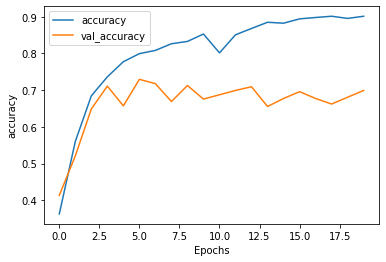

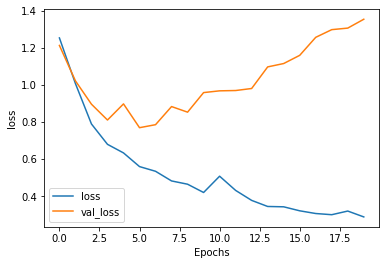

In [28]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Model is cleary overfitting. Some of the steps I can take to improve:

<ul>
    <li>Get more data</li>
    <li>Experiment with different parameters</li>
    <li>Experiment with a simpler neural net</li>
</ul>

## Save model

In [35]:
model.save('cv-classifier/app/assets/model1.h5')

In [36]:
import pickle

# saving
with open('cv-classifier/app/assets/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('cv-classifier/app/assets/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)